# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

**Evaluation**
<br>**Goal**
<br>It is your job to predict if a customer will churn, given the ~170 columns containing customer behavior, usage patterns, payment patterns, and other features that might be relevant. Your target variable is "churn_probability"

**Metric**
<br>Submissions are evaluated on Classification Accuracy between the value of the predicted value and the actual value of churn for each of the customers.

**Accuracy score formula**

<br>The public leaderboard is going to rank your submission against other users while the competition is active, however, once the competition is ended, the final ranks will be calculated on the private leaderboard.

**Submission file format**
<br>The file should contain a header and have the following format (CSV):

**id,churn_probability**
<br>70005,0.0
<br>70006,1.0
<br>70007,0.0
<br>etc.


# Summary of Steps :
1. Import Necessary Libraries
2. Load the Data and Understand the Data
    - <i>Segment the columns- </i>
    - <i>Check for missing values</i>
    - <i>Apply Simple and KNN Imputation</i>
    - <i>Derive new features</i>
    - <i>Handle outliers</i>
3. Exploratory Data Analysis (EDA)
    - <i>Univariate analysis (one variable at a time)</i>
    - <i>Bivariate analysis (two variables at a time)</i>
    - <i>Multivariate analysis (more than two variables at a time)</i>
4. Data Preprocessing and Preparation
    - <i>Address data imbalance and apply SMOTE</i>
    - <i>Train-Test Split : Splitting the Data into Training and Testing Sets</i>
    - <i>Feature Scaling : Standard scaling </i>
    - <i>Perform dimensionality reduction and visualization using PCA and t-SNE</i>
5. Build Different Models
    - Train models such as Logistic Regression, Decision Tree, and Random Forest on the training set
6. Evaluate the Models
    - Assess accuracy, precision, recall, ROC and finding a cut off value on the training set
    - Make Predictions on Test Set
7. Identify the Best estimator and build the Model
    - Create a pipeline of the best model on the training set
    - Analyze Results of the best Model
    - Check metrics on both the training and test sets
8. Make Predictions on Unseen Data
9. Create the output and submission file

# 1. Import Necessary Libraries

In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os
import missingno as msno

#Time
import time
from datetime import datetime


#Sklearn
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA , IncrementalPCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , export_graphviz
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report,roc_auc_score,roc_curve

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import Image
from six import StringIO
import pydotplus,graphviz

# imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline,make_pipeline

#Six
from six import StringIO  

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Log Start time
notebook_start_time = time.time()
print("Execution Start Time : " , datetime.now())

Execution Start Time :  2024-09-11 14:44:30.408361


# 2. Load the Data and Understand the Data

In [3]:
#COMMENT THIS SECTION INCASE RUNNING THIS NOTEBOOK LOCALLY

#Checking the kaggle paths for the uploaded datasets
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [4]:
#INCASE RUNNING THIS LOCALLY, PASS THE RELATIVE PATH OF THE CSV FILES BELOW
#(e.g. if files are in same folder as notebook, simple write "train.csv" as path)

#churn_data = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-63/train.csv")
#churn_data_unseen = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-63/test.csv")
#sample = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-63/sample.csv")
#data_dict = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-63/data_dictionary.csv")

In [5]:
### Load and read data
churn_data = pd.read_csv("train.csv")
churn_data_unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(churn_data.shape)
print(churn_data_unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [6]:
churn_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [7]:
churn_data_unseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

### Info of datasets

In [8]:
churn_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [9]:
churn_data_unseen.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

### Basic summary statistics

In [10]:
churn_data.describe(include="all")

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   69999.000000    69999.0         69297.0         69297.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    34999.000000      109.0             0.0             0.0   
std     20207.115084        0.0             0.0             0.0   
min         0.000000      109.0             0.0             0.0   
25%     17499.500000      109.0             0.0             0.0   
50%     34999.000000      109.0             0.0             0.0   
75%     52498.500000      109.0             0.0             0.0   
max     69998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          69297.0                69999                69600   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                69999                69600   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7  ...   sachet_3g_7  \
count                 69266  69999.000000  69999.000000  ...  69999.000000   
unique                    1           NaN           NaN  ...           NaN   
top               8/31/2014           NaN           NaN  ...           NaN   
freq                  69266           NaN           NaN  ...           NaN   
mean                    NaN    283.134365    278.185912  ...      0.081444   
std                     NaN    334.213918    344.366927  ...      0.634547   
min                     NaN  -2258.709000  -1289.715000  ...      0.000000   
25%                     NaN     93.581000     86.714000  ...      0.000000   
50%                     NaN    197.484000    191.588000  ...      0.000000   
75%                     NaN    370.791000    365.369500  ...      0.000000   
max                     NaN  27731.088000  35145.834000  ...     33.000000   

         sachet_3g_8     fb_user_6     fb_user_7     fb_user_8           aon  \
count   69999.000000  17568.000000  17865.000000  18417.000000  69999.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.085487      0.916325      0.909544      0.890319   1220.639709   
std         0.680035      0.276907      0.286842      0.312501    952.426321   
min         0.000000      0.000000      0.000000      0.000000    180.000000   
25%         0.000000      1.000000      1.000000      1.000000    468.000000   
50%         0.000000      1.000000      1.000000      1.000000    868.000000   
75%         0.000000      1.000000      1.000000      1.000000   1813.000000   
max        41.000000      1.000000      1.000000      1.000000   4337.000000   

          aug_vbc_3g    jul_vbc_3g   jun_vbc_3g  churn_probability  
count   69999.000000  69999.000000  69999.00000       69999.000000  
unique           NaN           NaN          NaN                NaN  
top              NaN           NaN          NaN                NaN  
freq             NaN           NaN          NaN                NaN  
mean       68.108597     65.935830     60.07674           0.101887  
std       269.328659    267.899034    257.22681           0.302502  
min         0.0

In [11]:
churn_data_unseen.describe(include="all")

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   30000.000000    30000.0         29684.0         29684.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    84998.500000      109.0             0.0             0.0   
std      8660.398374        0.0             0.0             0.0   
min     69999.000000      109.0             0.0             0.0   
25%     77498.750000      109.0             0.0             0.0   
50%     84998.500000      109.0             0.0             0.0   
75%     92498.250000      109.0             0.0             0.0   
max     99998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          29684.0                30000                29798   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                30000                29798   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7  ...   sachet_3g_6  \
count                 29633  30000.000000  30000.000000  ...  30000.000000   
unique                    1           NaN           NaN  ...           NaN   
top               8/31/2014           NaN           NaN  ...           NaN   
freq                  29633           NaN           NaN  ...           NaN   
mean                    NaN    282.644348    279.355021  ...      0.073467   
std                     NaN    314.560212    323.205370  ...      0.557327   
min                     NaN   -185.043000  -2014.045000  ...      0.000000   
25%                     NaN     92.907500     87.504750  ...      0.000000   
50%                     NaN    198.227500    191.775000  ...      0.000000   
75%                     NaN    371.969250    365.250750  ...      0.000000   
max                     NaN  10955.066000  13224.119000  ...     28.000000   

         sachet_3g_7   sachet_3g_8    fb_user_6    fb_user_7    fb_user_8  \
count   30000.000000  30000.000000  7585.000000  7706.000000  7922.000000   
unique           NaN           NaN          NaN          NaN          NaN   
top              NaN           NaN          NaN          NaN          NaN   
freq             NaN           NaN          NaN          NaN          NaN   
mean        0.077967      0.082200     0.909954     0.906956     0.891946   
std         0.613596      0.611546     0.286267     0.290513     0.310468   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%         0.000000      0.000000     1.000000     1.000000     1.000000   
50%         0.000000      0.000000     1.000000     1.000000     1.000000   
75%         0.000000      0.000000     1.000000     1.000000     1.000000   
max        35.000000     30.000000     1.000000     1.000000     1.000000   

                 aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g  
count   30000.000000  30000.000000  30000.000000  30000.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     1218.023200     68.314097     68.946576     59.891621  
std       960.109844    263.460641    278.749349    246.098292  
min       180.000000      0.000000      0.000000      0.000000  
25%       466.

## Some custom defined functions

In [12]:
# Define a function to rename columns based on regex patterns
def rename_columns(col_name):
    # Patterns and replacements
    patterns = {
        r'_6$': '_jun',
        r'_7$': '_jul',
        r'_8$': '_aug'
    }
    
    for pattern, replacement in patterns.items():
        if re.search(pattern, col_name):
            return re.sub(pattern, replacement, col_name)
    return col_name

In [13]:
# Define a function to rename columns based on regex patterns
def rename_columns2(col_name):
    # Define replacements for prefixes
    if col_name.startswith('jun_'):
        return re.sub(r'^jun_', '', col_name) + '_jun'
    elif col_name.startswith('jul_'):
        return re.sub(r'^jul_', '', col_name) + '_jul'
    elif col_name.startswith('aug_'):
        return re.sub(r'^aug_', '', col_name) + '_aug'
    else:
        return col_name

In [14]:
# Function to check if a column has the same value in all rows
def is_column_constant_custom(df, cols , val=1):
    return df[cols].apply(lambda x: x.dropna().nunique() <= val and x.notna().all())

# Print the number of columns in the training set where all values are the same
constant_cols_train = churn_data.columns[is_column_constant_custom(churn_data, churn_data.columns)]
print("Seen Set: Number of columns where all values are the same:", len(constant_cols_train))
print("Columns with constant values in Seen Set:", constant_cols_train.tolist())
# Separator line
print("="*120)
# Print the number of columns in the test set where all values are the same
constant_cols_test = churn_data_unseen.columns[is_column_constant_custom(churn_data_unseen, churn_data_unseen.columns)]
print("Unseen Set: Number of columns where all values are the same:", len(constant_cols_test))
print("Columns with constant values in Unseen Set:", constant_cols_test.tolist())

Seen Set: Number of columns where all values are the same: 2
Columns with constant values in Seen Set: ['circle_id', 'last_date_of_month_6']
Unseen Set: Number of columns where all values are the same: 2
Columns with constant values in Unseen Set: ['circle_id', 'last_date_of_month_6']


In [15]:
def findCustomColumnTypes(df, search_type='all_search', target_column=None, include_all=False,  keyword=None, cut_off_val=7):
    """
    Finds and returns column names in a DataFrame based on various types and patterns.
    
    Parameters:
    - df: pandas DataFrame
      The DataFrame in which to search for column names.
    
    - search_type: string, optional, default='all_search'
      Specifies the type of search to perform. Can be one of:
        - 'all_search': Search across all specified types.
        - 'date_text': Search for columns with 'date' in their names.
        - 'object_type': Search for columns with object data types.
        - 'datetime': Search for columns with datetime data types.
        - 'numerical': Search for columns with numerical data types.
        - 'categorical': Search for columns with categorical features.
      
    - include_all: boolean, optional, default=False
      If True, includes all column names in the result under the key 'all_columns'.
    
    - keyword: string, optional
      A custom string pattern to match in column names. If provided, and if 
      `search_type` matches this key, the function will return columns that match the pattern.

    - target_column: string, optional
      A column name to be excluded from the results, if present. This will be removed from 
      lists of columns for each search type where applicable.

    Returns:
    - result: dict
      A dictionary containing lists of column names based on the search type.
      The keys of the dictionary will be:
        - 'all_columns': List of all columns (if `include_all=True`).
        - 'date_text_columns': Columns containing 'date' in their names.
        - 'object_type_columns': Columns with object data types.
        - 'datetime_columns': Columns with datetime data types.
        - 'numerical_columns': Columns with numerical data types.
        - 'categorical_columns': Columns identified as categorical.
        - '{key}_columns': Columns matching the custom `key` pattern (if provided).
    """
    
    # List all column names in the DataFrame
    all_columns = sorted(list(df.columns))
    result = {}
    
    # Include all columns if specified
    if include_all:
        result['all_columns'] = all_columns

    # Search for columns containing 'date' in their names
    if search_type == 'all_search' or search_type == 'date_text' or search_type == 'categorical':
        pattern = re.compile(r'date', re.IGNORECASE)
        date_text_columns = sorted([col for col in all_columns if pattern.search(col)])
        # Remove target_column from date_text_columns if it exists
        if target_column in date_text_columns:
            date_text_columns.remove(target_column)
        result['date_text_columns'] = date_text_columns
    
    # Search for columns with object data types
    if search_type == 'all_search' or search_type == 'object_type' or search_type == 'categorical':
        object_type_columns = sorted(list(df.select_dtypes(include=['object']).columns))
        # Remove target_column from object_type_columns if it exists
        if target_column in object_type_columns:
            object_type_columns.remove(target_column)
        result['object_type_columns'] = object_type_columns
    
    # Search for columns with datetime data types
    if search_type == 'all_search' or search_type == 'datetime' or search_type == 'categorical':
        datetime_columns = sorted(list(df.select_dtypes(include=['datetime64[ns]', '<M8[ns]']).columns))
        # Remove target_column from datetime_columns if it exists
        if target_column in datetime_columns:
            datetime_columns.remove(target_column)
        result['datetime_columns'] = datetime_columns
    
    # Search for numerical columns
    if search_type == 'all_search' or search_type == 'numerical' or search_type == 'categorical':
        numerical_columns = sorted(list(df.select_dtypes(include=['int64', 'float64']).columns))
        # Remove target_column from numerical_columns if it exists
        if target_column in numerical_columns:
            numerical_columns.remove(target_column)
        result['numerical_columns'] = numerical_columns
    
    # Search for categorical columns based on unique values
    if search_type == 'all_search' or search_type == 'categorical':
        constant_cols_train = df.columns[is_column_constant_custom(df, df.columns, cut_off_val)]
        categorical_columns = sorted(list(df.select_dtypes(include=['category']).columns))
        # Remove target_column from categorical_columns if it exists
        if target_column in categorical_columns:
            categorical_columns.remove(target_column)
        result['categorical_columns'] = categorical_columns
    
    # Search for custom key in column names
    if keyword:
        if search_type != 'all_search' or search_type == "key":
            pattern = re.compile(keyword, re.IGNORECASE)
            filtered_columns = sorted([col for col in all_columns if pattern.search(col)])
            # Remove target_column from filtered_columns if it exists
            if target_column in filtered_columns:
                filtered_columns.remove(target_column)
            # Sanitize the key to be used as a dictionary key
            safe_key = re.sub(r'\W+', '_', keyword)
            result[f'{safe_key}_columns'] = filtered_columns
    
    return result

In [16]:
def getMissingValues(data, missing_cutoff_value, dataset_type="Seen", vars_type="Numerical"):
    """
    Identify and print columns with missing values above a specified cutoff percentage.

    Parameters:
    data (DataFrame): The dataset to analyze.
    missing_cutoff_value (float): The cutoff percentage for missing values to filter columns.
    dataset_type (str): Type of dataset, e.g., "Seen" or "Unseen". Default is "Seen".
    vars_type (str): Type of variables, e.g., "Numerical" or "Categorical". Default is "Numerical".

    Returns:
    list: List of column names with missing values above the cutoff percentage.
    """
    # Calculate the percentage of missing values for each column
    missing_data = round(100 * data.isnull().mean())
    # Filter columns where missing values exceed the cutoff percentage and sort them in descending order
    missing_data_above_cutoff = missing_data[missing_data > missing_cutoff_value].sort_values(ascending=False)
    # Print the columns with missing values above the cutoff percentage
    print(f"----- {vars_type} variables of {dataset_type} dataset having missing values above cutoff value ({missing_cutoff_value}%) : -----\n{missing_data_above_cutoff}")
    # Find columns with missing values above the cutoff percentage
    missing_data_above_cutoff_cols = list(missing_data_above_cutoff.index)
    # Print the total number of columns with missing values above the cutoff and list of these columns
    print(f"Total number of {vars_type} variables of {dataset_type} dataset having missing values above cutoff value ({missing_cutoff_value}%) : {len(missing_data_above_cutoff_cols)}")
    #print(f"-----  {vars_type} variables of {dataset_type} dataset having missing values : -----\n{missing_data_above_cutoff_cols}")
    # Return the list of columns with missing values above the cutoff
    return missing_data_above_cutoff_cols

In [17]:
def simpleImputeMissingValues(data, data_unseen, cols, dec="constant", var=0):
    """
    Impute missing values in both training and test datasets.

    Parameters:
    data (DataFrame): The training dataset.
    data_unseen (DataFrame): The unseen (test) dataset.
    cols (list): List of column names to impute.
    dec (str): Imputation strategy. Options are 'constant', 'mean', 'median', etc.
    var (int, float, optional): Value to replace missing values with if `dec` is 'constant'. Default is 0.

    Returns:
    None: The function modifies the input DataFrames in place and prints the shapes of the datasets.
    """
    # Set up the imputer based on the chosen strategy
    if dec == "constant":
        imputer = SimpleImputer(strategy=dec, fill_value=var)
    else:
        imputer = SimpleImputer(strategy=dec)
    # Apply the imputer to the training dataset
    data[cols] = imputer.fit_transform(data[cols])
    # Apply the same imputer to the unseen (test) dataset
    data_unseen[cols] = imputer.transform(data_unseen[cols])
    # Print the shape of the DataFrame after imputation for the training set
    print("Seen Set Shape :- ", data.shape)
    # Separator line for clarity
    print("=" * 120)
    # Print the shape of the DataFrame after imputation for the test set
    print("Unseen Set Shape :- ", data_unseen.shape)

In [18]:
def knn_impute(data, data_unseen, columns, n_neighbors=5, sample_size=10000):
    """
    Perform KNN imputation on specified columns of both training and unseen data with an option to sample the data.
    
    Parameters:
    - data (pd.DataFrame): The training DataFrame with missing values.
    - data_unseen (pd.DataFrame): The unseen (test) DataFrame with missing values.
    - columns (list): List of column names to impute using KNN.
    - n_neighbors (int): Number of neighbors to use for KNN imputation (default is 5).
    - sample_size (int): Number of samples to use for fitting the KNN model (default is 10,000).
    """
    # Check if unseen data is provided
    if data_unseen is None:
        raise ValueError("Unseen data must be provided for imputation.")
    
    # Check if columns parameter is valid
    if not columns:
        raise ValueError("The 'columns' parameter must be provided and cannot be empty.")

    # Step 1: Check if specified columns exist in the DataFrame
    columns_to_impute = [col for col in columns if col in data.columns]
    
    if not columns_to_impute:
        raise ValueError("None of the specified columns were found in the training DataFrame.")
    
    # Step 2: Extract data for imputation
    data_to_impute = data[columns_to_impute]
    
    # Step 3: Scale the data
    #scaler = StandardScaler()
    #scaled_data = scaler.fit_transform(data_to_impute)
    scaled_data = data_to_impute
    
    # Step 4: Apply KNN Imputation using a sample of the data
    if len(data) > sample_size:
        sample_indices = data.sample(n=sample_size, random_state=42).index
        sampled_data = scaled_data[sample_indices]
    else:
        sampled_data = scaled_data
    
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    knn_imputer.fit(sampled_data)
    
    # Impute the full training data using the model trained on the sample
    imputed_data = knn_imputer.transform(scaled_data)
    
    # Step 5: Reverse scaling
    #imputed_data = scaler.inverse_transform(imputed_data)
    
    # Step 6: Replace the original columns in the training DataFrame with imputed data
    data[columns_to_impute] = imputed_data
    
    # Print the shape of the DataFrame after imputation for the training set
    print("Seen Set Shape :- ", data.shape)
    # Separator line for clarity
    print("=" * 120)
    
    # Impute unseen data
    # Extract columns from unseen data that are present in training data
    common_columns = [col for col in columns_to_impute if col in data_unseen.columns]
    
    if common_columns:
        # Extract the unseen data for imputation
        unseen_data_to_impute = data_unseen[common_columns]
        
        # Scale the unseen data using the scaler fitted on the training data
        #scaled_unseen_data = scaler.transform(unseen_data_to_impute)
        scaled_unseen_data=unseen_data_to_impute
        
        # Apply KNN Imputation using the imputer fitted on the sampled training data
        imputed_unseen_data = knn_imputer.transform(scaled_unseen_data)
        
        # Reverse scaling
        #imputed_unseen_data = scaler.inverse_transform(imputed_unseen_data)
        
        # Replace the original columns in the unseen DataFrame with imputed data
        data_unseen[common_columns] = imputed_unseen_data
    
    # Print the shape of the DataFrame after imputation for the test set
    print("Unseen Set Shape :- ", data_unseen.shape)
    
    return data, data_unseen

In [19]:
def impute_rows(row, col1, col2, col3, val):
    """
    Impute missing values in a row based on specified conditions.

    Parameters:
    row (pd.Series): A row from the DataFrame.
    col1 (str): The name of the primary column.
    col2 (str): The name of the first secondary column.
    col3 (str): The name of the second secondary column.
    val: The value to impute if the columns are missing.

    Returns:
    pd.Series: The updated row with imputed values.
    """
    # Print the row ID
    print(f"Processing row with index {row.name}")
    
    # Check and handle col1
    if pd.isnull(row[col1]):
        print(f"Row {row.name}: {col1} is null. Imputing with value {val}.")
        row[col1] = val
    else:
        print(f"Row {row.name}: {col1} is already not null, value - {row[col1]}")
        
    # Check and handle col2
    if pd.notnull(row[col1]) and pd.isnull(row[col2]):
        print(f"Row {row.name}: {col2} is null. Imputing with {col1} value {row[col1]}.")
        row[col2] = row[col1]
    elif pd.isnull(row[col1]) and pd.isnull(row[col2]):
        print(f"Row {row.name}: Both {col1} and {col2} are null. Imputing {col2} with value {val}.")
        row[col2] = val
    else:
        print(f"Row {row.name}: {col2} is already not null, value - {row[col2]}")
        
    # Check and handle col3
    if pd.notnull(row[col1]) and pd.isnull(row[col2]) and pd.isnull(row[col3]):
        print(f"Row {row.name}: {col3} is null. Imputing with {col1} value {row[col1]}.")
        row[col3] = row[col1]
    elif pd.notnull(row[col2]) and pd.isnull(row[col3]):
        print(f"Row {row.name}: {col3} is null. Imputing with {col2} value {row[col2]}.")
        row[col3] = row[col2]
    elif pd.isnull(row[col1]) and pd.isnull(row[col2]) and pd.isnull(row[col3]):
        print(f"Row {row.name}: All three columns are null. Imputing {col3} with value {val}.")
        row[col3] = val
    else:
        print(f"Row {row.name}: {col3} is already not null, value - {row[col3]}")
        
    return row

In [20]:
def remove_outliers(df, cols, lower_quantile=0.10, upper_quantile=0.90, factor=1.5, max_row_loss=0.1, epsilon=1e-4):
    """
    Safely removes outliers from the specified numeric columns in the DataFrame based on the interquartile range method
    with additional checks for lower and upper percentile similarities to avoid excessive row loss.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - cols (list): List of column names in df to remove outliers from.
    - lower_quantile (float): The lower percentile threshold for the IQR method (default is 0.10).
    - upper_quantile (float): The upper percentile threshold for the IQR method (default is 0.90).
    - factor (float): The multiplier for the interquartile range to define outlier boundaries (default is 1.5).
    - max_row_loss (float): The maximum acceptable proportion of rows to lose after outlier removal (default is 0.1 or 10%).
    - epsilon (float): The threshold for considering percentiles as similar (default is 1e-4).
    
    Returns:
    - pd.DataFrame: The DataFrame with outliers removed in the specified columns.
    """
    
    for col in cols:
        # Calculate the lower (Q1) and upper (Q3) quantiles
        Q1 = df[col].quantile(lower_quantile)
        Q3 = df[col].quantile(upper_quantile)
        
        # Compute the Interquartile Range (IQR)
        IQR = Q3 - Q1
        
        # Define outlier bounds based on the IQR and factor
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        
        # Check if lower percentiles (1st to 5th) are very close to each other
        lower_percentile_values = df[col].quantile([0.01, 0.02, 0.03, 0.04, 0.05])
        lower_percentile_diff = lower_percentile_values.diff().abs()
        
        # Check if upper percentiles (95th to 99th) are very close to each other
        upper_percentile_values = df[col].quantile([0.95, 0.96, 0.97, 0.98, 0.99])
        upper_percentile_diff = upper_percentile_values.diff().abs()
        
        # Skip outlier removal if either lower or upper percentiles are too similar
        if np.all(lower_percentile_diff < epsilon) or np.all(upper_percentile_diff < epsilon):
            print(f"Skipping column '{col}' due to similar lower or upper percentile values.")
            continue
        
        # Record the number of rows before outlier removal
        before_count = df.shape[0]
        
        # Apply outlier removal based on the calculated bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
        # Record the number of rows after outlier removal
        after_count = df.shape[0]
        
        # Calculate the proportion of rows lost due to outlier removal
        row_loss = (before_count - after_count) / before_count
        
        # If row loss exceeds the specified threshold, revert the changes
        if row_loss > max_row_loss:
            print(f"Warning: Removing outliers in column '{col}' dropped {row_loss:.2%} of rows. Reverting changes.")
            df = df[(df[col] >= Q1 - factor * IQR) & (df[col] <= Q3 + factor * IQR)]  # Use less aggressive bounds
        else:
            print(f"Column '{col}' - Rows reduced from {before_count} to {after_count} after removing outliers.")
    
    return df

In [21]:
def remove_outliers2(df):
    transformed_values = []
    for value in df:
        if value <= 0:
            transformed_values.append(float(0))
        elif float(value) == float(1.0):
            transformed_values.append(float(1.5))
        else:
            transformed_values.append(float(np.log1p(value)))

    return transformed_values

### Let's replace columns suffixes _6, _7, and _8 with jun, jul, and aug, respectively, using regular expressions

In [22]:
# Apply the renaming function to all column names
churn_data.rename(columns=lambda x: rename_columns(x), inplace=True)
churn_data_unseen.rename(columns=lambda x: rename_columns(x), inplace=True)

### Looking at the data we can see that there are a few columns which do not have the proper naming convention where the month is appended in the end. Lets fix them.

In [23]:
# Apply the renaming function 2 to all column names
churn_data.rename(columns=lambda x: rename_columns2(x), inplace=True)
churn_data_unseen.rename(columns=lambda x: rename_columns2(x), inplace=True)

### Check duplicate records

In [24]:
churn_data[churn_data.duplicated()]

Empty DataFrame
Columns: [id, circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_jun, last_date_of_month_jul, last_date_of_month_aug, arpu_jun, arpu_jul, arpu_aug, onnet_mou_jun, onnet_mou_jul, onnet_mou_aug, offnet_mou_jun, offnet_mou_jul, offnet_mou_aug, roam_ic_mou_jun, roam_ic_mou_jul, roam_ic_mou_aug, roam_og_mou_jun, roam_og_mou_jul, roam_og_mou_aug, loc_og_t2t_mou_jun, loc_og_t2t_mou_jul, loc_og_t2t_mou_aug, loc_og_t2m_mou_jun, loc_og_t2m_mou_jul, loc_og_t2m_mou_aug, loc_og_t2f_mou_jun, loc_og_t2f_mou_jul, loc_og_t2f_mou_aug, loc_og_t2c_mou_jun, loc_og_t2c_mou_jul, loc_og_t2c_mou_aug, loc_og_mou_jun, loc_og_mou_jul, loc_og_mou_aug, std_og_t2t_mou_jun, std_og_t2t_mou_jul, std_og_t2t_mou_aug, std_og_t2m_mou_jun, std_og_t2m_mou_jul, std_og_t2m_mou_aug, std_og_t2f_mou_jun, std_og_t2f_mou_jul, std_og_t2f_mou_aug, std_og_t2c_mou_jun, std_og_t2c_mou_jul, std_og_t2c_mou_aug, std_og_mou_jun, std_og_mou_jul, std_og_mou_aug, isd_og_mou_jun, isd_og_mou_jul, isd_og_mou_aug, spl_og_mou_jun, spl_og_mou_jul, spl_og_mou_aug, og_others_jun, og_others_jul, og_others_aug, total_og_mou_jun, total_og_mou_jul, total_og_mou_aug, loc_ic_t2t_mou_jun, loc_ic_t2t_mou_jul, loc_ic_t2t_mou_aug, loc_ic_t2m_mou_jun, loc_ic_t2m_mou_jul, loc_ic_t2m_mou_aug, loc_ic_t2f_mou_jun, loc_ic_t2f_mou_jul, loc_ic_t2f_mou_aug, loc_ic_mou_jun, loc_ic_mou_jul, loc_ic_mou_aug, std_ic_t2t_mou_jun, std_ic_t2t_mou_jul, std_ic_t2t_mou_aug, std_ic_t2m_mou_jun, std_ic_t2m_mou_jul, std_ic_t2m_mou_aug, std_ic_t2f_mou_jun, std_ic_t2f_mou_jul, std_ic_t2f_mou_aug, std_ic_t2o_mou_jun, std_ic_t2o_mou_jul, std_ic_t2o_mou_aug, std_ic_mou_jun, std_ic_mou_jul, std_ic_mou_aug, total_ic_mou_jun, total_ic_mou_jul, total_ic_mou_aug, spl_ic_mou_jun, spl_ic_mou_jul, spl_ic_mou_aug, isd_ic_mou_jun, isd_ic_mou_jul, ...]
Index: []

[0 rows x 172 columns]

In [25]:
churn_data_unseen[churn_data_unseen.duplicated()]

Empty DataFrame
Columns: [id, circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_jun, last_date_of_month_jul, last_date_of_month_aug, arpu_jun, arpu_jul, arpu_aug, onnet_mou_jun, onnet_mou_jul, onnet_mou_aug, offnet_mou_jun, offnet_mou_jul, offnet_mou_aug, roam_ic_mou_jun, roam_ic_mou_jul, roam_ic_mou_aug, roam_og_mou_jun, roam_og_mou_jul, roam_og_mou_aug, loc_og_t2t_mou_jun, loc_og_t2t_mou_jul, loc_og_t2t_mou_aug, loc_og_t2m_mou_jun, loc_og_t2m_mou_jul, loc_og_t2m_mou_aug, loc_og_t2f_mou_jun, loc_og_t2f_mou_jul, loc_og_t2f_mou_aug, loc_og_t2c_mou_jun, loc_og_t2c_mou_jul, loc_og_t2c_mou_aug, loc_og_mou_jun, loc_og_mou_jul, loc_og_mou_aug, std_og_t2t_mou_jun, std_og_t2t_mou_jul, std_og_t2t_mou_aug, std_og_t2m_mou_jun, std_og_t2m_mou_jul, std_og_t2m_mou_aug, std_og_t2f_mou_jun, std_og_t2f_mou_jul, std_og_t2f_mou_aug, std_og_t2c_mou_jun, std_og_t2c_mou_jul, std_og_t2c_mou_aug, std_og_mou_jun, std_og_mou_jul, std_og_mou_aug, isd_og_mou_jun, isd_og_mou_jul, isd_og_mou_aug, spl_og_mou_jun, spl_og_mou_jul, spl_og_mou_aug, og_others_jun, og_others_jul, og_others_aug, total_og_mou_jun, total_og_mou_jul, total_og_mou_aug, loc_ic_t2t_mou_jun, loc_ic_t2t_mou_jul, loc_ic_t2t_mou_aug, loc_ic_t2m_mou_jun, loc_ic_t2m_mou_jul, loc_ic_t2m_mou_aug, loc_ic_t2f_mou_jun, loc_ic_t2f_mou_jul, loc_ic_t2f_mou_aug, loc_ic_mou_jun, loc_ic_mou_jul, loc_ic_mou_aug, std_ic_t2t_mou_jun, std_ic_t2t_mou_jul, std_ic_t2t_mou_aug, std_ic_t2m_mou_jun, std_ic_t2m_mou_jul, std_ic_t2m_mou_aug, std_ic_t2f_mou_jun, std_ic_t2f_mou_jul, std_ic_t2f_mou_aug, std_ic_t2o_mou_jun, std_ic_t2o_mou_jul, std_ic_t2o_mou_aug, std_ic_mou_jun, std_ic_mou_jul, std_ic_mou_aug, total_ic_mou_jun, total_ic_mou_jul, total_ic_mou_aug, spl_ic_mou_jun, spl_ic_mou_jul, spl_ic_mou_aug, isd_ic_mou_jun, isd_ic_mou_jul, ...]
Index: []

[0 rows x 171 columns]

### To check all rows in some particular columns are null. If all rows are null then we'll remove those rows or records

In [26]:
# Print the number of rows in the training set where all columns are missing
print("Seen Set: Rows with all columns missing:", churn_data[churn_data.isnull().all(axis=1)].shape[0])
# Separator line
print("="*120) 
# Print the number of rows in the test set where all columns are missing
print("Unseen Set: Rows with all columns missing:", churn_data_unseen[churn_data_unseen.isnull().all(axis=1)].shape[0])

Seen Set: Rows with all columns missing: 0
Unseen Set: Rows with all columns missing: 0


### Checking for Columns with Constant Values (Considering NaN as unique value) 

In [27]:
unique_cols=churn_data.columns[churn_data.nunique(dropna=True) == 1].tolist()

### Check summary statistics , mean , max of Unique columns

In [28]:
churn_data[unique_cols].describe()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count    69999.0         69297.0         69297.0         69297.0   
mean       109.0             0.0             0.0             0.0   
std          0.0             0.0             0.0             0.0   
min        109.0             0.0             0.0             0.0   
25%        109.0             0.0             0.0             0.0   
50%        109.0             0.0             0.0             0.0   
75%        109.0             0.0             0.0             0.0   
max        109.0             0.0             0.0             0.0   

       std_og_t2c_mou_jun  std_og_t2c_mou_jul  std_og_t2c_mou_aug  \
count             67231.0             67312.0             66296.0   
mean                  0.0                 0.0                 0.0   
std                   0.0                 0.0                 0.0   
min                   0.0                 0.0                 0.0   
25%                   0.0                 0.0                 0.0   
50%                   0.0                 0.0                 0.0   
75%                   0.0                 0.0                 0.0   
max                   0.0                 0.0                 0.0   

       std_ic_t2o_mou_jun  std_ic_t2o_mou_jul  std_ic_t2o_mou_aug  
count             67231.0             67312.0             66296.0  
mean                  0.0                 0.0                 0.0  
std                   0.0                 0.0                 0.0  
min                   0.0                 0.0                 0.0  
25%                   0.0                 0.0                 0.0  
50%                   0.0                 0.0                 0.0  
75%                   0.0                 0.0                 0.0  
max                   0.0                 0.0                 0.0

In [29]:
churn_data.drop(unique_cols,axis=1,inplace=True)
churn_data_unseen.drop(unique_cols,axis=1,inplace=True)

### Segmentation of Columns

In [30]:
target_col='churn_probability'

In [31]:
churn_data_columns=findCustomColumnTypes(df=churn_data, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)
churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)

In [32]:
### Identify the object columns
print("------- Object Columns for Seen Set ------- \n",churn_data_columns["object_type_columns"])
# Separator line
print("="*120)
print("------- Object Columns for Unseen Set ------- \n",churn_data_unseen_columns["object_type_columns"])
# Separator line
print("="*120)
### Identify the numerical columns
print("------- Numerical Columns for Seen Set ------- \n",churn_data_columns["numerical_columns"])
# Separator line
print("="*120) 
print("------- Numerical Columns for Unseen Set ------- \n",churn_data_unseen_columns["numerical_columns"])
### Identify the Categorical columns
print("------- Categorical Columns for Seen Set ------- \n",churn_data_columns["categorical_columns"])
# Separator line
print("="*120) 
print("------- Categorical Columns for Unseen Set ------- \n",churn_data_unseen_columns["categorical_columns"])

------- Object Columns for Seen Set ------- 
 ['date_of_last_rech_aug', 'date_of_last_rech_data_aug', 'date_of_last_rech_data_jul', 'date_of_last_rech_data_jun', 'date_of_last_rech_jul', 'date_of_last_rech_jun']
------- Object Columns for Unseen Set ------- 
 ['date_of_last_rech_aug', 'date_of_last_rech_data_aug', 'date_of_last_rech_data_jul', 'date_of_last_rech_data_jun', 'date_of_last_rech_jul', 'date_of_last_rech_jun']
------- Numerical Columns for Seen Set ------- 
 ['aon', 'arpu_2g_aug', 'arpu_2g_jul', 'arpu_2g_jun', 'arpu_3g_aug', 'arpu_3g_jul', 'arpu_3g_jun', 'arpu_aug', 'arpu_jul', 'arpu_jun', 'av_rech_amt_data_aug', 'av_rech_amt_data_jul', 'av_rech_amt_data_jun', 'count_rech_2g_aug', 'count_rech_2g_jul', 'count_rech_2g_jun', 'count_rech_3g_aug', 'count_rech_3g_jul', 'count_rech_3g_jun', 'fb_user_aug', 'fb_user_jul', 'fb_user_jun', 'ic_others_aug', 'ic_others_jul', 'ic_others_jun', 'id', 'isd_ic_mou_aug', 'isd_ic_mou_jul', 'isd_ic_mou_jun', 'isd_og_mou_aug', 'isd_og_mou_jul', '

#### Missing Value Check

In [33]:
## Lets check the columns with missing values
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data,cut_off,"Seen","Numerical")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data,cut_off,"Unseen","Numerical")

----- Numerical variables of Seen dataset having missing values above cutoff value (0%) : -----
max_rech_data_jun        75.0
night_pck_user_jun       75.0
arpu_3g_jun              75.0
count_rech_3g_jun        75.0
arpu_2g_jun              75.0
                         ... 
isd_og_mou_jul            4.0
isd_og_mou_jun            4.0
loc_ic_mou_jun            4.0
date_of_last_rech_jun     2.0
date_of_last_rech_jul     2.0
Length: 114, dtype: float64
Total number of Numerical variables of Seen dataset having missing values above cutoff value (0%) : 114
----- Numerical variables of Unseen dataset having missing values above cutoff value (0%) : -----
max_rech_data_jun        75.0
night_pck_user_jun       75.0
arpu_3g_jun              75.0
count_rech_3g_jun        75.0
arpu_2g_jun              75.0
                         ... 
isd_og_mou_jul            4.0
isd_og_mou_jun            4.0
loc_ic_mou_jun            4.0
date_of_last_rech_jun     2.0
date_of_last_rech_jul     2.0
Length: 114, d

### Categorize Variables based on Business Purpose

In [34]:
ids = ['id']
total_amounts = [i for i in list(churn_data.columns) if re.search('total.+amt',i)]
total_incoming_minutes = [i for i in list(churn_data.columns) if re.search('total.+ic.+mou',i)]
total_outgoing_minutes = [i for i in list(churn_data.columns) if re.search('total.+og.+mou',i)]
offnetwork_minutes = [i for i in list(churn_data.columns) if re.search('offnet',i)]
onnetwork_minutes = [i for i in list(churn_data.columns) if re.search('onnet',i)]
average_revenue_3g = [i for i in list(churn_data.columns) if re.search('arpu.+3g',i)]
average_revenue_2g = [i for i in list(churn_data.columns) if re.search('arpu.+2g',i)]
volume_3g = [i for i in list(churn_data.columns) if re.search('vol.+3g',i)]
volume_2g = [i for i in list(churn_data.columns) if re.search('vol.+2g',i)]
data_3g = [i for i in list(churn_data.columns) if re.search('3g',i) if i not in volume_3g if i not in average_revenue_3g]
data_2g = [i for i in list(churn_data.columns) if re.search('2g',i) if i not in volume_2g if i not in average_revenue_2g]
age_on_network = [i for i in list(churn_data.columns) if re.search('aon',i)]
arpu_cols = [i for i in list(churn_data.columns) if re.search('arpu',i)]
date_cols = [i for i in list(churn_data.columns) if re.search('date',i)]
day_cols = [i for i in list(churn_data.columns) if re.search('day',i)]
fb_cols = [i for i in list(churn_data.columns) if re.search('fb.+user',i)]
night_pack_cols = [i for i in list(churn_data.columns) if re.search('night.+pck.+user',i)]
recharge_cols=[i for i in list(churn_data.columns) if re.search('(rch_amt|rech_amt|rech_data)',i)]
incoming_minutes = [i for i in list(churn_data.columns) if re.search('ic',i) if i not in total_incoming_minutes]
outgoing_minutes = [i for i in list(churn_data.columns) if re.search('og',i) if i not in total_outgoing_minutes]

#arpu 
arpu_cols = [i for i in list(churn_data.columns) if re.search('arpu',i)]
average_revenue_3g = [i for i in list(churn_data.columns) if re.search('arpu.+3g',i)]
average_revenue_2g = [i for i in list(churn_data.columns) if re.search('arpu.+2g',i)]

#recharge_variables
total_recharge_amount_cols = [i for i in list(churn_data.columns) if re.search('total.+(rch|rech|rec).+amt',i)]
total_recharge_data_cols = [i for i in list(churn_data.columns) if re.search('total.+(rch|rech|rec).+data',i)]
av_recharge_amount_cols = [i for i in list(churn_data.columns) if re.search('av.+(rch|rech|rec).+amt',i)]
av_recharge_data_cols = [i for i in list(churn_data.columns) if re.search('av.+(rch|rech|rec).+data',i)]
max_recharge_amount_cols = [i for i in list(churn_data.columns) if re.search('max.+(rch|rech|rec).+amt',i)]
max_recharge_data_cols = [i for i in list(churn_data.columns) if re.search('max.+(rch|rech|rec).+data',i)]

# fb_usage and night pack
fb_cols = [i for i in list(churn_data.columns) if re.search('fb.+user',i)]
night_pack_cols = [i for i in list(churn_data.columns) if re.search('night.+pck.+user',i)]

### Date Columns

In [35]:
churn_data[date_cols].head()

date_of_last_rech_jun date_of_last_rech_jul date_of_last_rech_aug  \
0             6/22/2014             7/10/2014             8/24/2014   
1             6/12/2014             7/10/2014             8/26/2014   
2             6/11/2014             7/22/2014             8/24/2014   
3             6/15/2014             7/21/2014             8/25/2014   
4             6/25/2014             7/26/2014             8/30/2014   

  date_of_last_rech_data_jun date_of_last_rech_data_jul  \
0                        NaN                        NaN   
1                        NaN                   7/8/2014   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                  6/25/2014                  7/23/2014   

  date_of_last_rech_data_aug  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                  8/20/2014

#### Missing Value Check

In [36]:
## Lets check the columns with missing values
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data[date_cols],cut_off,"Seen","Numerical")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data[date_cols],cut_off,"Unseen","Numerical")

----- Numerical variables of Seen dataset having missing values above cutoff value (0%) : -----
date_of_last_rech_data_jun    75.0
date_of_last_rech_data_jul    74.0
date_of_last_rech_data_aug    74.0
date_of_last_rech_aug          4.0
date_of_last_rech_jun          2.0
date_of_last_rech_jul          2.0
dtype: float64
Total number of Numerical variables of Seen dataset having missing values above cutoff value (0%) : 6
----- Numerical variables of Unseen dataset having missing values above cutoff value (0%) : -----
date_of_last_rech_data_jun    75.0
date_of_last_rech_data_jul    74.0
date_of_last_rech_data_aug    74.0
date_of_last_rech_aug          4.0
date_of_last_rech_jun          2.0
date_of_last_rech_jul          2.0
dtype: float64
Total number of Numerical variables of Unseen dataset having missing values above cutoff value (0%) : 6


#### Imputation

In [37]:
# Drop these columns
churn_data.drop(date_cols,axis=1,inplace=True)
churn_data_unseen.drop(date_cols,axis=1,inplace=True)

### Day Columns

In [38]:
churn_data[day_cols].head()

last_day_rch_amt_jun  last_day_rch_amt_jul  last_day_rch_amt_aug
0                    65                    65                     0
1                     0                     0                     0
2                    70                    50                     0
3                   110                   110                    50
4                    25                    10                    30

#### Missing Value Check

In [39]:
## Lets check the columns with missing values
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data[day_cols],cut_off,"Seen","Numerical")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data[day_cols],cut_off,"Unseen","Numerical")

----- Numerical variables of Seen dataset having missing values above cutoff value (0%) : -----
Series([], dtype: float64)
Total number of Numerical variables of Seen dataset having missing values above cutoff value (0%) : 0
----- Numerical variables of Unseen dataset having missing values above cutoff value (0%) : -----
Series([], dtype: float64)
Total number of Numerical variables of Unseen dataset having missing values above cutoff value (0%) : 0


### ARPU Columns

In [40]:
churn_data[arpu_cols].head()

arpu_jun  arpu_jul  arpu_aug  arpu_3g_jun  arpu_3g_jul  arpu_3g_aug  \
0    31.277    87.009     7.527          NaN          NaN          NaN   
1     0.000   122.787    42.953          NaN       122.07          NaN   
2    60.806   103.176     0.000          NaN          NaN          NaN   
3   156.362   205.260   111.095          NaN          NaN          NaN   
4   240.708   128.191   101.565          0.0        35.00          0.0   

   arpu_2g_jun  arpu_2g_jul  arpu_2g_aug  
0          NaN          NaN          NaN  
1          NaN       122.08          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          0.0        35.12          0.0

#### Missing Value Check

In [41]:
## Lets check the columns with missing values
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data[arpu_cols],cut_off,"Seen","Numerical")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data[arpu_cols],cut_off,"Unseen","Numerical")

----- Numerical variables of Seen dataset having missing values above cutoff value (0%) : -----
arpu_3g_jun    75.0
arpu_2g_jun    75.0
arpu_3g_jul    74.0
arpu_3g_aug    74.0
arpu_2g_jul    74.0
arpu_2g_aug    74.0
dtype: float64
Total number of Numerical variables of Seen dataset having missing values above cutoff value (0%) : 6
----- Numerical variables of Unseen dataset having missing values above cutoff value (0%) : -----
arpu_3g_jun    75.0
arpu_2g_jun    75.0
arpu_3g_jul    74.0
arpu_3g_aug    74.0
arpu_2g_jul    74.0
arpu_2g_aug    74.0
dtype: float64
Total number of Numerical variables of Unseen dataset having missing values above cutoff value (0%) : 6


#### Imputation

In [42]:
# missing_values_cols contains the columns to impute
imputeCols = missing_values_cols_seen
# Set up the imputer to replace missing values with 0
simpleImputeMissingValues(churn_data, churn_data_unseen, imputeCols, dec="constant", var=0)

Seen Set Shape :-  (69999, 153)
Unseen Set Shape :-  (30000, 152)


### Recharge Columns

In [43]:
recharge_variables = [*total_recharge_amount_cols, 
             *total_recharge_data_cols,
             *av_recharge_amount_cols,
             *av_recharge_data_cols,
             *max_recharge_amount_cols,
             *max_recharge_data_cols]

#### Missing Value Check

In [44]:
## Lets check the columns with missing values
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data[recharge_variables],cut_off,"Seen","Numerical")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data[recharge_variables],cut_off,"Unseen","Numerical")

----- Numerical variables of Seen dataset having missing values above cutoff value (0%) : -----
total_rech_data_jun     75.0
av_rech_amt_data_jun    75.0
av_rech_amt_data_jun    75.0
max_rech_data_jun       75.0
total_rech_data_jul     74.0
total_rech_data_aug     74.0
av_rech_amt_data_jul    74.0
av_rech_amt_data_aug    74.0
av_rech_amt_data_jul    74.0
av_rech_amt_data_aug    74.0
max_rech_data_jul       74.0
max_rech_data_aug       74.0
dtype: float64
Total number of Numerical variables of Seen dataset having missing values above cutoff value (0%) : 12
----- Numerical variables of Unseen dataset having missing values above cutoff value (0%) : -----
total_rech_data_jun     75.0
av_rech_amt_data_jun    75.0
av_rech_amt_data_jun    75.0
max_rech_data_jun       75.0
total_rech_data_jul     74.0
total_rech_data_aug     74.0
av_rech_amt_data_jul    74.0
av_rech_amt_data_aug    74.0
av_rech_amt_data_jul    74.0
av_rech_amt_data_aug    74.0
max_rech_data_jul       74.0
max_rech_data_aug    

#### Imputation

In [45]:
# missing_values_cols contains the columns to impute
imputeCols = missing_values_cols_seen
# Set up the imputer to replace missing values with 0
simpleImputeMissingValues(churn_data, churn_data_unseen, imputeCols, dec="constant", var=0)

Seen Set Shape :-  (69999, 153)
Unseen Set Shape :-  (30000, 152)


### Incoming Minutes Columns

In [46]:
churn_data[incoming_minutes].head()

roam_ic_mou_jun  roam_ic_mou_jul  roam_ic_mou_aug  loc_ic_t2t_mou_jun  \
0             0.00              0.0              0.0                2.43   
1             0.00              0.0              0.0                1.68   
2             0.00              0.0              0.0                4.51   
3             0.00              0.0              0.0               24.98   
4            53.64              0.0              0.0                5.44   

   loc_ic_t2t_mou_jul  loc_ic_t2t_mou_aug  loc_ic_t2m_mou_jun  \
0                3.68                7.79                0.83   
1               19.09               10.53                1.41   
2                6.16                6.49               89.86   
3                4.84               23.88               53.99   
4                1.39                2.66               10.58   

   loc_ic_t2m_mou_jul  loc_ic_t2m_mou_aug  loc_ic_t2f_mou_jun  ...  \
0               21.08               16.91                0.00  ...   
1               18.68               11.09                0.35  ...   
2               25.18               23.51                0.00  ...   
3               44.23               57.14                7.23  ...   
4                4.33               19.49                5.51  ...   

   std_ic_mou_aug  spl_ic_mou_jun  spl_ic_mou_jul  spl_ic_mou_aug  \
0           15.18             0.0             0.0            0.66   
1            0.00             0.0             0.0            0.01   
2            6.38             0.0             0.0            0.00   
3            2.81             0.0             0.0            0.00   
4            0.00             0.0             0.0            0.00   

   isd_ic_mou_jun  isd_ic_mou_jul  isd_ic_mou_aug  ic_others_jun  \
0             0.0             0.0             0.0           1.11   
1             0.0             0.0             0.0           0.00   
2             0.0             0.0             0.0           0.00   
3             0.0             0.0             0.0           0.00   
4             0.0             0.0             0.0           0.00   

   ic_others_jul  ic_others_aug  
0           0.69           0.00  
1           0.00           0.00  
2           0.00           0.25  
3           0.00           0.00  
4           0.00           0.00  

[5 rows x 36 columns]

#### Missing Value Check

In [47]:
## Lets check the columns with missing values
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data[incoming_minutes],cut_off,"Seen","Numerical")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data[incoming_minutes],cut_off,"Unseen","Numerical")

----- Numerical variables of Seen dataset having missing values above cutoff value (0%) : -----
ic_others_aug         5.0
loc_ic_t2m_mou_aug    5.0
std_ic_t2f_mou_aug    5.0
std_ic_t2t_mou_aug    5.0
std_ic_mou_aug        5.0
loc_ic_mou_aug        5.0
loc_ic_t2f_mou_aug    5.0
spl_ic_mou_aug        5.0
isd_ic_mou_aug        5.0
loc_ic_t2t_mou_aug    5.0
roam_ic_mou_aug       5.0
std_ic_t2m_mou_aug    5.0
isd_ic_mou_jul        4.0
isd_ic_mou_jun        4.0
std_ic_t2f_mou_jul    4.0
spl_ic_mou_jul        4.0
spl_ic_mou_jun        4.0
ic_others_jun         4.0
std_ic_mou_jul        4.0
ic_others_jul         4.0
std_ic_mou_jun        4.0
roam_ic_mou_jun       4.0
std_ic_t2f_mou_jun    4.0
std_ic_t2m_mou_jul    4.0
roam_ic_mou_jul       4.0
std_ic_t2t_mou_jul    4.0
std_ic_t2t_mou_jun    4.0
loc_ic_mou_jul        4.0
loc_ic_mou_jun        4.0
loc_ic_t2f_mou_jul    4.0
loc_ic_t2f_mou_jun    4.0
loc_ic_t2m_mou_jul    4.0
loc_ic_t2m_mou_jun    4.0
loc_ic_t2t_mou_jul    4.0
loc_ic_t2t_mou_jun  

#### Imputation

In [48]:
knn_cols=[]

In [49]:
# Start time
start_time = time.time()
print("Execution Start Time : " , datetime.now())
# missing_values_cols contains the columns to impute
knn_cols=knn_cols+missing_values_cols_seen
# Set up the KNN imputer to replace missing values of certain columns
#knn_impute(data=churn_data, data_unseen=churn_data_unseen, columns=imputeCols, n_neighbors=5,sample_size=10000)
# End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution Start Time :  2024-09-11 14:44:42.640445
Execution End Time :  2024-09-11 14:44:42.640445
Execution time: 0.0 seconds


In [50]:
knn_cols

['ic_others_aug',
 'loc_ic_t2m_mou_aug',
 'std_ic_t2f_mou_aug',
 'std_ic_t2t_mou_aug',
 'std_ic_mou_aug',
 'loc_ic_mou_aug',
 'loc_ic_t2f_mou_aug',
 'spl_ic_mou_aug',
 'isd_ic_mou_aug',
 'loc_ic_t2t_mou_aug',
 'roam_ic_mou_aug',
 'std_ic_t2m_mou_aug',
 'isd_ic_mou_jul',
 'isd_ic_mou_jun',
 'std_ic_t2f_mou_jul',
 'spl_ic_mou_jul',
 'spl_ic_mou_jun',
 'ic_others_jun',
 'std_ic_mou_jul',
 'ic_others_jul',
 'std_ic_mou_jun',
 'roam_ic_mou_jun',
 'std_ic_t2f_mou_jun',
 'std_ic_t2m_mou_jul',
 'roam_ic_mou_jul',
 'std_ic_t2t_mou_jul',
 'std_ic_t2t_mou_jun',
 'loc_ic_mou_jul',
 'loc_ic_mou_jun',
 'loc_ic_t2f_mou_jul',
 'loc_ic_t2f_mou_jun',
 'loc_ic_t2m_mou_jul',
 'loc_ic_t2m_mou_jun',
 'loc_ic_t2t_mou_jul',
 'loc_ic_t2t_mou_jun',
 'std_ic_t2m_mou_jun']

### Outgoing Minutes Columns

In [51]:
churn_data[outgoing_minutes].head()

roam_og_mou_jun  roam_og_mou_jul  roam_og_mou_aug  loc_og_t2t_mou_jun  \
0             0.00              0.0             0.00                2.23   
1             0.00              0.0             0.00                0.00   
2             0.00              0.0             0.00                0.53   
3             0.00              0.0             1.63                6.99   
4            15.73              0.0             0.00               10.16   

   loc_og_t2t_mou_jul  loc_og_t2t_mou_aug  loc_og_t2m_mou_jun  \
0                0.00                0.28                5.29   
1                0.00                0.00                0.00   
2               12.98                0.00               24.11   
3                3.94                0.00               37.91   
4                4.83                6.13               36.74   

   loc_og_t2m_mou_jul  loc_og_t2m_mou_aug  loc_og_t2f_mou_jun  ...  \
0               16.04                2.33                0.00  ...   
1                0.00                0.00                0.00  ...   
2                0.00                0.00                0.00  ...   
3               44.89               23.63                0.00  ...   
4               19.88                4.61               11.99  ...   

   std_og_mou_aug  isd_og_mou_jun  isd_og_mou_jul  isd_og_mou_aug  \
0            1.01             0.0             0.0             0.0   
1            0.00             0.0             0.0             0.0   
2            0.00             0.0             0.0             0.0   
3            4.60             0.0             0.0             0.0   
4            0.00             0.0             0.0             0.0   

   spl_og_mou_jun  spl_og_mou_jul  spl_og_mou_aug  og_others_jun  \
0            8.20            0.63            0.00           0.38   
1            0.00           30.73           31.66           0.00   
2            2.89            1.38            0.00           0.00   
3           14.95            9.13           25.61           0.00   
4            0.00           17.00            0.00           0.00   

   og_others_jul  og_others_aug  
0            0.0            0.0  
1            0.0            0.0  
2            0.0            0.0  
3            0.0            0.0  
4            0.0            0.0  

[5 rows x 39 columns]

#### Missing Value Check

In [52]:
## Lets check the columns with missing values
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data[outgoing_minutes],cut_off,"Seen","Numerical")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data[outgoing_minutes],cut_off,"Unseen","Numerical")

----- Numerical variables of Seen dataset having missing values above cutoff value (0%) : -----
og_others_aug         5.0
isd_og_mou_aug        5.0
std_og_t2t_mou_aug    5.0
std_og_t2f_mou_aug    5.0
loc_og_mou_aug        5.0
std_og_mou_aug        5.0
loc_og_t2c_mou_aug    5.0
std_og_t2m_mou_aug    5.0
loc_og_t2f_mou_aug    5.0
loc_og_t2m_mou_aug    5.0
spl_og_mou_aug        5.0
loc_og_t2t_mou_aug    5.0
roam_og_mou_aug       5.0
spl_og_mou_jun        4.0
spl_og_mou_jul        4.0
isd_og_mou_jul        4.0
isd_og_mou_jun        4.0
std_og_mou_jul        4.0
og_others_jun         4.0
std_og_mou_jun        4.0
og_others_jul         4.0
std_og_t2f_mou_jul    4.0
std_og_t2f_mou_jun    4.0
roam_og_mou_jun       4.0
std_og_t2m_mou_jul    4.0
std_og_t2m_mou_jun    4.0
roam_og_mou_jul       4.0
std_og_t2t_mou_jun    4.0
loc_og_mou_jul        4.0
loc_og_mou_jun        4.0
loc_og_t2c_mou_jul    4.0
loc_og_t2c_mou_jun    4.0
loc_og_t2f_mou_jul    4.0
loc_og_t2f_mou_jun    4.0
loc_og_t2m_mou_jul  

#### Imputation

In [53]:
# Start time
start_time = time.time()
print("Execution Start Time : " , datetime.now())
# missing_values_cols contains the columns to impute
knn_cols=knn_cols+missing_values_cols_seen
# Set up the KNN imputer to replace missing values of certain columns
#knn_impute(data=churn_data, data_unseen=churn_data_unseen, columns=imputeCols, n_neighbors=5,sample_size=10000)
# End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution Start Time :  2024-09-11 14:44:42.808563
Execution End Time :  2024-09-11 14:44:42.808563
Execution time: 0.0 seconds


In [54]:
knn_cols

['ic_others_aug',
 'loc_ic_t2m_mou_aug',
 'std_ic_t2f_mou_aug',
 'std_ic_t2t_mou_aug',
 'std_ic_mou_aug',
 'loc_ic_mou_aug',
 'loc_ic_t2f_mou_aug',
 'spl_ic_mou_aug',
 'isd_ic_mou_aug',
 'loc_ic_t2t_mou_aug',
 'roam_ic_mou_aug',
 'std_ic_t2m_mou_aug',
 'isd_ic_mou_jul',
 'isd_ic_mou_jun',
 'std_ic_t2f_mou_jul',
 'spl_ic_mou_jul',
 'spl_ic_mou_jun',
 'ic_others_jun',
 'std_ic_mou_jul',
 'ic_others_jul',
 'std_ic_mou_jun',
 'roam_ic_mou_jun',
 'std_ic_t2f_mou_jun',
 'std_ic_t2m_mou_jul',
 'roam_ic_mou_jul',
 'std_ic_t2t_mou_jul',
 'std_ic_t2t_mou_jun',
 'loc_ic_mou_jul',
 'loc_ic_mou_jun',
 'loc_ic_t2f_mou_jul',
 'loc_ic_t2f_mou_jun',
 'loc_ic_t2m_mou_jul',
 'loc_ic_t2m_mou_jun',
 'loc_ic_t2t_mou_jul',
 'loc_ic_t2t_mou_jun',
 'std_ic_t2m_mou_jun',
 'og_others_aug',
 'isd_og_mou_aug',
 'std_og_t2t_mou_aug',
 'std_og_t2f_mou_aug',
 'loc_og_mou_aug',
 'std_og_mou_aug',
 'loc_og_t2c_mou_aug',
 'std_og_t2m_mou_aug',
 'loc_og_t2f_mou_aug',
 'loc_og_t2m_mou_aug',
 'spl_og_mou_aug',
 'loc_og_t2t

## Data 2g 3g Columns

In [55]:
churn_data[data_2g+data_3g].head()

count_rech_2g_jun  count_rech_2g_jul  count_rech_2g_aug  monthly_2g_jun  \
0                NaN                NaN                NaN               0   
1                NaN                0.0                NaN               0   
2                NaN                NaN                NaN               0   
3                NaN                NaN                NaN               0   
4                7.0                6.0                6.0               0   

   monthly_2g_jul  monthly_2g_aug  sachet_2g_jun  sachet_2g_jul  \
0               0               0              0              0   
1               0               0              0              0   
2               0               0              0              0   
3               0               0              0              0   
4               0               0              7              6   

   sachet_2g_aug  count_rech_3g_jun  ...  count_rech_3g_aug  monthly_3g_jun  \
0              0                NaN  ...                NaN               0   
1              0                NaN  ...                NaN               0   
2              0                NaN  ...                NaN               0   
3              0                NaN  ...                NaN               0   
4              6                0.0  ...                0.0               0   

   monthly_3g_jul  monthly_3g_aug  sachet_3g_jun  sachet_3g_jul  \
0               0               0              0              0   
1               1               0              0              0   
2               0               0              0              0   
3               0               0              0              0   
4               0               0              0              1   

   sachet_3g_aug  vbc_3g_aug  vbc_3g_jul  vbc_3g_jun  
0              0         0.0         0.0         0.0  
1              0         0.0         0.0         0.0  
2              0         0.0         0.0         0.0  
3              0         0.0         0.0         0.0  
4              0         0.0         0.0         0.0  

[5 rows x 21 columns]

#### Missing Value Check

In [56]:
## Lets check the columns with missing values
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data[data_2g+data_3g],cut_off,"Seen","Numerical")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data[data_2g+data_3g],cut_off,"Unseen","Numerical")

----- Numerical variables of Seen dataset having missing values above cutoff value (0%) : -----
count_rech_2g_jun    75.0
count_rech_3g_jun    75.0
count_rech_2g_jul    74.0
count_rech_2g_aug    74.0
count_rech_3g_jul    74.0
count_rech_3g_aug    74.0
dtype: float64
Total number of Numerical variables of Seen dataset having missing values above cutoff value (0%) : 6
----- Numerical variables of Unseen dataset having missing values above cutoff value (0%) : -----
count_rech_2g_jun    75.0
count_rech_3g_jun    75.0
count_rech_2g_jul    74.0
count_rech_2g_aug    74.0
count_rech_3g_jul    74.0
count_rech_3g_aug    74.0
dtype: float64
Total number of Numerical variables of Unseen dataset having missing values above cutoff value (0%) : 6


#### Imputation

In [57]:
# missing_values_cols contains the columns to impute
imputeCols = missing_values_cols_seen
# drop this columns as these are redundant
# Drop these columns
churn_data.drop(imputeCols,axis=1,inplace=True)
churn_data_unseen.drop(imputeCols,axis=1,inplace=True)

### Other Columns like FB User , Night Pack etc

In [58]:
churn_data[fb_cols+night_pack_cols].head()

fb_user_jun  fb_user_jul  fb_user_aug  night_pck_user_jun  \
0          NaN          NaN          NaN                 NaN   
1          NaN          1.0          NaN                 NaN   
2          NaN          NaN          NaN                 NaN   
3          NaN          NaN          NaN                 NaN   
4          1.0          1.0          1.0                 0.0   

   night_pck_user_jul  night_pck_user_aug  
0                 NaN                 NaN  
1                 0.0                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 0.0                 0.0

#### Missing Value Check

In [59]:
## Lets check the columns with missing values
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data[fb_cols+night_pack_cols],cut_off,"Seen","Numerical")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data[fb_cols+night_pack_cols],cut_off,"Unseen","Numerical")

----- Numerical variables of Seen dataset having missing values above cutoff value (0%) : -----
fb_user_jun           75.0
night_pck_user_jun    75.0
fb_user_jul           74.0
fb_user_aug           74.0
night_pck_user_jul    74.0
night_pck_user_aug    74.0
dtype: float64
Total number of Numerical variables of Seen dataset having missing values above cutoff value (0%) : 6
----- Numerical variables of Unseen dataset having missing values above cutoff value (0%) : -----
fb_user_jun           75.0
night_pck_user_jun    75.0
fb_user_jul           74.0
fb_user_aug           74.0
night_pck_user_jul    74.0
night_pck_user_aug    74.0
dtype: float64
Total number of Numerical variables of Unseen dataset having missing values above cutoff value (0%) : 6


#### Imputation

In [60]:
# missing_values_cols contains the columns to impute
imputeCols = missing_values_cols_seen
# Set up the imputer to replace missing values with 0
simpleImputeMissingValues(churn_data, churn_data_unseen, imputeCols, dec="constant", var=0)

Seen Set Shape :-  (69999, 147)
Unseen Set Shape :-  (30000, 146)


In [61]:
# Convert to`category` data type.
churn_data[fb_cols+night_pack_cols] = churn_data[fb_cols+night_pack_cols].astype('category')
churn_data_unseen[fb_cols+night_pack_cols] = churn_data_unseen[fb_cols+night_pack_cols].astype('category')

### Target Variable

In [62]:
churn_data[target_col].info()

<class 'pandas.core.series.Series'>
RangeIndex: 69999 entries, 0 to 69998
Series name: churn_probability
Non-Null Count  Dtype
--------------  -----
69999 non-null  int64
dtypes: int64(1)
memory usage: 547.0 KB


In [63]:
churn_data[target_col]=churn_data[target_col].astype('category')

In [64]:
# Check data imbalance in the target column i.e., 'churn_probability' column of the churn_data_high DataFrame
round ( 100 * churn_data[target_col].value_counts(normalize=True) , 2)

churn_probability
0    89.81
1    10.19
Name: proportion, dtype: float64

#### The proportions are as follows:
 - Almost 90% of the customers are classified as class 0 (not likely to churn).
 - Almost 10% of the customers are classified as class 1 (likely to churn).
#### Points to remember:
1. This indicates a significant class imbalance, with a much larger proportion of customers predicted not to churn.
2. Such imbalance may affect the performance of predictive models, as they might be biased towards the majority class (class 0).
3. The imbalance could potentially impact model performance. 
4. We will need to address this imbalance in subsequent steps to ensure a more balanced and effective model.
### Before scaling the data, as mentioned previously, we will handle the class imbalance

### Important Variables

In [65]:
#Storing them in a single flat list
imp_variables = [*ids, 
             *total_amounts, 
             *total_incoming_minutes,
             *total_outgoing_minutes, 
             *offnetwork_minutes, 
             *onnetwork_minutes,
             *average_revenue_3g, 
             *average_revenue_2g,
             *volume_3g,
             *volume_2g,
             *age_on_network, 
             target_col]

#churn_data = churn_data[variables].set_index('id')

In [66]:
churn_data[imp_variables].head()

id  total_rech_amt_jun  total_rech_amt_jul  total_rech_amt_aug  \
0   0                  77                  65                  10   
1   1                   0                 145                  50   
2   2                  70                 120                   0   
3   3                 160                 240                 130   
4   4                 290                 136                 122   

   total_ic_mou_jun  total_ic_mou_jul  total_ic_mou_aug  total_og_mou_jun  \
0             11.84             53.04             40.56             81.21   
1              3.44             39.44             25.04              0.00   
2            124.29             33.83             36.64             56.49   
3             95.11             50.18             83.84             76.03   
4             21.54              9.36             28.31             63.26   

   total_og_mou_jul  total_og_mou_aug  ...  arpu_2g_jul  arpu_2g_aug  \
0            221.68              3.63  ...         0.00          0.0   
1             30.73             31.66  ...       122.08          0.0   
2             99.36              0.00  ...         0.00          0.0   
3             95.98             53.84  ...         0.00          0.0   
4             42.94             15.76  ...        35.12          0.0   

   vol_3g_mb_jun  vol_3g_mb_jul  vol_3g_mb_aug  vol_2g_mb_jun  vol_2g_mb_jul  \
0            0.0           0.00            0.0            0.0           0.00   
1            0.0           3.96            0.0            0.0         352.91   
2            0.0           0.00            0.0            0.0           0.00   
3            0.0           0.00            0.0            0.0           0.00   
4            0.0           0.00            0.0          390.8         308.89   

   vol_2g_mb_aug   aon  churn_probability  
0           0.00  1958                  0  
1           0.00   710                  0  
2           0.00   882                  0  
3           0.00   982                  0  
4         213.47   647                  0  

[5 rows x 30 columns]

#### Missing Value Check

In [67]:
## Lets check the columns with missing values
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data[imp_variables],cut_off,"Seen","Numerical")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data[imp_variables],cut_off,"Unseen","Numerical")

----- Numerical variables of Seen dataset having missing values above cutoff value (0%) : -----
offnet_mou_aug    5.0
onnet_mou_aug     5.0
offnet_mou_jun    4.0
offnet_mou_jul    4.0
onnet_mou_jun     4.0
onnet_mou_jul     4.0
dtype: float64
Total number of Numerical variables of Seen dataset having missing values above cutoff value (0%) : 6
----- Numerical variables of Unseen dataset having missing values above cutoff value (0%) : -----
offnet_mou_aug    5.0
onnet_mou_aug     5.0
offnet_mou_jun    4.0
offnet_mou_jul    4.0
onnet_mou_jun     4.0
onnet_mou_jul     4.0
dtype: float64
Total number of Numerical variables of Unseen dataset having missing values above cutoff value (0%) : 6


#### Imputation

In [68]:
# Start time
start_time = time.time()
print("Execution Start Time : " , datetime.now())
# missing_values_cols contains the columns to impute
knn_cols=knn_cols+missing_values_cols_seen
# Set up the KNN imputer to replace missing values of certain columns
#knn_impute(data=churn_data, data_unseen=churn_data_unseen, columns=imputeCols, n_neighbors=5,sample_size=10000)
# End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution Start Time :  2024-09-11 14:44:43.447794
Execution End Time :  2024-09-11 14:44:43.447794
Execution time: 0.0 seconds


In [69]:
knn_cols

['ic_others_aug',
 'loc_ic_t2m_mou_aug',
 'std_ic_t2f_mou_aug',
 'std_ic_t2t_mou_aug',
 'std_ic_mou_aug',
 'loc_ic_mou_aug',
 'loc_ic_t2f_mou_aug',
 'spl_ic_mou_aug',
 'isd_ic_mou_aug',
 'loc_ic_t2t_mou_aug',
 'roam_ic_mou_aug',
 'std_ic_t2m_mou_aug',
 'isd_ic_mou_jul',
 'isd_ic_mou_jun',
 'std_ic_t2f_mou_jul',
 'spl_ic_mou_jul',
 'spl_ic_mou_jun',
 'ic_others_jun',
 'std_ic_mou_jul',
 'ic_others_jul',
 'std_ic_mou_jun',
 'roam_ic_mou_jun',
 'std_ic_t2f_mou_jun',
 'std_ic_t2m_mou_jul',
 'roam_ic_mou_jul',
 'std_ic_t2t_mou_jul',
 'std_ic_t2t_mou_jun',
 'loc_ic_mou_jul',
 'loc_ic_mou_jun',
 'loc_ic_t2f_mou_jul',
 'loc_ic_t2f_mou_jun',
 'loc_ic_t2m_mou_jul',
 'loc_ic_t2m_mou_jun',
 'loc_ic_t2t_mou_jul',
 'loc_ic_t2t_mou_jun',
 'std_ic_t2m_mou_jun',
 'og_others_aug',
 'isd_og_mou_aug',
 'std_og_t2t_mou_aug',
 'std_og_t2f_mou_aug',
 'loc_og_mou_aug',
 'std_og_mou_aug',
 'loc_og_t2c_mou_aug',
 'std_og_t2m_mou_aug',
 'loc_og_t2f_mou_aug',
 'loc_og_t2m_mou_aug',
 'spl_og_mou_aug',
 'loc_og_t2t

## Derive New Features :

### High Value Customer
#### In this section, we will identify high-value customers based on business objectives.

We will determine high-value customers based on their monthly recharge amount spending. Total Monthly Recharge Amount (total_month_rech_amt) is calculated by summing up the recorded recharge transactions (total_rech_amt_) with any additional or updated recharge data (total_rech_amt_data) to get a complete view of a customer's monthly spending. To do this, we will calculate the total monthly recharge amount using the following formula:
` total_month_rech_amt = total_rech_amt + ( total_rech_data * av_rech_amt_data ) `

We will also introduce a new metric that aggregates the recharge amounts across all months.


In [70]:
churn_data[["total_rech_amt_jun","total_rech_data_jun","av_rech_amt_data_jun"]].head()

total_rech_amt_jun  total_rech_data_jun  av_rech_amt_data_jun
0                  77                  0.0                   0.0
1                   0                  0.0                   0.0
2                  70                  0.0                   0.0
3                 160                  0.0                   0.0
4                 290                  7.0                 175.0

In [71]:
# List of month suffixes
months = ['jun', 'jul', 'aug']

### Find Total Data Recharge Amount 

In [72]:
# Calculate total recharge amount data for each month in seen set
churn_data['total_all_rech_amt_jun'] = churn_data['total_rech_amt_jun'] + churn_data['total_rech_data_jun'] * churn_data['av_rech_amt_data_jun']
churn_data['total_all_rech_amt_jul'] = churn_data['total_rech_amt_jul'] + churn_data['total_rech_data_jul'] * churn_data['av_rech_amt_data_jul']
churn_data['total_all_rech_amt_aug'] = churn_data['total_rech_amt_aug'] + churn_data['total_rech_data_aug'] * churn_data['av_rech_amt_data_aug']

# Calculate total recharge amount data for each month in unseen set
churn_data_unseen['total_all_rech_amt_jun'] = churn_data_unseen['total_rech_amt_jun'] + churn_data_unseen['total_rech_data_jun'] * churn_data_unseen['av_rech_amt_data_jun']
churn_data_unseen['total_all_rech_amt_jul'] = churn_data_unseen['total_rech_amt_jul'] + churn_data_unseen['total_rech_data_jul'] * churn_data_unseen['av_rech_amt_data_jul']
churn_data_unseen['total_all_rech_amt_aug'] = churn_data_unseen['total_rech_amt_aug'] + churn_data_unseen['total_rech_data_aug'] * churn_data_unseen['av_rech_amt_data_aug']

In [73]:
churn_data.head()

id  arpu_jun  arpu_jul  arpu_aug  onnet_mou_jun  onnet_mou_jul  \
0   0    31.277    87.009     7.527          48.58         124.38   
1   1     0.000   122.787    42.953           0.00           0.00   
2   2    60.806   103.176     0.000           0.53          15.93   
3   3   156.362   205.260   111.095           7.26          16.01   
4   4   240.708   128.191   101.565          21.28           4.83   

   onnet_mou_aug  offnet_mou_jun  offnet_mou_jul  offnet_mou_aug  ...  \
0           1.29           32.24           96.68            2.33  ...   
1           0.00            0.00           25.99           30.89  ...   
2           0.00           53.99           82.05            0.00  ...   
3           0.00           68.76           78.48           50.23  ...   
4           6.13           56.99           38.11            9.63  ...   

   fb_user_jul  fb_user_aug   aon  vbc_3g_aug  vbc_3g_jul  vbc_3g_jun  \
0          0.0          0.0  1958         0.0         0.0         0.0   
1          1.0          0.0   710         0.0         0.0         0.0   
2          0.0          0.0   882         0.0         0.0         0.0   
3          0.0          0.0   982         0.0         0.0         0.0   
4          1.0          1.0   647         0.0         0.0         0.0   

   churn_probability  total_all_rech_amt_jun  total_all_rech_amt_jul  \
0                  0                    77.0                    65.0   
1                  0                     0.0                   290.0   
2                  0                    70.0                   120.0   
3                  0                   160.0                   240.0   
4                  0                  1515.0                  1473.0   

   total_all_rech_amt_aug  
0                    10.0  
1                    50.0  
2                     0.0  
3                   130.0  
4                   974.0  

[5 rows x 150 columns]

In [74]:
# Drop original columns
columns_to_drop=total_recharge_amount_cols+total_recharge_data_cols+av_recharge_amount_cols
churn_data[columns_to_drop].head()

total_rech_amt_jun  total_rech_amt_jul  total_rech_amt_aug  \
0                  77                  65                  10   
1                   0                 145                  50   
2                  70                 120                   0   
3                 160                 240                 130   
4                 290                 136                 122   

   total_rech_data_jun  total_rech_data_jul  total_rech_data_aug  \
0                  0.0                  0.0                  0.0   
1                  0.0                  1.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  7.0                  7.0                  6.0   

   av_rech_amt_data_jun  av_rech_amt_data_jul  av_rech_amt_data_aug  
0                   0.0                   0.0                   0.0  
1                   0.0                 145.0                   0.0  
2                   0.0                   0.0                   0.0  
3                   0.0                   0.0                   0.0  
4                 175.0                 191.0                 142.0

In [75]:
# Drop these columns
churn_data.drop(columns_to_drop,axis=1,inplace=True)
churn_data_unseen.drop(columns_to_drop,axis=1,inplace=True)

### Filtering High-Value Prepaid Customers Based on Business Objectives
In this section, we'll focus on identifying high-value prepaid customers by considering usage-based churn. We'll analyze the recharge amounts for June and July and select the top 30% of customers as high-value based on their spending.

### Calculate average spending in first two months. The first two months are the ‘good’ phase
<u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

In [76]:
# Calculate the average recharge amount for the months of  June, and July
# by taking the mean of the total recharge amounts for each month.

# Adding a new column to churn_data DataFrame with the average recharge amount for June, and July
churn_data["AVG_amt_jun_jul"] = churn_data[["total_all_rech_amt_jun", "total_all_rech_amt_jul"]].mean(axis=1)
churn_data[["total_all_rech_amt_jun", "total_all_rech_amt_jul", "total_all_rech_amt_aug","AVG_amt_jun_jul"]].head()

total_all_rech_amt_jun  total_all_rech_amt_jul  total_all_rech_amt_aug  \
0                    77.0                    65.0                    10.0   
1                     0.0                   290.0                    50.0   
2                    70.0                   120.0                     0.0   
3                   160.0                   240.0                   130.0   
4                  1515.0                  1473.0                   974.0   

   AVG_amt_jun_jul  
0             71.0  
1            145.0  
2             95.0  
3            200.0  
4           1494.0

In [77]:
churn_data_unseen["AVG_amt_jun_jul"] = churn_data_unseen[["total_all_rech_amt_jun", "total_all_rech_amt_jul"]].mean(axis=1)
churn_data_unseen[["total_all_rech_amt_jun", "total_all_rech_amt_jul", "total_all_rech_amt_aug","AVG_amt_jun_jul"]].head()

total_all_rech_amt_jun  total_all_rech_amt_jul  total_all_rech_amt_aug  \
0                   103.0                    90.0                    60.0   
1                   500.0                   500.0                   500.0   
2                   500.0                  1000.0                  1000.0   
3                   110.0                   260.0                     0.0   
4                   356.0                   490.0                   546.0   

   AVG_amt_jun_jul  
0             96.5  
1            500.0  
2            750.0  
3            185.0  
4            423.0

In [78]:
# Get summary statistics for the 'AVG_amt_jun_jul_aug' column with custom percentiles
churn_data[["total_all_rech_amt_jun", "total_all_rech_amt_jul", "total_all_rech_amt_aug","AVG_amt_jun_jul"]].describe(percentiles=[0, 0.25, 0.50, 0.70, 0.75, 0.80, 0.85,0.90,0.95, 1.0])

total_all_rech_amt_jun  total_all_rech_amt_jul  total_all_rech_amt_aug  \
count            69999.000000            69999.000000            69999.000000   
mean               476.619005              494.901182              498.092418   
std                914.825016             1024.531353             1116.042570   
min                  0.000000                0.000000                0.000000   
0%                   0.000000                0.000000                0.000000   
25%                110.000000              110.000000              100.000000   
50%                266.000000              259.000000              262.000000   
70%                476.000000              478.000000              484.000000   
75%                550.000000              550.000000              558.000000   
80%                652.000000              663.000000              669.000000   
85%                800.000000              821.000000              820.000000   
90%               1027.000000             1062.000000             1065.000000   
95%               1513.100000             1614.000000             1626.000000   
100%             57866.000000            56075.000000            95884.500000   
max              57866.000000            56075.000000            95884.500000   

       AVG_amt_jun_jul  
count     69999.000000  
mean        485.760093  
std         861.075228  
min           0.000000  
0%            0.000000  
25%         128.000000  
50%         275.500000  
70%         477.500000  
75%         553.000000  
80%         656.000000  
85%         799.000000  
90%        1029.000000  
95%        1508.500000  
100%      37762.500000  
max       37762.500000

In [79]:
# Print the shape of the DataFrame after imputation for the training set
print("Seen Set Shape :- ", churn_data.shape)
# Separator line for clarity
print("=" * 120)
# Print the shape of the DataFrame after imputation for the test set
print("Unseen Set Shape :- ", churn_data_unseen.shape)

Seen Set Shape :-  (69999, 142)
Unseen Set Shape :-  (30000, 141)


In [80]:
cut_off=churn_data["AVG_amt_jun_jul"].quantile(0.7)
cut_off

477.5

In [81]:
# finding the cutoff value of good phase which is the 70th percentile of the good phase average recharge amounts
churn_data=churn_data[ churn_data["AVG_amt_jun_jul"] > cut_off ].copy()
## resetting the index
churn_data.reset_index(inplace=True,drop=True)
# Print the shape of the DataFrame for high-value customers
print("Shape of the dataset for high-value customers:", churn_data.shape)

Shape of the dataset for high-value customers: (20998, 142)


In [82]:
# update column_dict
churn_data_columns=findCustomColumnTypes(df=churn_data, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)
churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)

### Check columns all zeros or one unique value

In [83]:
## removing columns which have only 0 as values in them
zeros=list(churn_data.columns[(churn_data == 0).all(axis=0)])
print(zeros)
## removing columns which have only one unique  value
unique_cols=churn_data.columns[churn_data.nunique(dropna=False) == 1].tolist()
print(unique_cols)

[]
[]


In [84]:
#churn_data=churn_data_copy1.copy()
#churn_data_unseen=churn_data_unseen_copy1.copy()

#### KNN Imputation

In [85]:
len(knn_cols)

81

In [86]:
churn_data[knn_cols].head()

ic_others_aug  loc_ic_t2m_mou_aug  std_ic_t2f_mou_aug  std_ic_t2t_mou_aug  \
0            0.0               19.49                 0.0                 0.0   
1            0.0              285.63                 0.0                 0.0   
2            0.4              148.83                 0.0                 0.0   
3            0.0              150.73                 0.0                 0.0   
4            0.0              159.69                 0.0                 0.4   

   std_ic_mou_aug  loc_ic_mou_aug  loc_ic_t2f_mou_aug  spl_ic_mou_aug  \
0            0.00           28.31                6.14             0.0   
1            0.00          629.94                8.88             0.0   
2            0.00          202.89               23.66             0.0   
3           21.93          171.01                1.13             0.0   
4            0.40          350.46              107.94             0.0   

   isd_ic_mou_aug  loc_ic_t2t_mou_aug  ...  loc_og_t2m_mou_jun  \
0             0.0                2.66  ...               36.74   
1             0.0              335.43  ...              313.76   
2             0.0               30.39  ...               79.79   
3             0.0               19.14  ...              159.29   
4             0.0               82.81  ...               96.91   

   loc_og_t2t_mou_jul  loc_og_t2t_mou_jun  std_og_t2t_mou_jul  offnet_mou_aug  \
0                4.83               10.16                 0.0            9.63   
1               24.99               10.43                 0.0          197.09   
2              372.71              859.53                 0.0          386.91   
3               38.29               93.18                 0.0          222.03   
4               11.48                8.58                 0.0          182.83   

   onnet_mou_aug  offnet_mou_jun  offnet_mou_jul  onnet_mou_jun  onnet_mou_jul  
0           6.13           56.99           38.11          21.28           4.83  
1         194.43          317.11          341.79          10.43          24.99  
2           0.89          293.46          450.11         859.53         372.71  
3          29.86          531.19          507.76          93.18          38.29  
4          12.68          133.16          158.73           8.58          11.48  

[5 rows x 81 columns]

In [87]:
# Start time
start_time = time.time()
print("Execution Start Time : " , datetime.now())

# missing_values_cols contains the columns to impute
imputeCols=knn_cols
# Set up the KNN imputer to replace missing values of certain columns
churn_data,churn_data_unseen=knn_impute(data=churn_data, data_unseen=churn_data_unseen, columns=imputeCols, n_neighbors=5,sample_size=len(churn_data))

# End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution Start Time :  2024-09-11 14:44:44.839360
Seen Set Shape :-  (20998, 142)
Unseen Set Shape :-  (30000, 141)
Execution End Time :  2024-09-11 14:47:24.583723
Execution time: 159.7443630695343 seconds


In [88]:
churn_data_copy1=churn_data.copy()
churn_data_unseen_copy1=churn_data_unseen.copy()

In [89]:
# Print the shape of the DataFrame after imputation for the training set
print("Seen Set Shape :- ", churn_data.shape)
# Separator line for clarity
print("=" * 120)
# Print the shape of the DataFrame after imputation for the test set
print("Unseen Set Shape :- ", churn_data_unseen.shape)

Seen Set Shape :-  (20998, 142)
Unseen Set Shape :-  (30000, 141)


In [90]:
# update column_dict
churn_data_columns=findCustomColumnTypes(df=churn_data, search_type='all_search', target_column=target_col, include_all=False,  keyword=None , cut_off_val=7)
churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)

### Check columns all zeros or one unique value

In [91]:
## removing columns which have only 0 as values in them
zeros=list(churn_data.columns[(churn_data == 0).all(axis=0)])
print(zeros)
## removing columns which have only one unique  value
unique_cols=churn_data.columns[churn_data.nunique(dropna=False) == 1].tolist()
print(unique_cols)

[]
[]


### Check Data Imbalance in Train Set if any

In [92]:
# Check data imbalance in the target column i.e., 'churn_probability' column of the churn_data_high DataFrame
round ( 100 * churn_data[target_col].value_counts(normalize=True) , 2)

churn_probability
0    91.74
1     8.26
Name: proportion, dtype: float64

#### The proportions are as follows:
 - Almost 91% of the customers are classified as class 0 (not likely to churn).
 - Almost 9% of the customers are classified as class 1 (likely to churn).
#### Points to remember:
1. This indicates a significant class imbalance, with a much larger proportion of customers predicted not to churn.
2. Such imbalance may affect the performance of predictive models, as they might be biased towards the majority class (class 0).
3. The imbalance could potentially impact model performance. 
4. We will need to address this imbalance in subsequent steps to ensure a more balanced and effective model.
### Before scaling the data, as mentioned previously, we will handle the class imbalance

# 3. Exploratory Data Analysis:

### Update Numerical Categorical Date Columns for EDA

In [93]:
# update column_dict
churn_data_columns=findCustomColumnTypes(df=churn_data, search_type='all_search', target_column=target_col, include_all=False,  keyword=None , cut_off_val=7)
churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)

In [94]:
derived_features=["AVG_amt_jun_jul",'total_all_rech_amt_aug', 'total_all_rech_amt_jul', 'total_all_rech_amt_jun']
print(derived_features)

['AVG_amt_jun_jul', 'total_all_rech_amt_aug', 'total_all_rech_amt_jul', 'total_all_rech_amt_jun']


In [95]:
# Identify the object columns
obj_cols=churn_data_columns["object_type_columns"]
print(obj_cols)
# Separator
print("="*120)
### Identify the date columns
date_cols=churn_data_columns["datetime_columns"]
print(date_cols)
# Separator
print("="*120)
### Identify the categorical columns
cat_cols=sorted(churn_data_columns["categorical_columns"])
print(cat_cols)
# Separator
print("="*120)
# Identify the numerical columns
num_cols=sorted(churn_data_columns["numerical_columns"])
print(num_cols)

[]
[]
['fb_user_aug', 'fb_user_jul', 'fb_user_jun', 'night_pck_user_aug', 'night_pck_user_jul', 'night_pck_user_jun']
['AVG_amt_jun_jul', 'aon', 'arpu_2g_aug', 'arpu_2g_jul', 'arpu_2g_jun', 'arpu_3g_aug', 'arpu_3g_jul', 'arpu_3g_jun', 'arpu_aug', 'arpu_jul', 'arpu_jun', 'ic_others_aug', 'ic_others_jul', 'ic_others_jun', 'id', 'isd_ic_mou_aug', 'isd_ic_mou_jul', 'isd_ic_mou_jun', 'isd_og_mou_aug', 'isd_og_mou_jul', 'isd_og_mou_jun', 'last_day_rch_amt_aug', 'last_day_rch_amt_jul', 'last_day_rch_amt_jun', 'loc_ic_mou_aug', 'loc_ic_mou_jul', 'loc_ic_mou_jun', 'loc_ic_t2f_mou_aug', 'loc_ic_t2f_mou_jul', 'loc_ic_t2f_mou_jun', 'loc_ic_t2m_mou_aug', 'loc_ic_t2m_mou_jul', 'loc_ic_t2m_mou_jun', 'loc_ic_t2t_mou_aug', 'loc_ic_t2t_mou_jul', 'loc_ic_t2t_mou_jun', 'loc_og_mou_aug', 'loc_og_mou_jul', 'loc_og_mou_jun', 'loc_og_t2c_mou_aug', 'loc_og_t2c_mou_jul', 'loc_og_t2c_mou_jun', 'loc_og_t2f_mou_aug', 'loc_og_t2f_mou_jul', 'loc_og_t2f_mou_jun', 'loc_og_t2m_mou_aug', 'loc_og_t2m_mou_jul', 'loc_og_t2

#### Refresh Categories 

In [96]:
ids = ['id']
total_amounts = [i for i in list(churn_data.columns) if re.search('total.+amt',i)]
total_incoming_minutes = [i for i in list(churn_data.columns) if re.search('total.+ic.+mou',i)]
total_outgoing_minutes = [i for i in list(churn_data.columns) if re.search('total.+og.+mou',i)]
offnetwork_minutes = [i for i in list(churn_data.columns) if re.search('offnet',i)]
onnetwork_minutes = [i for i in list(churn_data.columns) if re.search('onnet',i)]
average_revenue_3g = [i for i in list(churn_data.columns) if re.search('arpu.+3g',i)]
average_revenue_2g = [i for i in list(churn_data.columns) if re.search('arpu.+2g',i)]
volume_3g = [i for i in list(churn_data.columns) if re.search('vol.+3g',i)]
volume_2g = [i for i in list(churn_data.columns) if re.search('vol.+2g',i)]
data_3g = [i for i in list(churn_data.columns) if re.search('3g',i) if i not in volume_3g if i not in average_revenue_3g]
data_2g = [i for i in list(churn_data.columns) if re.search('2g',i) if i not in volume_2g if i not in average_revenue_2g]
age_on_network = [i for i in list(churn_data.columns) if re.search('aon',i)]
arpu_cols = [i for i in list(churn_data.columns) if re.search('arpu',i)]
date_cols = [i for i in list(churn_data.columns) if re.search('date',i)]
day_cols = [i for i in list(churn_data.columns) if re.search('day',i)]
recharge_cols=[i for i in list(churn_data.columns) if re.search('(rch_amt|rech_amt|rech_data)',i)]

#incoming and outgoing
incoming_minutes = [i for i in list(churn_data.columns) if re.search('ic',i) if i not in total_incoming_minutes]
outgoing_minutes = [i for i in list(churn_data.columns) if re.search('og',i) if i not in total_outgoing_minutes]

#arpu 
arpu_cols = [i for i in list(churn_data.columns) if re.search('arpu',i)]
average_revenue_3g = [i for i in list(churn_data.columns) if re.search('arpu.+3g',i)]
average_revenue_2g = [i for i in list(churn_data.columns) if re.search('arpu.+2g',i)]

#recharge_variables
total_recharge_amount_cols = [i for i in list(churn_data.columns) if re.search('total.+(rch|rech|rec).+amt',i)]
total_recharge_data_cols = [i for i in list(churn_data.columns) if re.search('total.+(rch|rech|rec).+data',i)]
av_recharge_amount_cols = [i for i in list(churn_data.columns) if re.search('av.+(rch|rech|rec).+amt',i)]
av_recharge_data_cols = [i for i in list(churn_data.columns) if re.search('av.+(rch|rech|rec).+data',i)]
max_recharge_amount_cols = [i for i in list(churn_data.columns) if re.search('max.+(rch|rech|rec).+amt',i)]
max_recharge_data_cols = [i for i in list(churn_data.columns) if re.search('max.+(rch|rech|rec).+data',i)]

# fb_usage and night pack
fb_cols = [i for i in list(churn_data.columns) if re.search('fb.+user',i)]
night_pack_cols = [i for i in list(churn_data.columns) if re.search('night.+pck.+user',i)]

In [97]:
#Storing them in a single flat list
spl_num_cols = [*total_amounts, 
             *total_incoming_minutes,
             *total_outgoing_minutes, 
             *offnetwork_minutes, 
             *onnetwork_minutes,
             *average_revenue_3g, 
             *average_revenue_2g,
             *volume_3g,
             *volume_2g,
             *age_on_network]

In [98]:
recharge_variables = [*total_recharge_amount_cols, 
             *total_recharge_data_cols,
             *av_recharge_amount_cols,
             *av_recharge_data_cols,
             *max_recharge_amount_cols,
             *max_recharge_data_cols]

### Univariate Analysis

In [99]:
# Set the default Seaborn style and enable grid
sns.set(style='darkgrid')

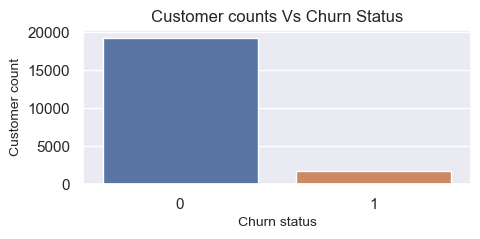

In [100]:
plt.figure(figsize=[5,2])
sns.countplot(data=churn_data, x=target_col, palette='deep')
plt.xlabel('Churn status', fontsize=10)
plt.ylabel('Customer count',fontsize=10)
plt.title('Customer counts Vs Churn Status')
plt.show()

In [101]:
##churn_data=churn_data_copy4.copy()
##churn_data_unseen=churn_data_unseen_copy4.copy()

In [102]:
churn_data_copy2=churn_data.copy()
churn_data_unseen_copy2=churn_data_unseen.copy()

### Numerical Columns

Execution Start Time :  2024-09-11 14:47:27.518016


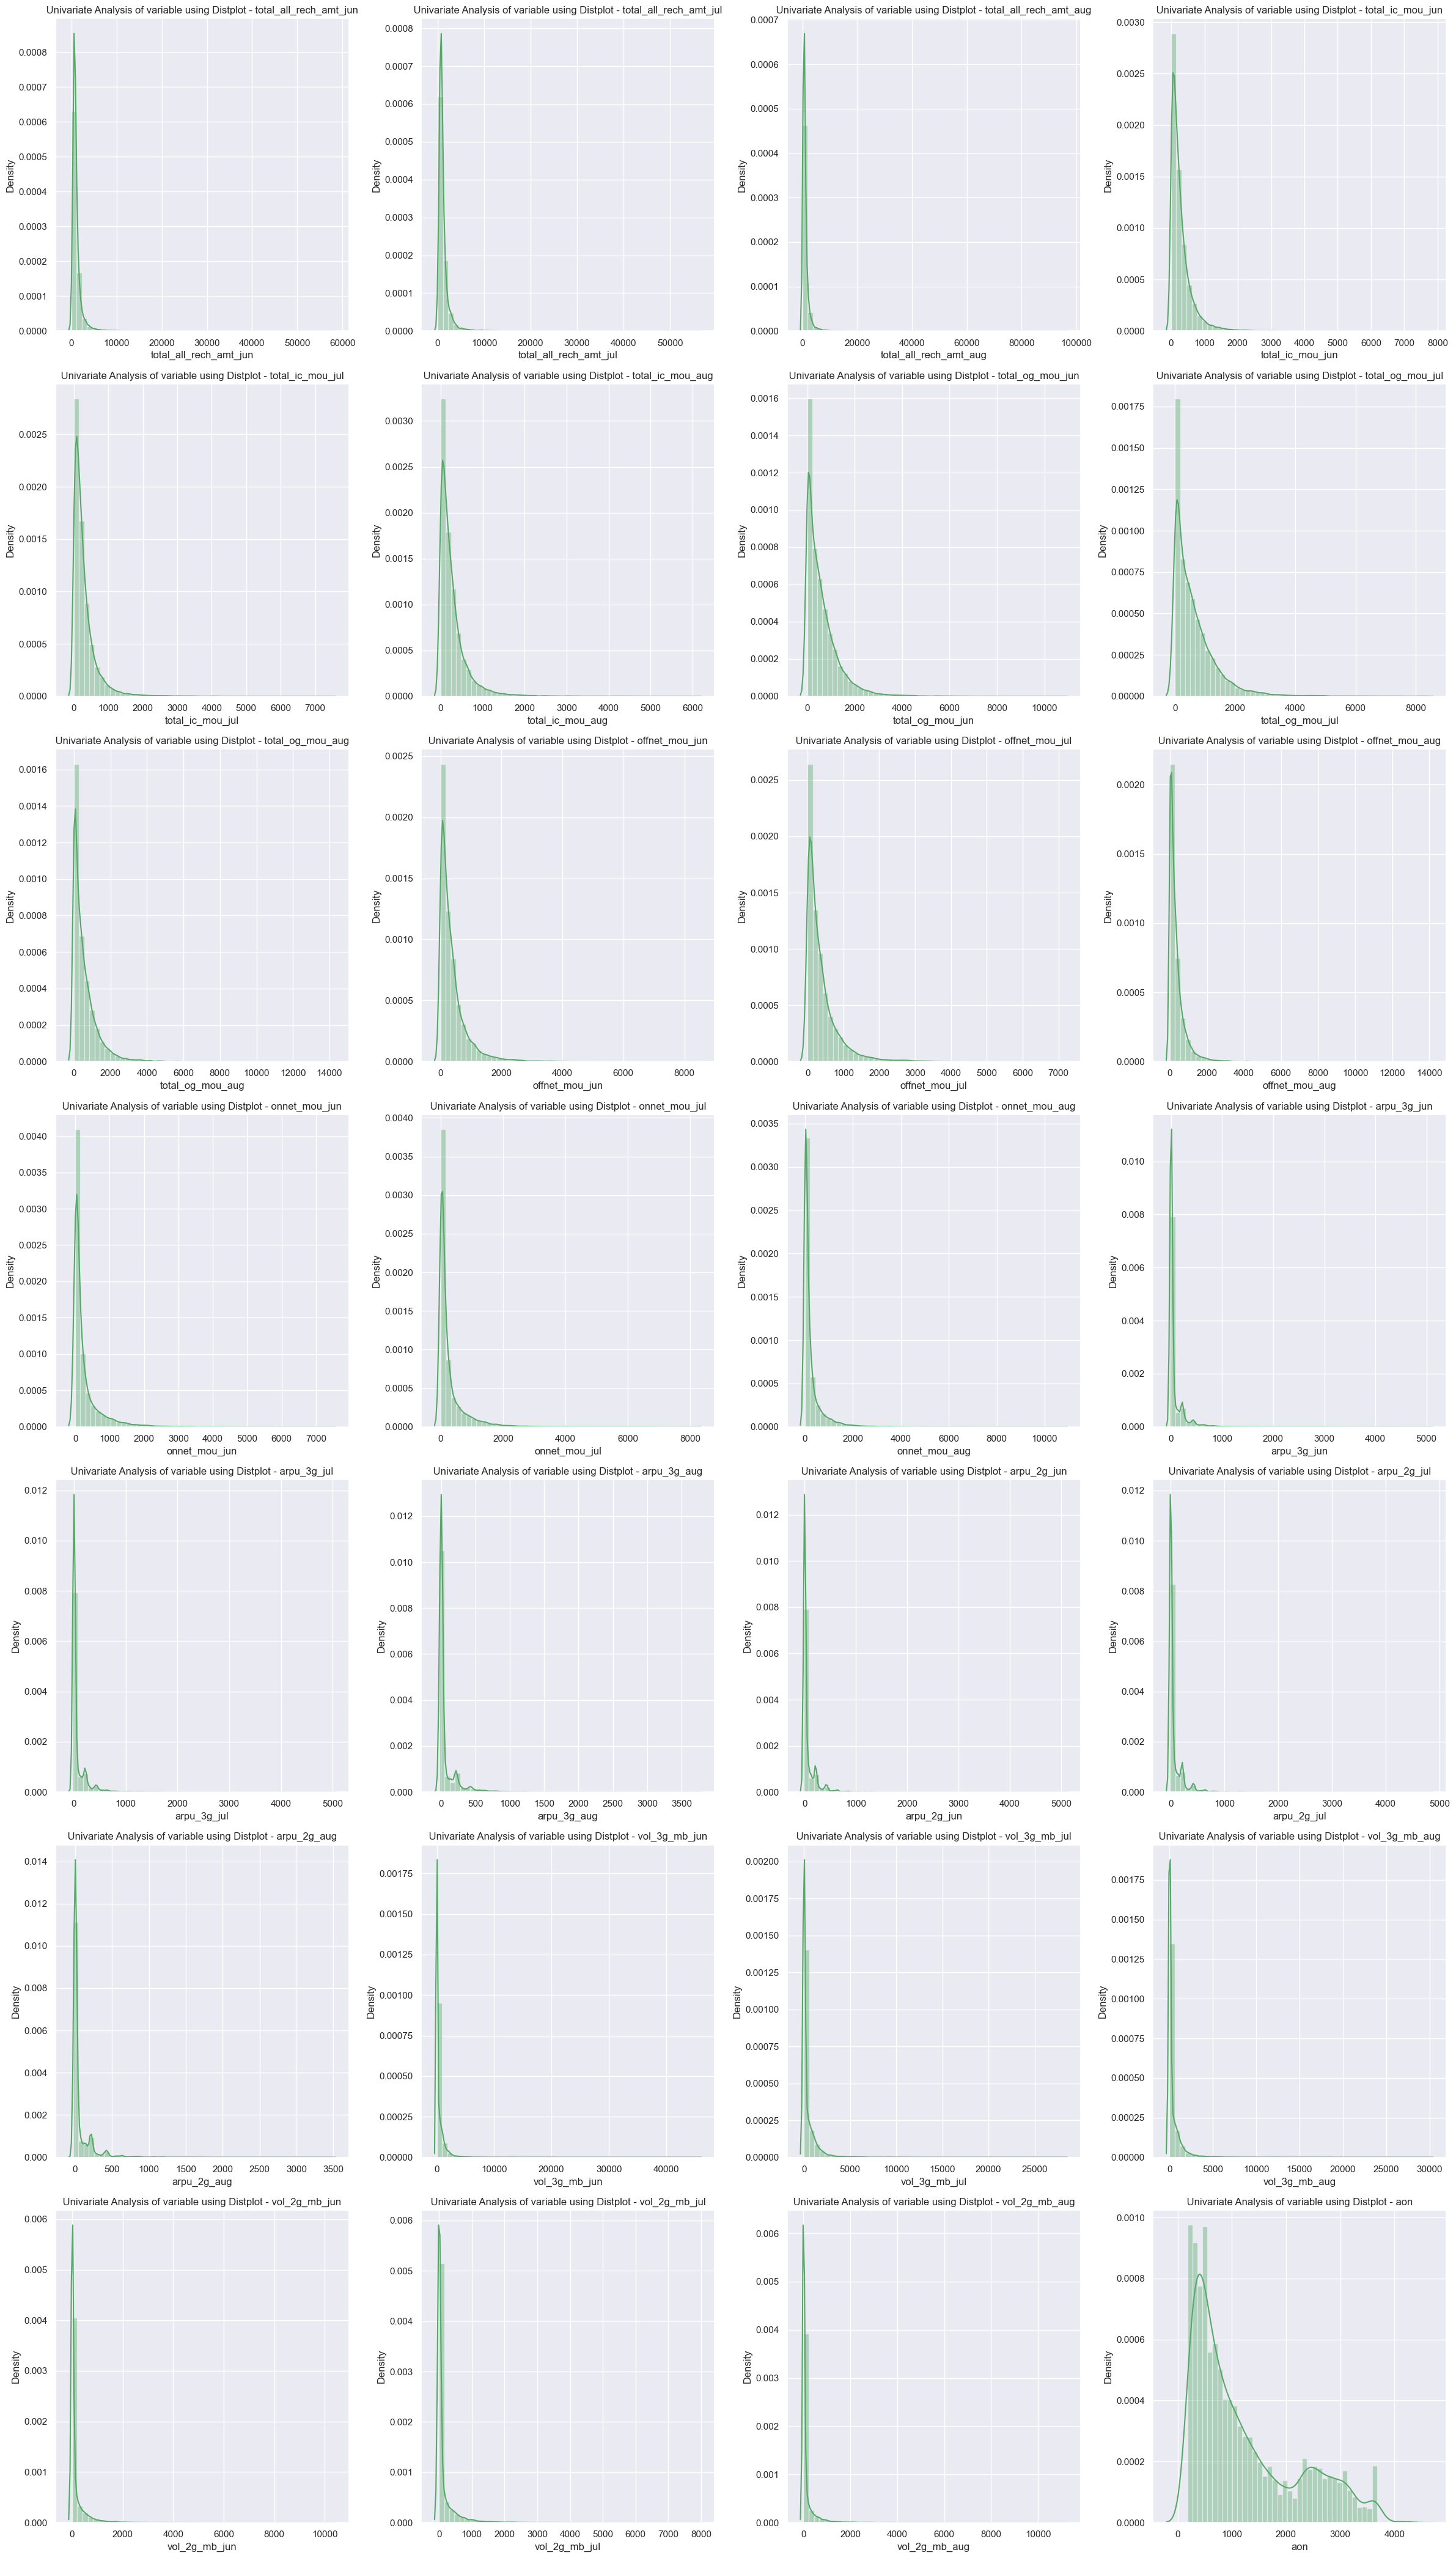

Execution End Time :  2024-09-11 14:47:59.316109
Execution time: 31.79809284210205 seconds


In [103]:
# Start time
start_time = time.time()
print("Execution Start Time : " , datetime.now())

# Define the number of subplots (adjust according to your needs)
num_plots = len(spl_num_cols)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 6
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
# Create subplots
for ax, col in enumerate(spl_num_cols):
    plt.subplot(fig_num_rows, fig_num_cols, ax + 1)
    # Generate a plot for the current column
    sns.distplot( churn_data[col] , color='#55A868' )
    # Set the title for the current subplot
    plt.title( f' Univariate Analysis of variable using Distplot - {col} ' )
# Adjust subplot parameters for a tight layout
plt.tight_layout()
# Display the plots
plt.show()
# End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

### Categorical Columns

Execution Start Time :  2024-09-11 14:47:59.347849


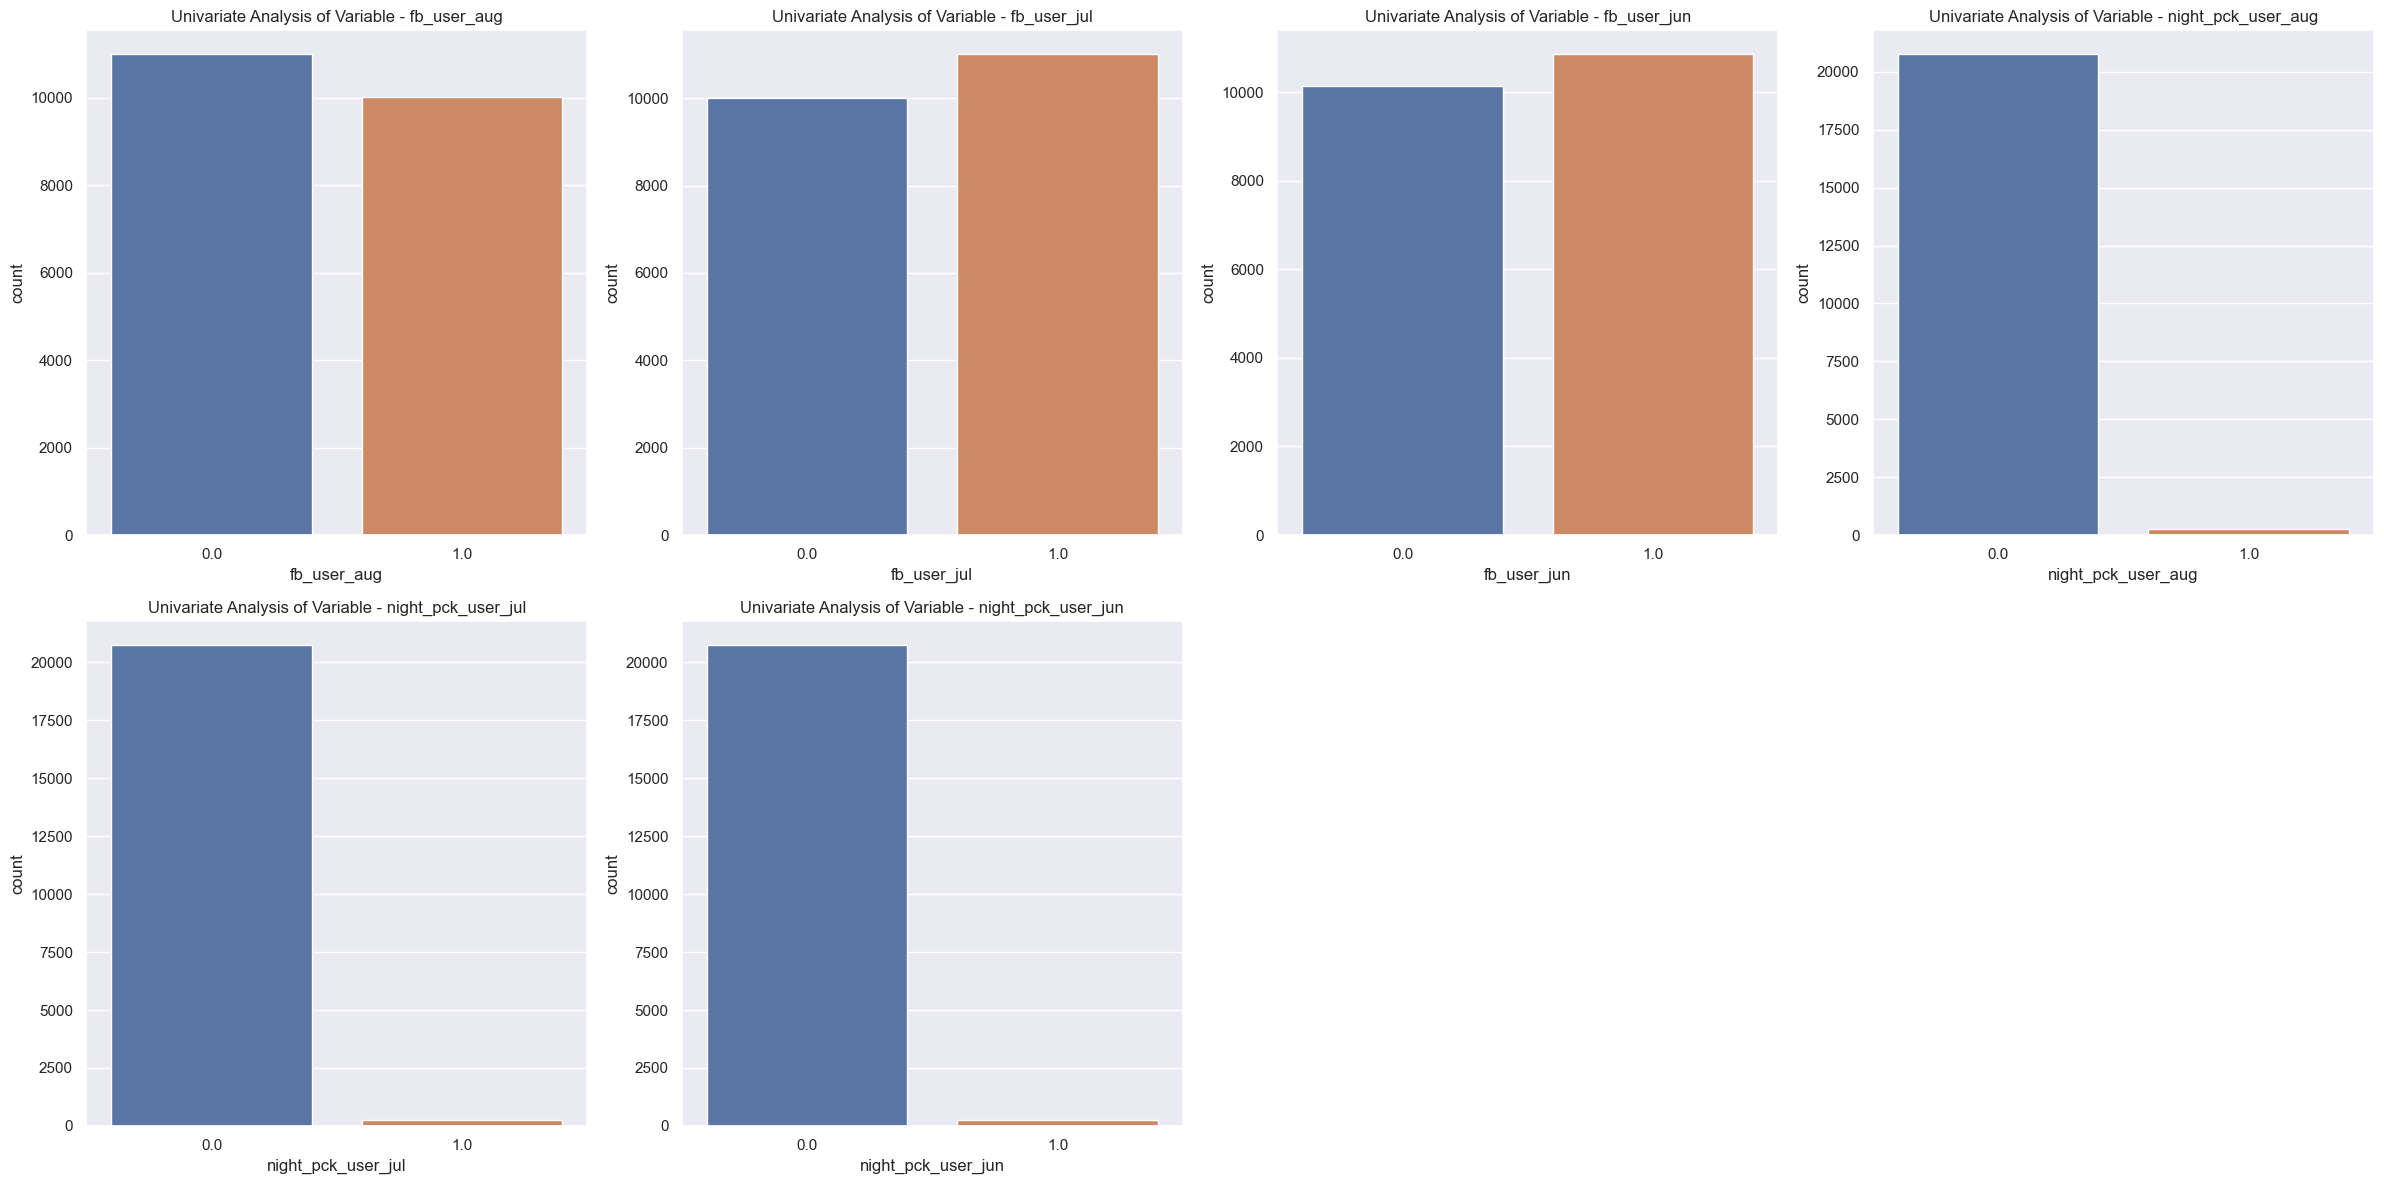

Execution End Time :  2024-09-11 14:48:02.208232
Execution time: 2.8603832721710205 seconds


In [104]:
# Start time
start_time = time.time()
print("Execution Start Time : " , datetime.now())
# Define the number of subplots (adjust according to your needs)
num_plots = len(cat_cols)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 6
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
# Loop through each column to create a subplot
for ax , col in enumerate(cat_cols):
    # Create a subplot for each column
    plt.subplot(fig_num_rows, fig_num_cols, ax+ 1)
    # Order the data
    sort_order=sorted(churn_data[col].unique())
    # Generate a  plot for the current column
    sns.countplot( data=churn_data , x=col , palette='deep' ,order=sort_order)
    # Set the title for the current subplot
    plt.title( f'Univariate Analysis of Variable - {col}' )
# Adjust subplot parameters for a tight layout
plt.tight_layout()
# Display the plots
plt.show()
# End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

### Bivariate Analysis

Execution Start Time :  2024-09-11 14:48:02.224365


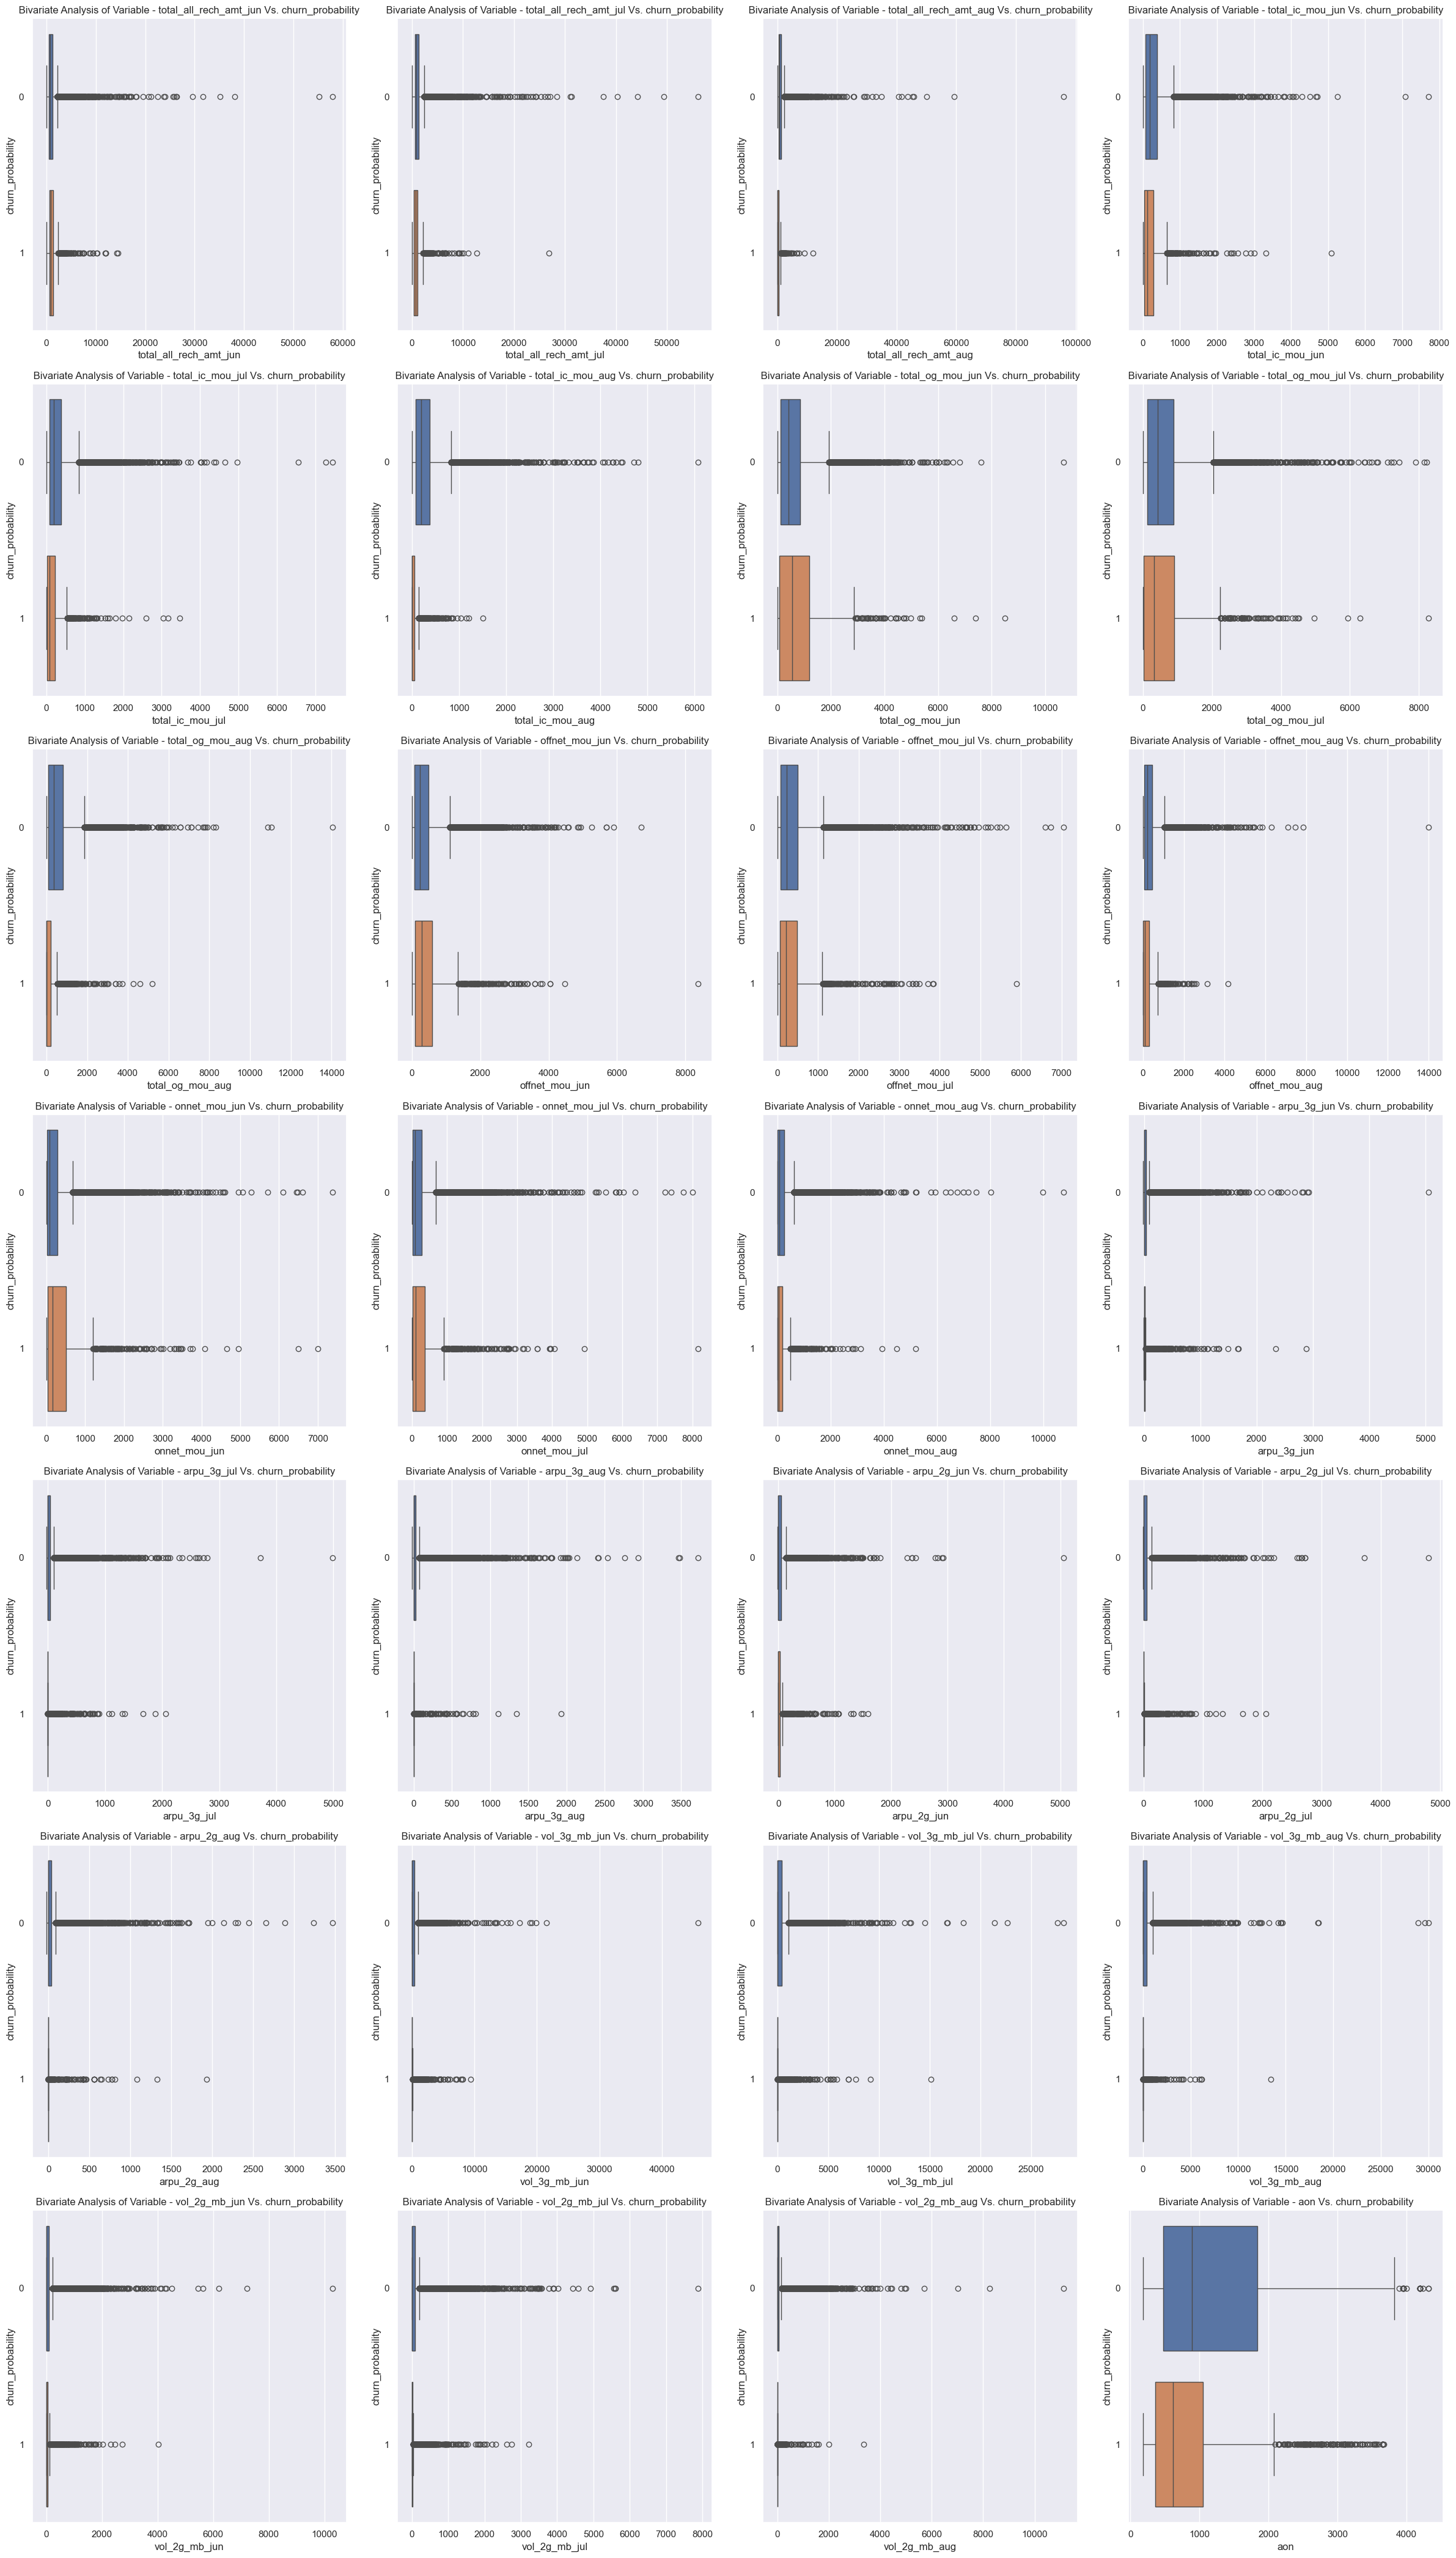

Execution End Time :  2024-09-11 14:48:18.191569
Execution time: 15.967203855514526 seconds


In [105]:
# Numerical Vs Categorical
# Start time
start_time = time.time()
print("Execution Start Time : " , datetime.now())
# Define the number of subplots (adjust according to your needs)
num_plots = len(spl_num_cols)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 6
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
# Loop through each column to create a subplot
for ax, col in enumerate(spl_num_cols):
    # Create a subplot for each column
    plt.subplot(fig_num_rows, fig_num_cols, ax+ 1)
    sns.boxplot(y=churn_data[target_col], x=churn_data[col], palette='deep')
    plt.title(f' Bivariate Analysis of Variable - {col} Vs. {target_col} ')
# Adjust layout
plt.tight_layout()
# Display the plots
plt.show()
# End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution Start Time :  2024-09-11 14:48:18.217592


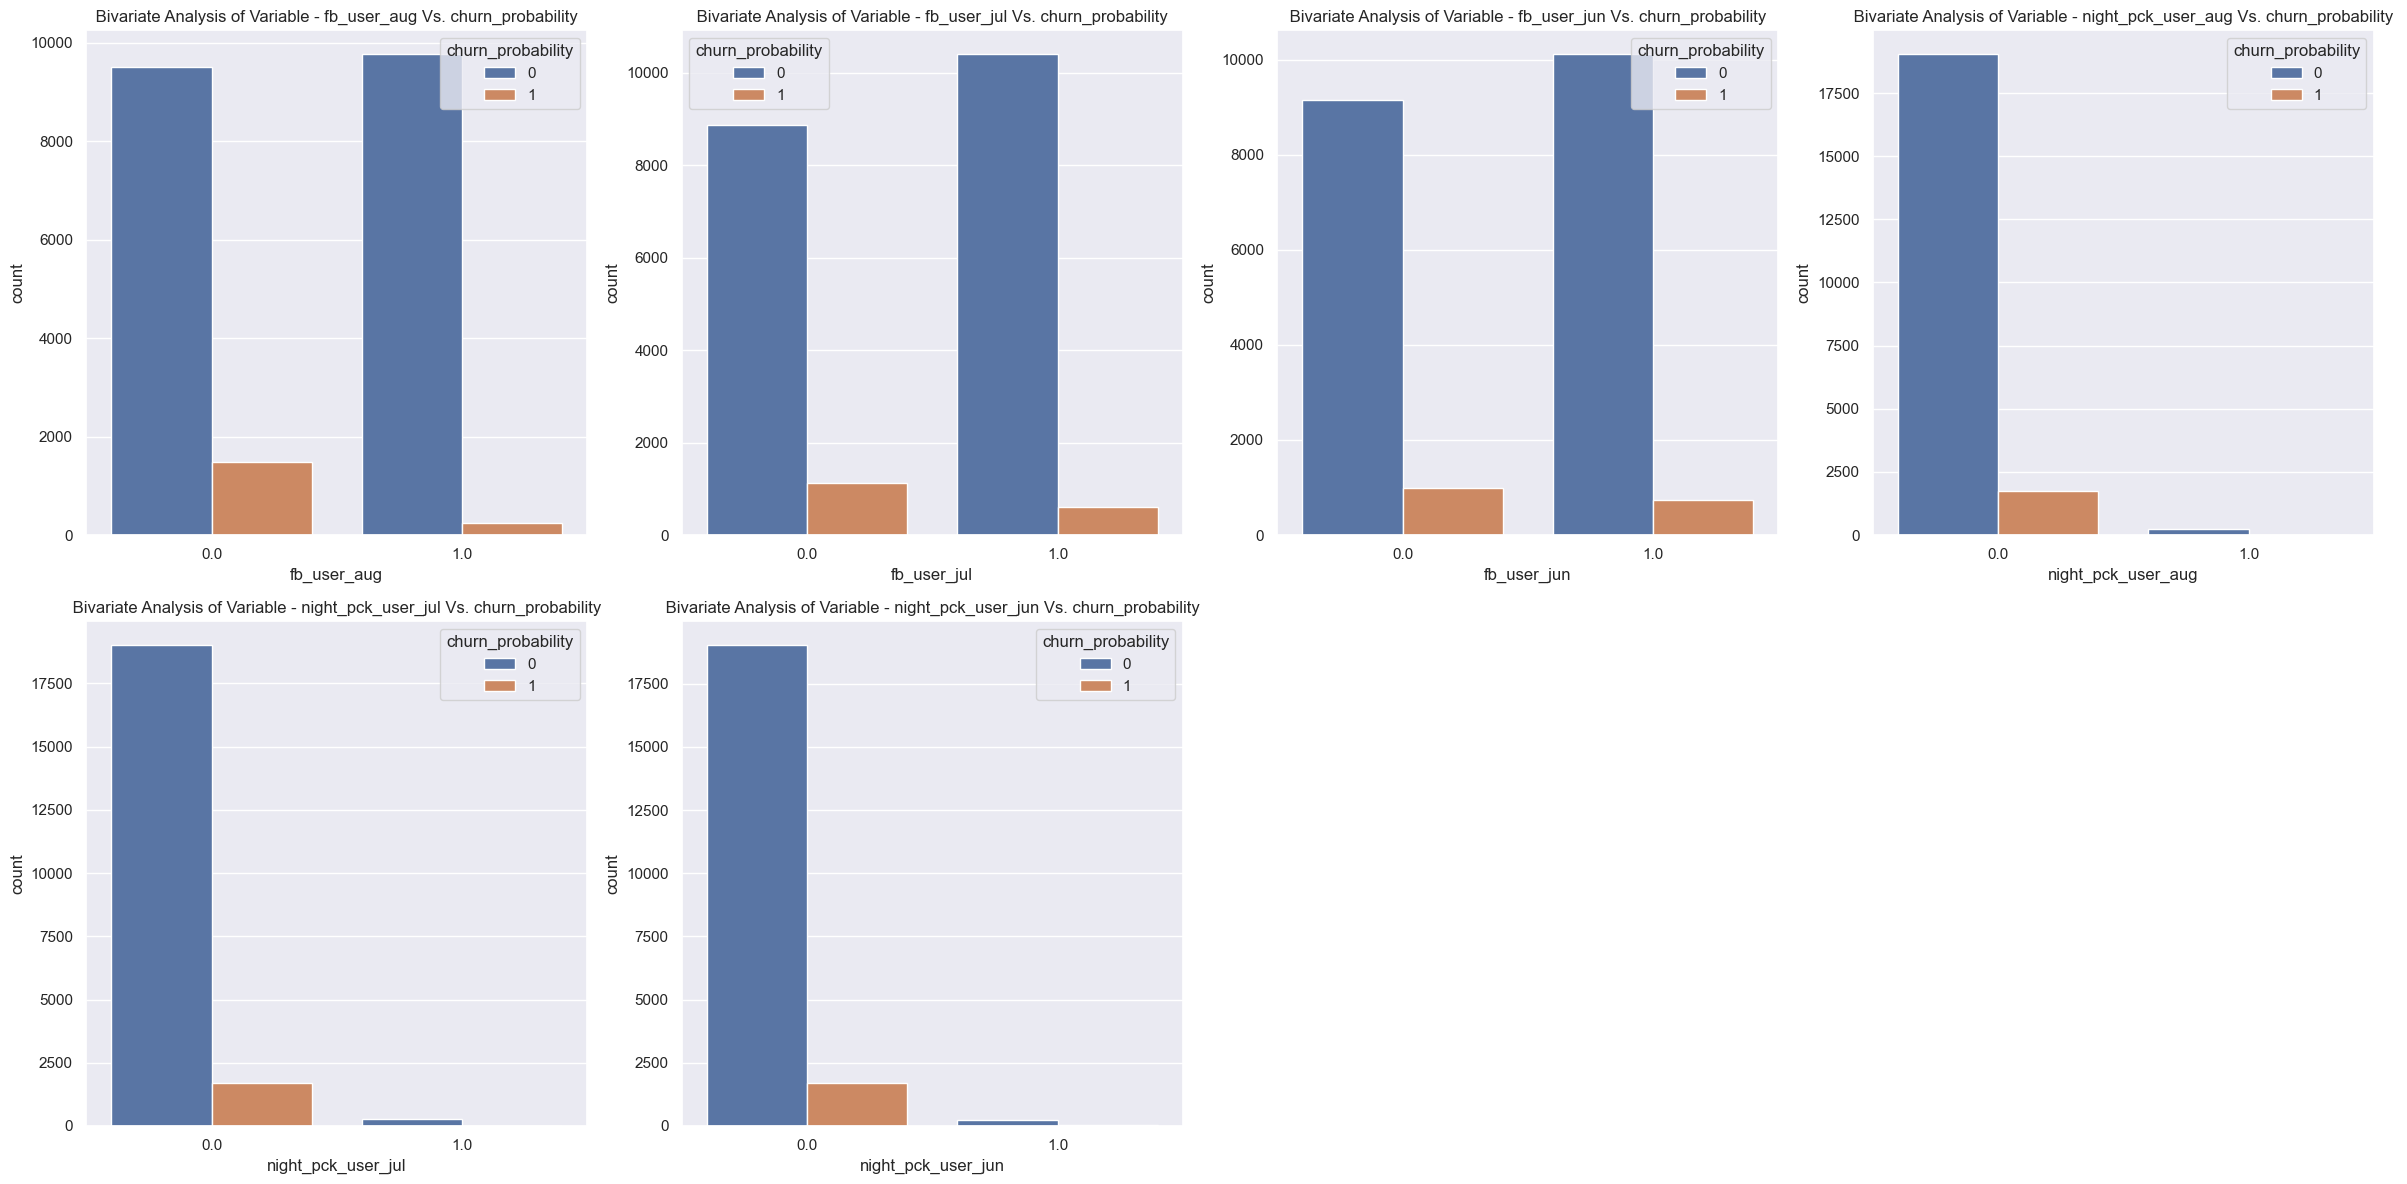

Execution End Time :  2024-09-11 14:48:21.384785
Execution time: 3.1671931743621826 seconds


In [106]:
# Categorical Vs Categorical
# Start time
start_time = time.time()
print("Execution Start Time : " , datetime.now())
# Define the number of subplots (adjust according to your needs)
num_plots = len(cat_cols)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 6
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
# Create subplots
for ax, col in enumerate(cat_cols):
    # Create a subplot for each column
    plt.subplot(fig_num_rows, fig_num_cols, ax+ 1)
    sort_order = sorted(churn_data[col].unique())
    sns.countplot(data=churn_data, x=col, hue=target_col, palette='deep', order=sort_order)
    plt.title(f' Bivariate Analysis of Variable - {col} Vs. {target_col} ')
# Adjust layout
plt.tight_layout()
# Display the plots
plt.show()
# End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

### Multivariate Analysis

#### Special Variables

Execution Start Time :  2024-09-11 14:48:21.400258


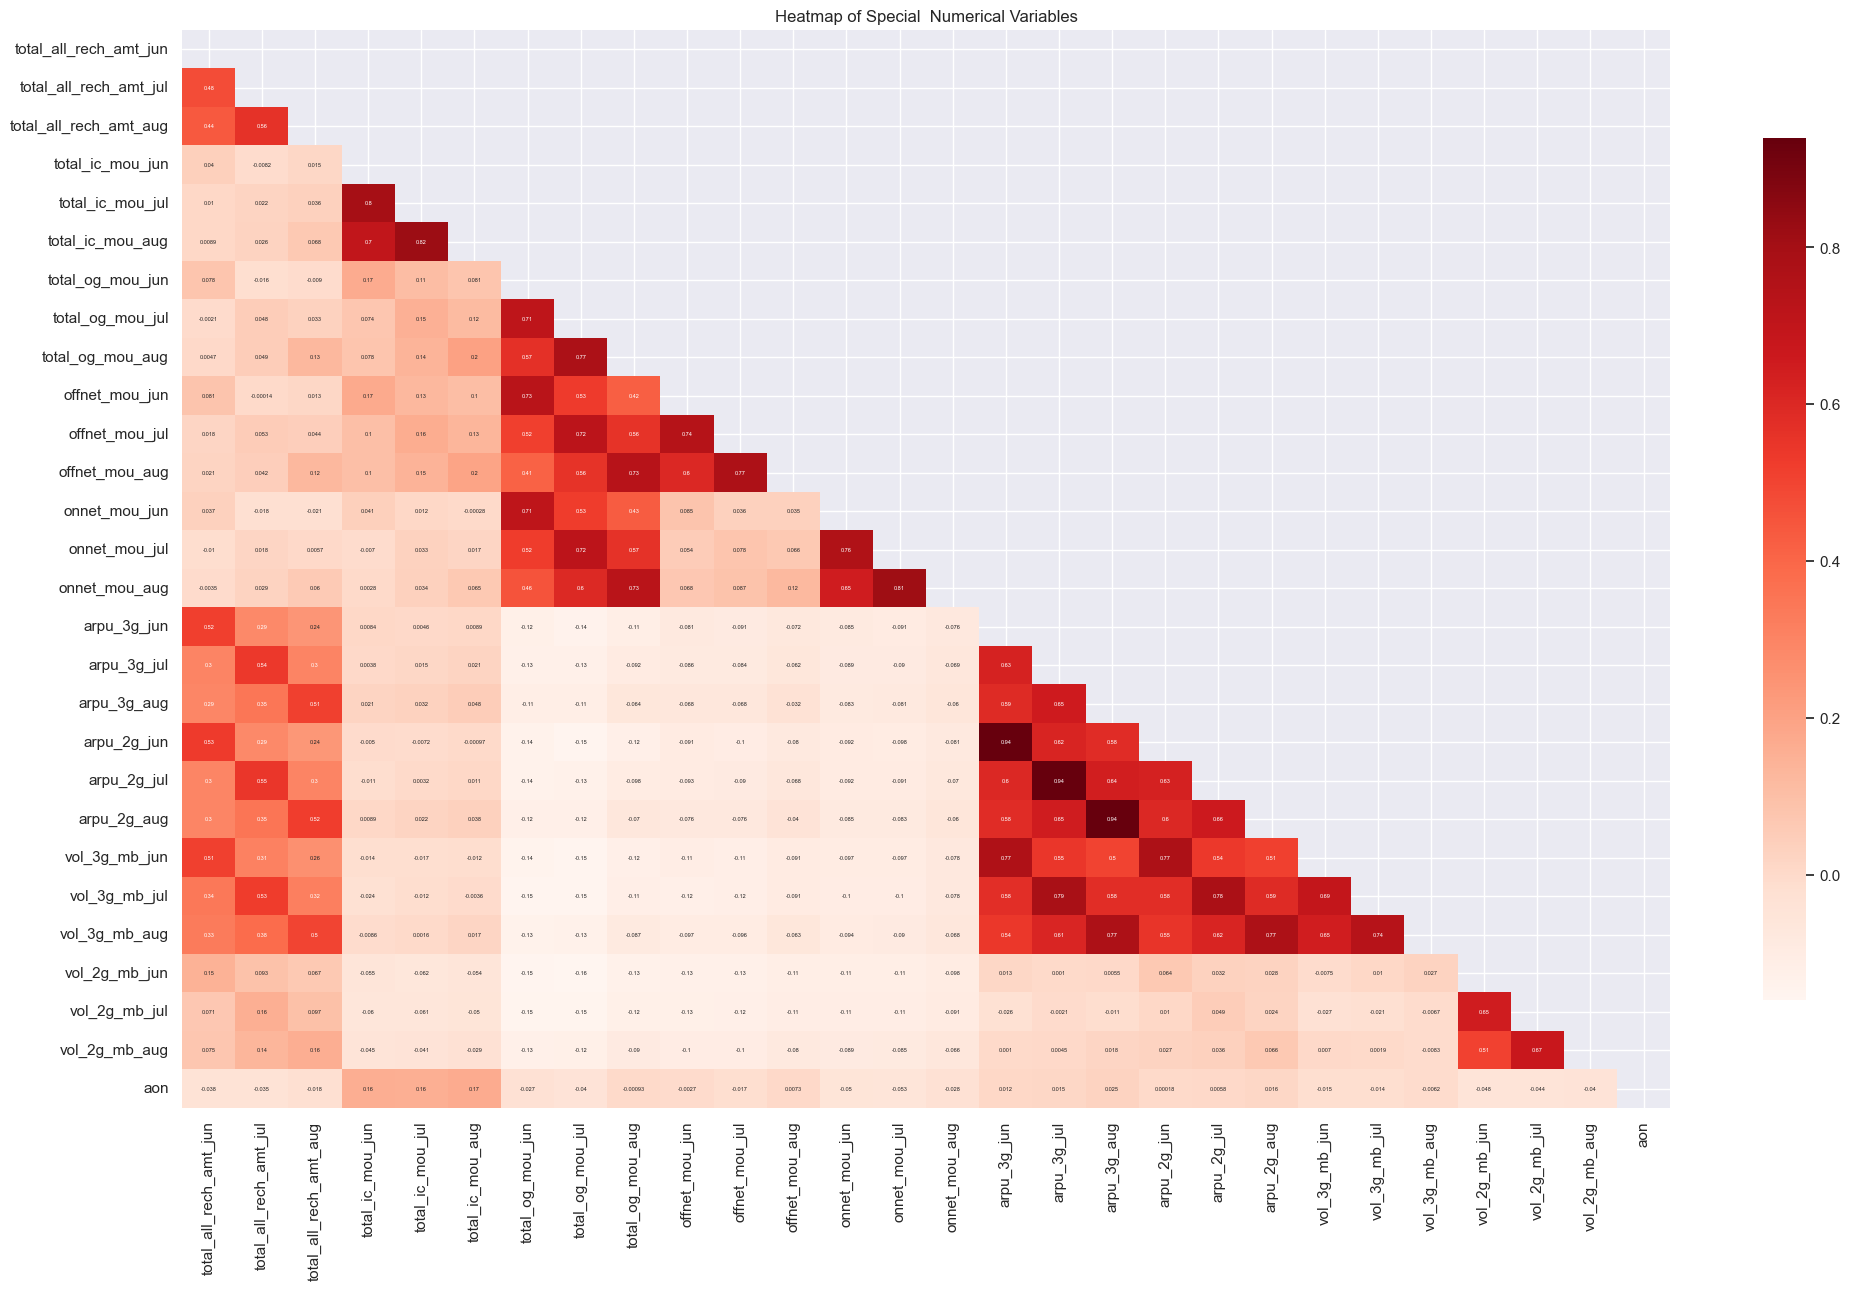

Execution End Time :  2024-09-11 14:48:24.591590
Execution time: 3.1913321018218994 seconds


In [107]:
#Heatmap of Specific Numerical Variables
# Start time
start_time = time.time()
print("Execution Start Time : " , datetime.now())
# Define the number of subplots (adjust according to your needs)
num_plots = len(spl_num_cols)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 2
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
mask = np.triu(churn_data[spl_num_cols].corr())
sns.heatmap(churn_data[spl_num_cols].corr(),mask=mask,annot=True,cmap="Reds",annot_kws={"size": 4},cbar_kws={'shrink': 0.8})
plt.title('Heatmap of Special  Numerical Variables')
# Display the plots
plt.show()
# End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

#### Recharge Columns

Execution Start Time :  2024-09-11 14:48:24.619950


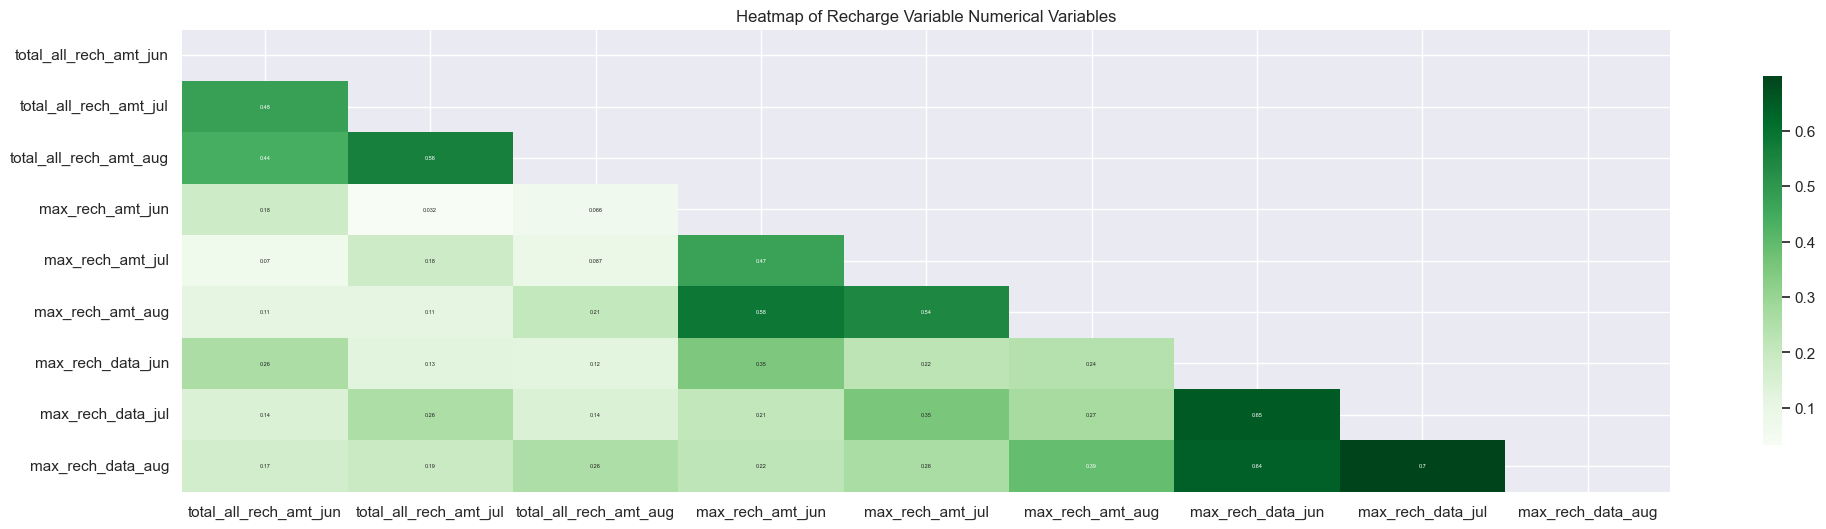

Execution End Time :  2024-09-11 14:48:25.484889
Execution time: 0.8649392127990723 seconds


In [108]:
#Heatmap of Specific Numerical Variables
# Start time
start_time = time.time()
print("Execution Start Time : " , datetime.now())
# Define the number of subplots (adjust according to your needs)
num_plots = len(recharge_variables)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 2
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
mask = np.triu(churn_data[recharge_variables].corr())
sns.heatmap(churn_data[recharge_variables].corr(),mask=mask,annot=True,cmap="Greens",annot_kws={"size": 4},cbar_kws={'shrink': 0.8})
plt.title('Heatmap of Recharge Variable Numerical Variables')
# Display the plots
plt.show()
# End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

#### ARPU Columns

Execution Start Time :  2024-09-11 14:48:25.501178


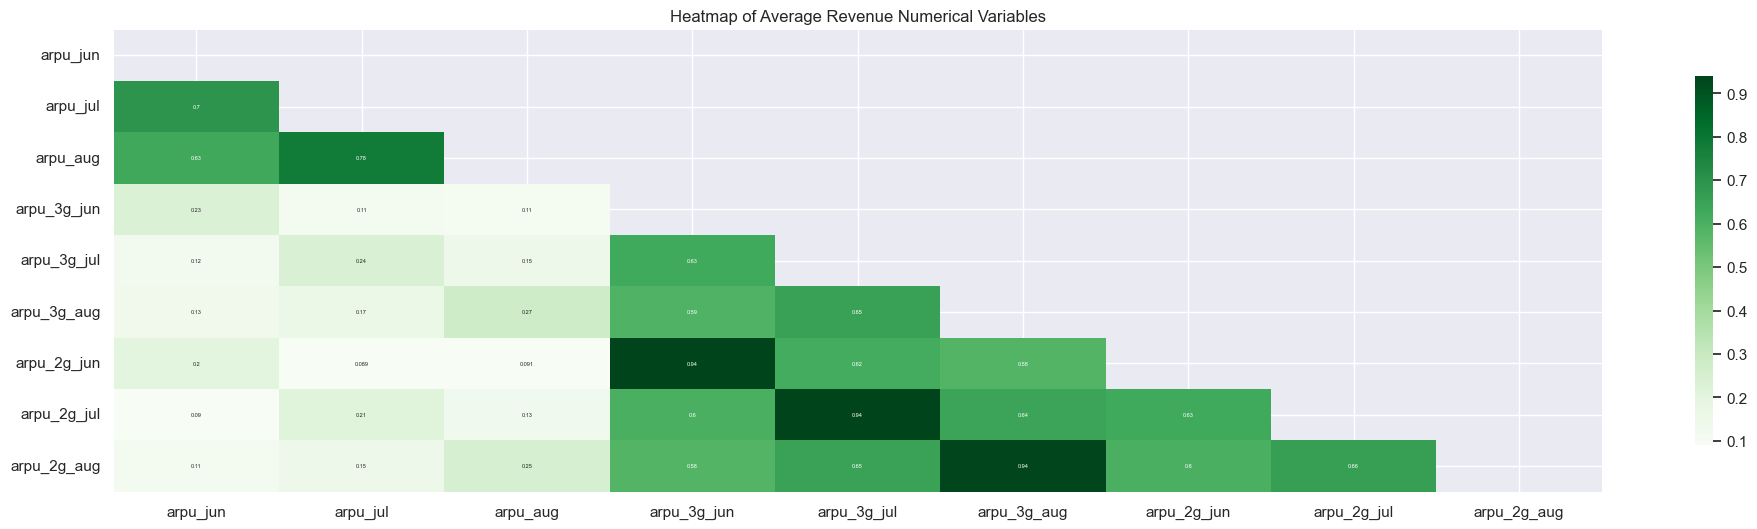

Execution End Time :  2024-09-11 14:48:26.612962
Execution time: 1.1117839813232422 seconds


In [109]:
#Heatmap of Specific Numerical Variables
# Start time
start_time = time.time()
print("Execution Start Time : " , datetime.now())
# Define the number of subplots (adjust according to your needs)
num_plots = len(arpu_cols)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 2
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
mask = np.triu(churn_data[arpu_cols].corr())
sns.heatmap(churn_data[arpu_cols].corr(),mask=mask,annot=True,cmap="Greens",annot_kws={"size": 4},cbar_kws={'shrink': 0.8})
plt.title('Heatmap of Average Revenue Numerical Variables')
# Display the plots
plt.show()
# End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

#### Data 3g Variables 

Execution Start Time :  2024-09-11 14:48:26.629614


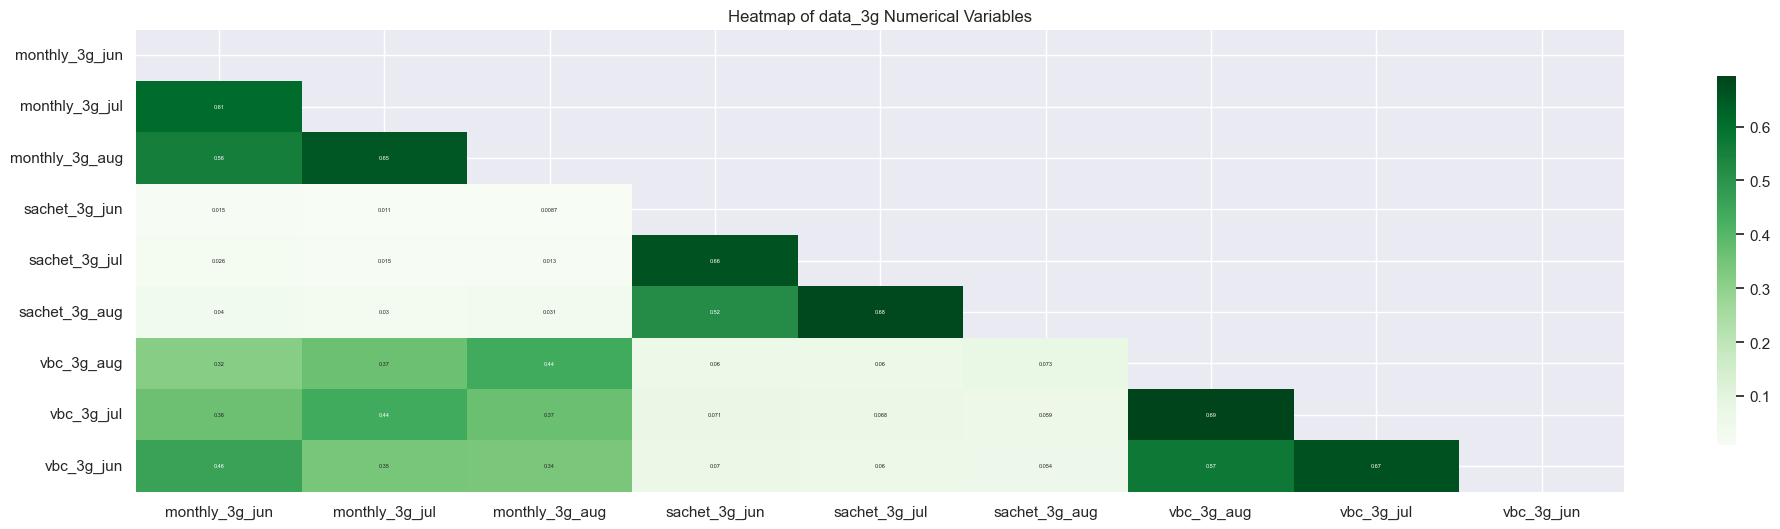

Execution End Time :  2024-09-11 14:48:27.813726
Execution time: 1.1841120719909668 seconds


In [110]:
#Heatmap of Specific Numerical Variables
# Start time
start_time = time.time()
print("Execution Start Time : " , datetime.now())
# Define the number of subplots (adjust according to your needs)
num_plots = len(data_3g)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 2
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
mask = np.triu(churn_data[data_3g].corr())
sns.heatmap(churn_data[data_3g].corr(),mask=mask,annot=True,cmap="Greens",annot_kws={"size": 4},cbar_kws={'shrink': 0.8})
plt.title('Heatmap of data_3g Numerical Variables')
# Display the plots
plt.show()
# End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

#### Data 2g Variables

Execution Start Time :  2024-09-11 14:48:27.830186


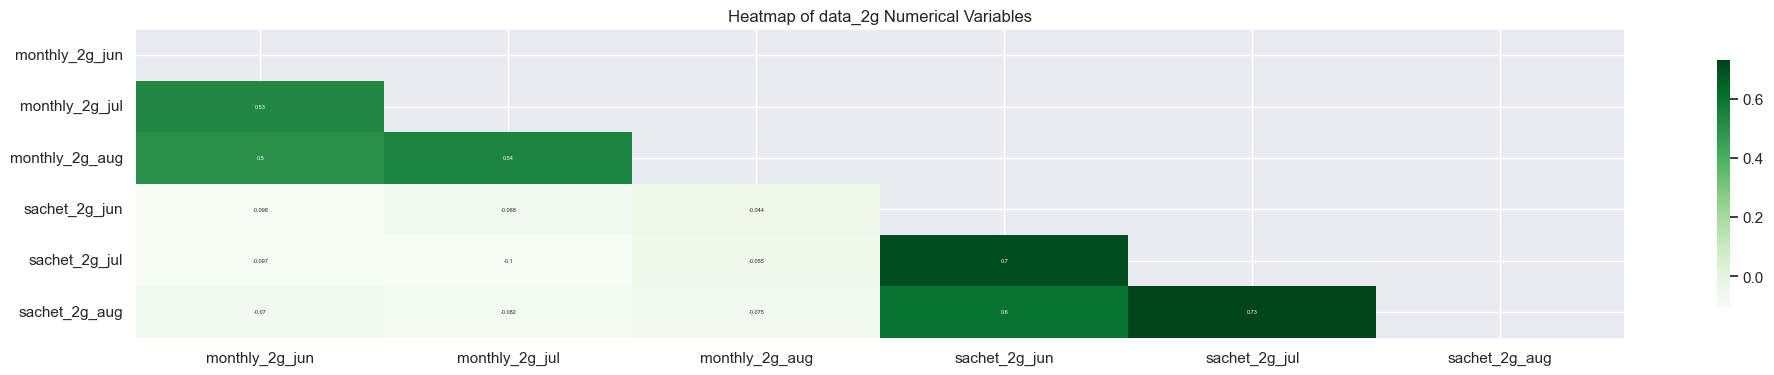

Execution End Time :  2024-09-11 14:48:28.509645
Execution time: 0.679459810256958 seconds


In [111]:
#Heatmap of Specific Numerical Variables
# Start time
start_time = time.time()
print("Execution Start Time : " , datetime.now())
# Define the number of subplots (adjust according to your needs)
num_plots = len(data_2g)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 2
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
mask = np.triu(churn_data[data_2g].corr())
sns.heatmap(churn_data[data_2g].corr(),mask=mask,annot=True,cmap="Greens",annot_kws={"size": 4},cbar_kws={'shrink': 0.8})
plt.title('Heatmap of data_2g Numerical Variables')
# Display the plots
plt.show()
# End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

#### Incoming Calls

Execution Start Time :  2024-09-11 14:48:28.517006


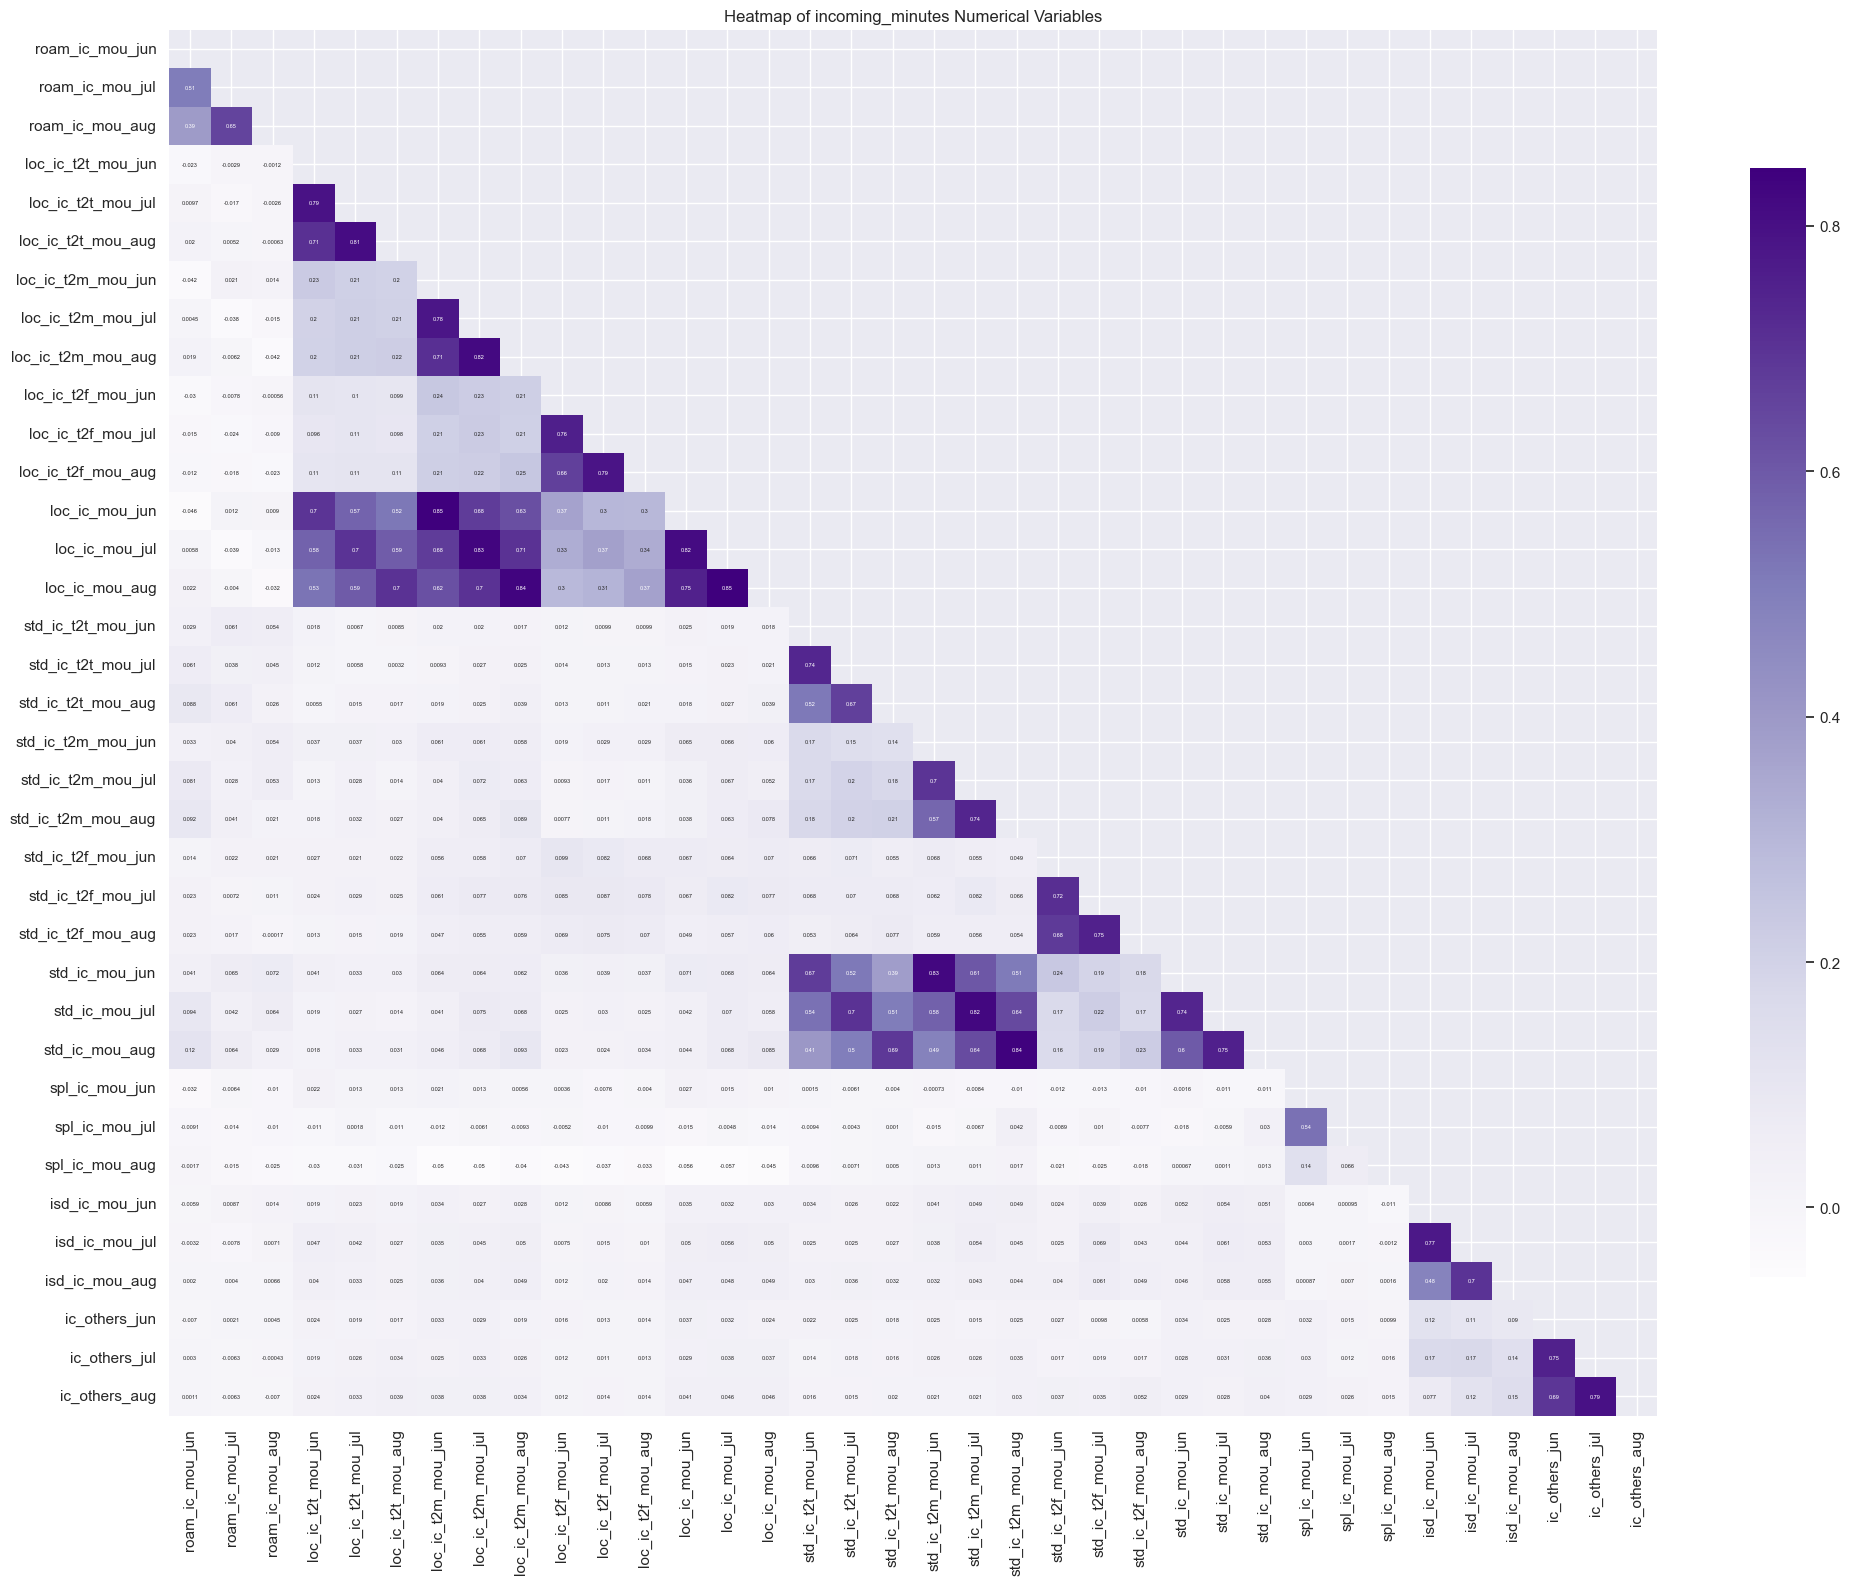

Execution End Time :  2024-09-11 14:48:32.861980
Execution time: 4.3449742794036865 seconds


In [112]:
#Heatmap of Specific Numerical Variables
# Start time
start_time = time.time()
print("Execution Start Time : " , datetime.now())
# Define the number of subplots (adjust according to your needs)
num_plots = len(incoming_minutes)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 2
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
mask = np.triu(churn_data[incoming_minutes].corr())
sns.heatmap(churn_data[incoming_minutes].corr(),mask=mask,annot=True,cmap="Purples",annot_kws={"size": 4},cbar_kws={'shrink': 0.8})
plt.title('Heatmap of incoming_minutes Numerical Variables')
# Display the plots
plt.show()
# End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

#### Outgoing Columns

Execution Start Time :  2024-09-11 14:48:32.883296


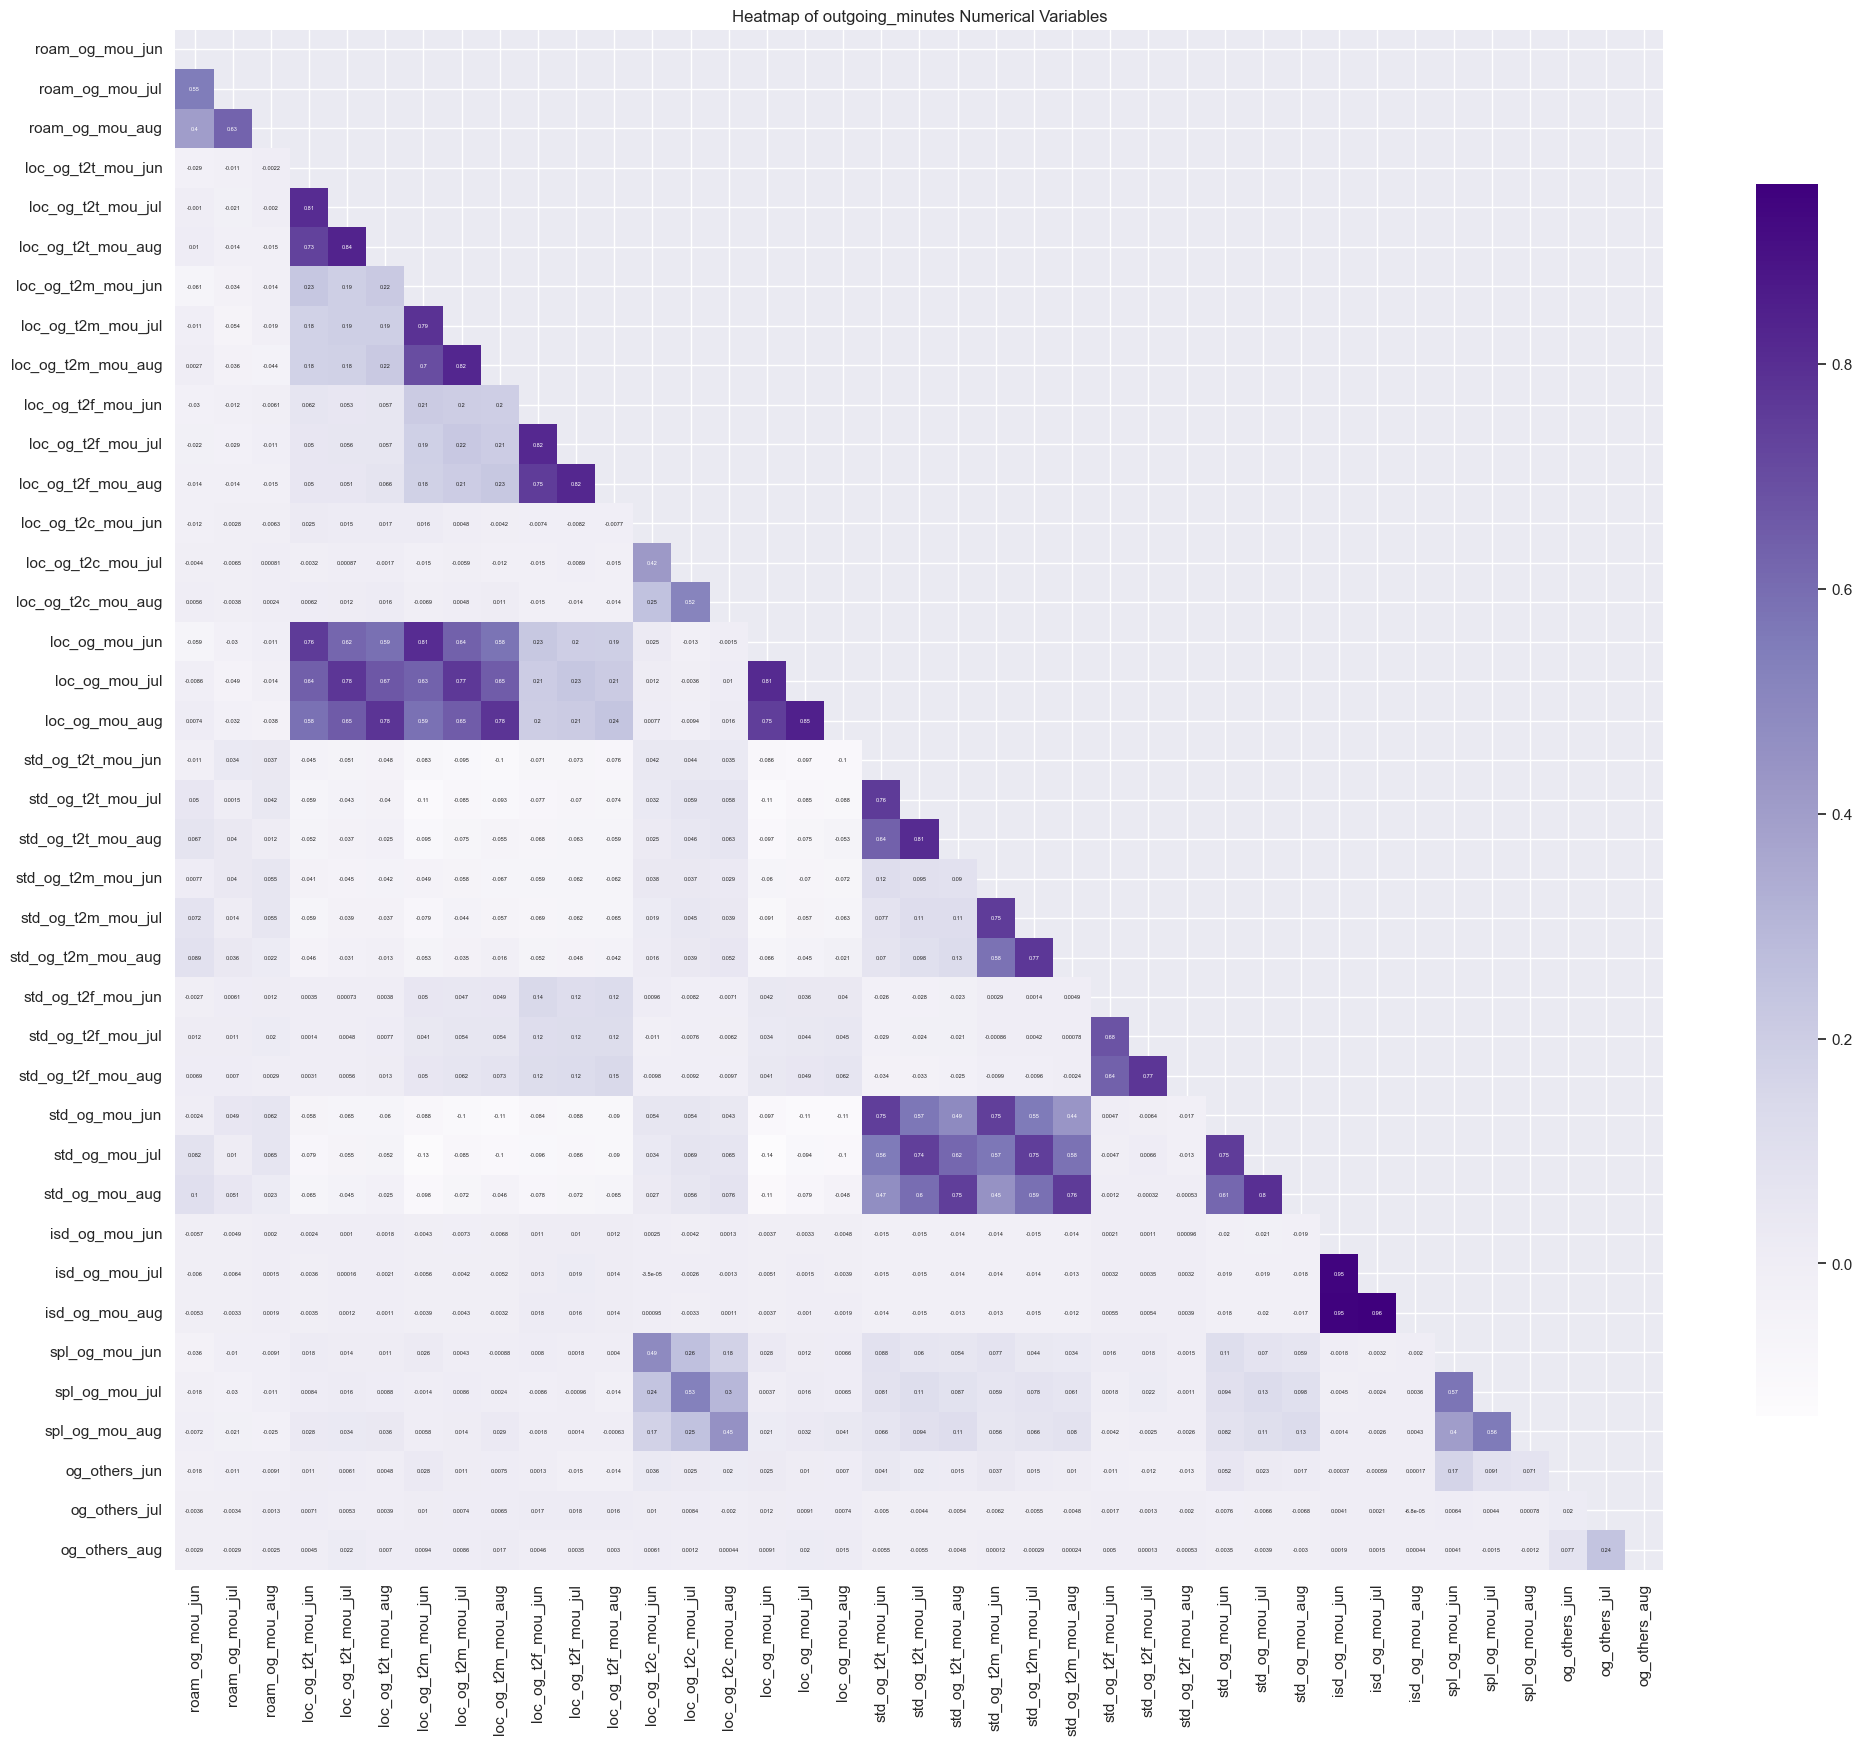

Execution End Time :  2024-09-11 14:48:38.416681
Execution time: 5.533384561538696 seconds


In [113]:
#Heatmap of Specific Numerical Variables
# Start time
start_time = time.time()
print("Execution Start Time : " , datetime.now())
# Define the number of subplots (adjust according to your needs)
num_plots = len(outgoing_minutes)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 2
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
mask = np.triu(churn_data[outgoing_minutes].corr())
sns.heatmap(churn_data[outgoing_minutes].corr(),mask=mask,annot=True,cmap="Purples",annot_kws={"size": 4},cbar_kws={'shrink': 0.8})
plt.title('Heatmap of outgoing_minutes Numerical Variables')
# Display the plots
plt.show()
# End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

### Analyze August Data Usage and Recharge Amounts with Various Hue Indicators"

Execution Start Time :  2024-09-11 14:48:38.432982


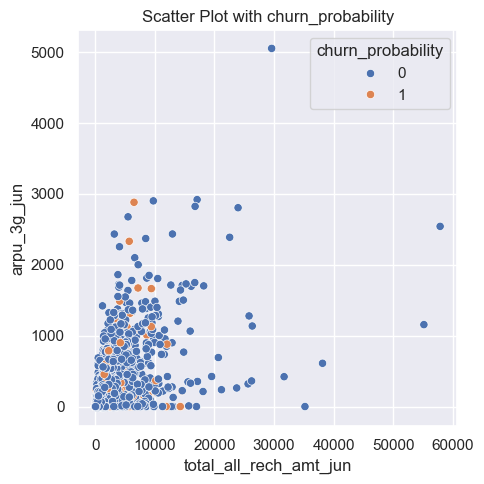

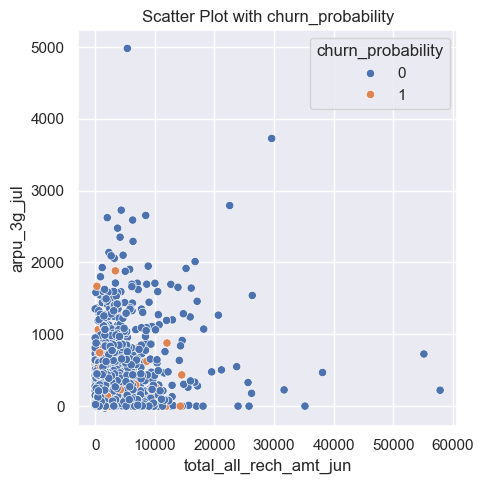

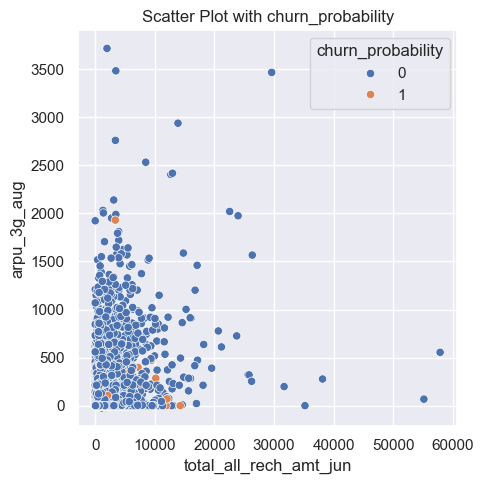

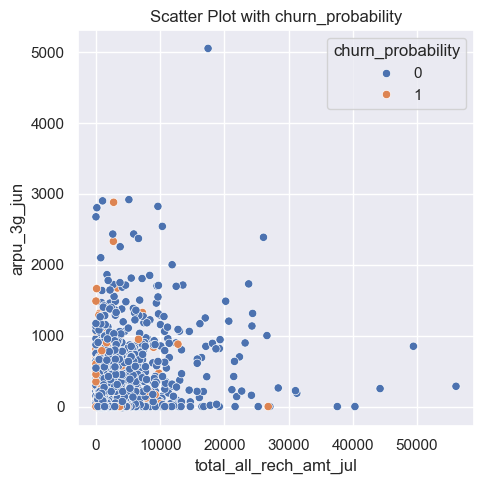

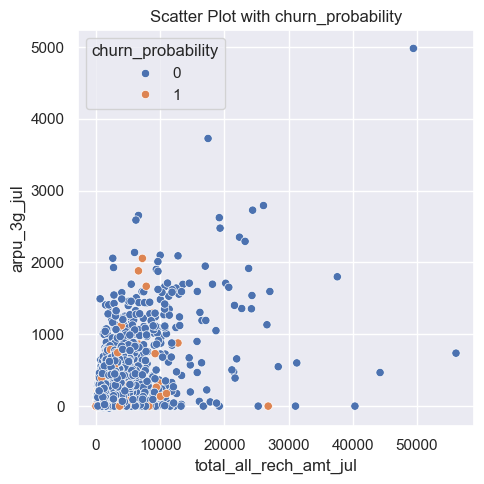

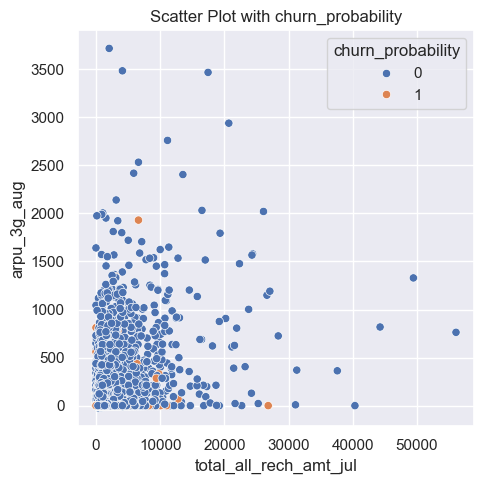

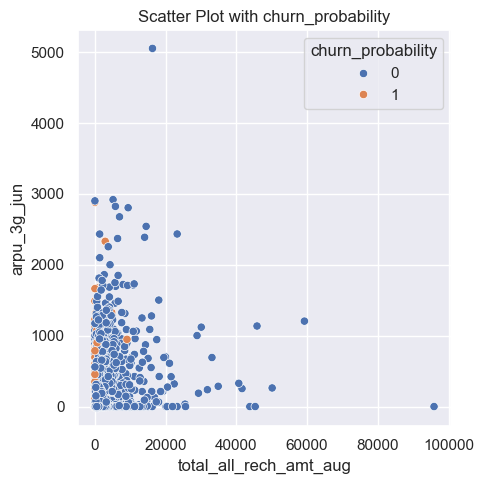

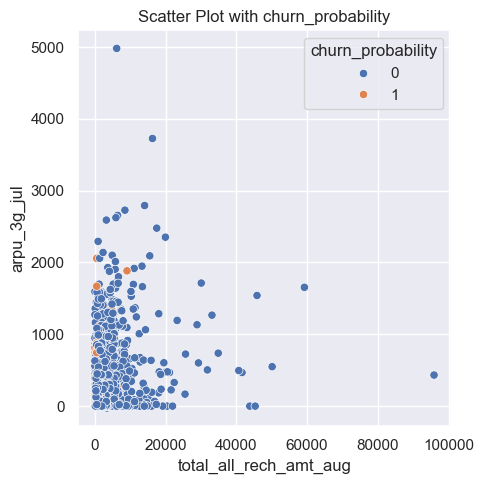

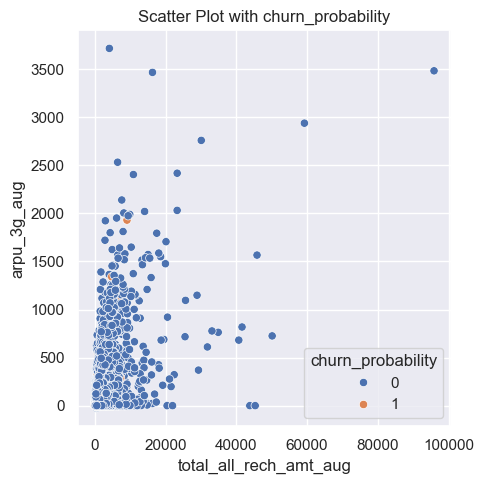

Execution End Time :  2024-09-11 14:48:53.810585
Execution time: 15.377602815628052 seconds


In [114]:
# Start time
start_time = time.time()
print("Execution Start Time : " , datetime.now())

# Define columns for the X and Y axes
cols_x = total_recharge_amount_cols  # Total recharge amount in months
cols_y = average_revenue_3g   # Average revenue per user in months

# Define the columns to be used as hue (color) in the scatter plots
hue_col = target_col

# Create individual scatter plots for each hue column
for col_x in cols_x:
    for col_y in cols_y:
        plt.figure(figsize=(5, 5))  # Set figure size to be manageable
    
        # Create a scatter plot with the specified X and Y columns and hue
        sns.scatterplot(data=churn_data, x=col_x, y=col_y, hue=hue_col, 
                    palette='deep')
    
        # Set the title for the scatter plot
        plt.title(f'Scatter Plot with {hue_col}')
    
        # Set the labels for the X and Y axes
        plt.xlabel(f'{col_x}')
        plt.ylabel(f'{col_y}')
    
        # Adjust the layout to prevent overlapping elements
        plt.tight_layout()
    
        # Display the plot
        plt.show()

# End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

### Observations from the Bivariate Analysis :
    
    - Call Usage: Most users show low call usage, with some heavy users as outliers.
    - Churn Probability: Higher usage generally correlates with a higher likelihood of churn.
    - Outliers: Numerous outliers suggest a few users have extreme usage patterns.
    - Monthly Comparison: Median usage is consistent across months, but individual behaviors vary.
    - Roaming Usage: High variance in roaming usage, with heavy roamers showing more churn risk.
    - Data Usage (2G/3G): Higher data consumption is linked to a greater chance of churn.
    - Service Type Influence: Frequent STD and ISD callers tend to have a higher churn probability.
    - Facebook and similar social networking sites user : Most users are not Facebook users across all three months, with a consistent trend of slightly higher churn among non-users.
    - Monthly 2G Usage: Across June, July, and August, the majority of users have minimal 2G usage, with a higher churn rate observed among users with increased 2G usage.
    - Monthly 3G Usage: Consistently low 3G usage across all three months, with higher 3G usage correlating with a higher churn probability.
    - Night Pack Users: Most users do not use night packs in any of these months, with a small segment of night pack users showing a higher churn rate.
    
### Observations from the Multivariate Analysis:
    - High correlation among ARPU variables in June, July, and August.
    - Strong positive correlations among total_rech_amt variables for all months.
    - Moderate correlation between outgoing and incoming minutes of usage.
    - Weak correlation between total recharge numbers and ARPU.
    - Stable user behavior across different months.
    - Potential redundancy in variables due to high correlations.
    - Consistent trends in total minutes of usage (total_mou) across months.
    - Recharge and usage patterns are closely linked.
    - Low negative correlation between some recharge and usage metrics.
    - Higher correlations in same-category features like total_arpu and total_mou
    - Churn Probability vs. Total Spent: Most churn cases occur with lower spending in August.
    - Facebook Usage vs. Total Spent: Users are split into two groups with no clear spending pattern.
    - 2G Usage vs. Total Spent: 2G usage varies widely across different spending levels.
    - 3G Usage vs. Total Spent: 3G usage also shows diverse patterns with spending in August.

## Interfences :
    - Age on Network (aon): AON seems to be a strong indicator of churn, with most users churning around 850 days.
    - Total Recharge Amount (total_rech_amt): The recharge amount was significantly higher for churned customers in June and July but dropped sharply in August.
    - Data Recharge Amount (total_rech_data_amt): Data recharge amounts also decreased each month for churned customers.
    - Average Revenue Per User (total_arpu_2g_3g): There was a significant drop in ARPU for churned customers between the "good" and "action" phases.
    - Maximum Recharge Amount (max_rech_amt): Churned customers saw a notable drop in their maximum recharge amounts between the "good" and "action" phases.
    - Total Recharge Values (total_rech_amt): The biggest drop in total recharge values occurred among churned customers compared to non-churned customers between the "good" and "action" phases.
    - Maximum Data Recharge Values (max_rech_data): Churned customers also experienced the largest decline in maximum data recharges compared to non-churned customers during this period.
    - Data Pack Usage (night_pck_user, monthly_2g_, monthly_3g_): For night, 2G, and 3G data packs, the churn rate was significant in the "action" phase.
    - On-net and Off-net Usage (onnet_mou, offnet_mou): Churned customers had the highest drop in on-net and off-net values compared to non-churned customers between the "good" and "action" phases.
    - Revenue Per User (total_arpu_2g_3g): Both 2G and 3G usage showed similar trends in revenue per user across the months.
    Roaming Usage (total_roam_mou_aug, total_roam_mou_jul, total_roam_mou_jun): High roaming charges are associated with increased churn, indicating that users with significant roaming activity are more likely to switch providers.
    - Call Usage Patterns (mean_total_std_mou, mean_total_ic_mou): Users with high call usage, especially those who frequently make STD and ISD calls, exhibit a higher churn probability, suggesting dissatisfaction with current pricing or service plans.
    - 2G and 3G Data Usage (total_vol_2g_3g_mb_aug, total_vol_2g_3g_mb_jul, total_vol_2g_3g_mb_jun): Higher data usage, both in 2G and 3G categories, correlates with increased churn, highlighting a potential need for better data package options or enhanced service quality for high-data users.
    - Night Pack Usage (night_pck_user_aug, night_pck_user_jul, night_pck_user_jun): Despite a small segment of night pack users, this group shows a higher churn rate, indicating that night pack offerings may not be meeting user expectations or needs effectively.
    - Facebook Usage Correlation (fb_user_aug, fb_user_jul, fb_user_jun): Users who are not on Facebook tend to have a slightly higher churn rate, suggesting that engagement with social networks could be linked to greater service satisfaction or loyalty.
    - Monthly Usage Consistency (total_mou_aug, total_mou_jul, total_mou_jun): Consistent monthly median usage, despite individual variations, suggests that overall user behavior remains stable, but outliers with extreme usage patterns could be driving churn.
    - Recharge Frequency (total_rech_num_aug, total_rech_num_jul, total_rech_num_jun): Users with a high frequency of recharges but lower total recharge amounts show an increased likelihood of churn, indicating potential dissatisfaction or financial constraints affecting their spending patterns.

# Model Building

## Some useful custom functions

In [115]:
def evaluate_model( X_true, y_true, estimator, data_name, dataset_type, cut_off=0.5 ):
    
    print(f"Evaluating {dataset_type} Set: data set name - {data_name}")
    # Prediction
    y_pred = estimator.predict(X_true)
    y_pred_prob = estimator.predict_proba(X_true)[:, 1]
    
    if cut_off!=0.5 :
        # Binarize predictions based on the cutoff
        y_pred = [1 if prob >= cut_off else 0 for prob in y_pred_prob]
    
    # Confusion matrix
    confusion = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", confusion)
    
    # Classification report
    classification = classification_report(y_true, y_pred)
    print("\nClassification Report:\n", classification)
    
    # Extract TP, TN, FP, FN
    TP = confusion[1, 1]  # True Positive
    TN = confusion[0, 0]  # True Negative
    FP = confusion[0, 1]  # False Positive
    FN = confusion[1, 0]  # False Negative
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {round(100 * accuracy, 2)}%")
    
    # Sensitivity (Recall for the positive class)
    sensitivity = TP / float(TP + FN) if (TP + FN) > 0 else 0
    print(f"Sensitivity: {round(100 * sensitivity, 2)}%")
    
    # Specificity (Recall for the negative class)
    specificity = TN / float(TN + FP) if (TN + FP) > 0 else 0
    print(f"Specificity: {round(100 * specificity, 2)}%")
    
    # Precision
    precision = precision_score(y_true, y_pred)
    print(f"Precision: {round(100 * precision, 2)}%")
    
    # Recall
    recall = recall_score(y_true, y_pred)
    print(f"Recall: {round(100 * recall, 2)}%")
    
    # ROC AUC score
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    print(f"ROC AUC Score: {round(100 * roc_auc, 2)}%")
    
    return accuracy,sensitivity,specificity,precision,recall,roc_auc

In [116]:
def plot_roc_curve( X_true, y_true, estimator, data_name, dataset_type ):
    print(f"Evaluating {dataset_type} Set: data set name - {data_name}")
    # Prediction
    y_pred = estimator.predict(X_true)
    y_pred_prob = estimator.predict_proba(X_true)[:, 1]
    # Compute False Positive Rate (FPR) and True Positive Rate (TPR)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc_score = roc_auc_score(y_true, y_pred_prob)
    plt.figure(figsize=(6, 3))
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
    # Diagonal line for random guessing
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [117]:
def find_optimal_cutoff2(X_true, y_true, estimator, data_name, dataset_type, start=0.0, end=1.1, step=0.1):
    """
    Function to find the optimal probability cutoff for classifying binary outcomes (e.g., churn vs. non-churn) 
    using a given estimator (e.g., logistic regression).
    
    Parameters:
    - X_true: Feature matrix for the dataset to be evaluated.
    - y_true: Actual binary labels (0 or 1) for the target variable.
    - estimator: Trained model used to predict probabilities for the positive class.
    - data_name: Name of the dataset being evaluated (used for print statements).
    - dataset_type: Type of the dataset (e.g., 'Train' or 'Test') being evaluated (used for print statements).
    - start: Starting value for the range of probability cutoffs (default is 0.0).
    - end: Ending value for the range of probability cutoffs (default is 1.1 to include 1.0).
    - step: Step size for iterating through probability cutoffs (default is 0.1).
    
    Returns:
    - cutoff: DataFrame containing the cutoff values and their corresponding metrics (accuracy, sensitivity, specificity).
    - optimal_cutoff: The cutoff value that optimizes the chosen metric (in this case, accuracy).
    """
    print(f"Evaluating {dataset_type} Set: data set name - {data_name}")
    
    # Prediction probabilities for the positive class
    y_pred_prob = estimator.predict_proba(X_true)[:, 1]
    
    # Define cutoff values
    numbers = np.arange(start, end, step)
    
    # List to store results
    results = []

    for i in numbers:
        # Binarize predictions based on cutoff
        y_pred = [1 if prob >= i else 0 for prob in y_pred_prob]

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Calculate metrics
        accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0
        sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) > 0 else 0

        # Store the results in a dictionary
        results.append({
            'probability': i, 
            'accuracy': accuracy, 
            'sensitivity': sensitivity, 
            'specificity': specificity
        })

    # Convert results list to DataFrame
    cutoff = pd.DataFrame(results)

    print(cutoff)

    # Plot the results
    plt.figure(figsize=(8, 6))
    cutoff.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'], marker='o')
    plt.title('Cutoff vs Accuracy, Sensitivity, Specificity')
    plt.xlabel('Probability Cutoff')
    plt.ylabel('Metric Value')
    plt.grid(True)
    plt.show()

    # Find the optimal cutoff based on accuracy
    optimal_cutoff = cutoff.loc[cutoff['accuracy'].idxmax()]

    print(f"Optimal Cutoff: {optimal_cutoff['probability']:.2f}")
    print(f"Accuracy: {optimal_cutoff['accuracy']:.2f}")
    print(f"Sensitivity: {optimal_cutoff['sensitivity']:.2f}")
    print(f"Specificity: {optimal_cutoff['specificity']:.2f}")

    return cutoff, optimal_cutoff['probability']

In [118]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    #feature_names=X_train_pca.columns, 
                    class_names=["Not Churn", "Churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

### Initialize Model Summary

In [210]:
# Initialize an empty DataFrame for model_summary
model_summary = pd.DataFrame(columns=["model_name","train_accuracy","train_sensitivity","train_specificity","train_precision","train_recall","train_roc_auc","test_accuracy","test_sensitivity","test_specificity","test_precision","test_recall","test_roc_auc"])
model_summary

Empty DataFrame
Columns: [model_name, train_accuracy, train_sensitivity, train_specificity, train_precision, train_recall, train_roc_auc, test_accuracy, test_sensitivity, test_specificity, test_precision, test_recall, test_roc_auc]
Index: []

In [120]:
churn_data_copy3=churn_data.copy()
churn_data_unseen_copy3=churn_data_unseen.copy()

In [121]:
# update column_dict
churn_data_columns=findCustomColumnTypes(df=churn_data, search_type='all_search', target_column=target_col, include_all=False,  keyword=None , cut_off_val=7)
churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)
# Print Date columns
print ("Check datetime variables - in Seen and Unseen sets" , churn_data_columns["datetime_columns"] ,churn_data_unseen_columns["datetime_columns"] )
# Print the shape of the DataFrame after imputation for the training set
print("Seen Set Shape :- ", churn_data.shape)
# Separator line for clarity
print("=" * 120)
# Print the shape of the DataFrame after imputation for the test set
print("Unseen Set Shape :- ", churn_data_unseen.shape)

Check datetime variables - in Seen and Unseen sets [] []
Seen Set Shape :-  (20998, 142)
Unseen Set Shape :-  (30000, 141)


In [122]:
## Lets check the columns with missing values 
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data,cut_off,"Seen","Numerical")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data_unseen,cut_off,"Unseen","Numerical")

----- Numerical variables of Seen dataset having missing values above cutoff value (0%) : -----
Series([], dtype: float64)
Total number of Numerical variables of Seen dataset having missing values above cutoff value (0%) : 0
----- Numerical variables of Unseen dataset having missing values above cutoff value (0%) : -----
Series([], dtype: float64)
Total number of Numerical variables of Unseen dataset having missing values above cutoff value (0%) : 0


## Outliers treatment

In [123]:
# update column_dict
churn_data_columns=findCustomColumnTypes(df=churn_data, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)
churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)

In [124]:
# Dictionary to store the percentage of 0s for each column
zero_percentages = {}
# Loop through each numeric column to calculate the percentage of 0 values
for col in churn_data_columns["numerical_columns"]:
    zero_count = (churn_data[col] == 0).sum()
    total_count = churn_data[col].shape[0]
    zero_percentage = (zero_count / total_count) * 100
    zero_percentages[col] = zero_percentage
    
# Filter columns where the percentage of 0s is between the lower and upper bounds
lower_bound = 0  # You can adjust this value as needed
upper_bound = 60  # Upper bound to ensure that too many rows aren't dropped

# Filter columns where the percentage of 0s is within a limit
filtered_num_cols = [col for col, perc in zero_percentages.items() if lower_bound <= perc < upper_bound ]


In [125]:
unfiltered_num_cols=[col for col in churn_data_columns["numerical_columns"] if col not in filtered_num_cols]
churn_data[unfiltered_num_cols].describe()

arpu_2g_aug   arpu_3g_aug   arpu_3g_jul   arpu_3g_jun  ic_others_aug  \
count  20998.000000  20998.000000  20998.000000  20998.000000   20998.000000   
mean      58.195469     62.492279     68.348709     67.197180       1.302306   
std      154.102904    171.793717    182.880184    179.401813      14.284467   
min      -24.430000    -24.490000    -26.040000    -20.370000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       0.000000   
50%        0.000000      0.000000      0.000000      0.000000       0.000000   
75%       26.102500     20.077500     35.210000     35.000000       0.080000   
max     3467.170000   3716.900000   4980.900000   5054.370000    1209.860000   

       ic_others_jul  ic_others_jun  isd_ic_mou_aug  isd_ic_mou_jul  \
count   20998.000000   20998.000000    20998.000000    20998.000000   
mean        1.556621       1.219860       11.334198       11.667423   
std        17.299297      15.972032       70.154035       73.491165   
min         0.000000       0.000000        0.000000        0.000000   
25%         0.000000       0.000000        0.000000        0.000000   
50%         0.000000       0.000000        0.000000        0.000000   
75%         0.010000       0.080000        0.000000        0.000000   
max      1495.940000    1344.140000     3432.880000     4512.640000   

       isd_ic_mou_jun  ...  std_ic_t2f_mou_jun  std_og_t2f_mou_aug  \
count    20998.000000  ...        20998.000000        20998.000000   
mean        10.646061  ...            2.759883            1.597060   
std         76.740220  ...           19.880149           10.543881   
min          0.000000  ...            0.000000            0.000000   
25%          0.000000  ...            0.000000            0.000000   
50%          0.000000  ...            0.000000            0.000000   
75%          0.000000  ...            0.230000            0.000000   
max       6789.410000  ...         1351.110000          354.160000   

       std_og_t2f_mou_jul  std_og_t2f_mou_jun    vbc_3g_aug    vbc_3g_jul  \
count        20998.000000        20998.000000  20998.000000  20998.000000   
mean             1.751572            1.804342    168.368792    176.077136   
std             12.431542           12.227685    422.920637    438.834673   
min              0.000000            0.000000      0.000000      0.000000   
25%              0.000000            0.000000      0.000000      0.000000   
50%              0.000000            0.000000      0.000000      0.000000   
75%              0.000000            0.000000    129.152500    132.105000   
max            465.790000          628.560000  12916.220000   9165.600000   

         vbc_3g_jun  vol_3g_mb_aug  vol_3g_mb_jul  vol_3g_mb_jun  
count  20998.000000   20998.000000   20998.000000   20998.000000  
mean     158.508901     352.553144     370.627935     346.152392  
std      423.132813     939.033939     941.273137     930.031473  
min        0.000000       0.000000       0.000000       0.000000  
25%        0.000000       0.000000       0.000000       0.000000  
50%        0.000000       0.000000       0.000000       0.000000  
75%       95.535000     352.632500     406.990000     360.830000  
max    11166.210000   30036.060000   28144.120000   45735.400000  

[8 rows x 52 columns]

In [126]:
### churn_data=churn_data_copy4.copy()
### churn_data_unseen=churn_data_unseen_copy4.copy()

In [127]:
churn_data_copy4=churn_data.copy()
churn_data_unseen_copy4=churn_data_unseen.copy()

### Remove Outliers

In [128]:
### Remove outliers by transformation
#churn_data[unfiltered_num_cols]=churn_data[unfiltered_num_cols].apply(remove_outliers2)

In [129]:
### Remove Outliers
churn_data=remove_outliers(churn_data, filtered_num_cols, lower_quantile=0.05, upper_quantile=0.95, factor=1.5, max_row_loss=0.01, epsilon=1e-4)

Column 'AVG_amt_jun_jul' - Rows reduced from 20998 to 20798 after removing outliers.
Column 'aon' - Rows reduced from 20798 to 20798 after removing outliers.
Column 'arpu_2g_jul' - Rows reduced from 20798 to 20675 after removing outliers.
Column 'arpu_2g_jun' - Rows reduced from 20675 to 20578 after removing outliers.
Column 'arpu_aug' - Rows reduced from 20578 to 20546 after removing outliers.
Column 'arpu_jul' - Rows reduced from 20546 to 20524 after removing outliers.
Column 'arpu_jun' - Rows reduced from 20524 to 20500 after removing outliers.
Column 'id' - Rows reduced from 20500 to 20500 after removing outliers.
Column 'last_day_rch_amt_aug' - Rows reduced from 20500 to 20342 after removing outliers.
Column 'last_day_rch_amt_jul' - Rows reduced from 20342 to 20203 after removing outliers.
Column 'last_day_rch_amt_jun' - Rows reduced from 20203 to 20104 after removing outliers.
Column 'loc_ic_mou_aug' - Rows reduced from 20104 to 20009 after removing outliers.
Column 'loc_ic_mou_j

In [130]:
### Remove Outliers
churn_data_unseen=remove_outliers(churn_data_unseen, filtered_num_cols, lower_quantile=0.05, upper_quantile=0.95, factor=1.5, max_row_loss=0.01, epsilon=1e-4)

Column 'AVG_amt_jun_jul' - Rows reduced from 30000 to 29762 after removing outliers.
Column 'aon' - Rows reduced from 29762 to 29762 after removing outliers.
Column 'arpu_2g_jun' - Rows reduced from 29376 to 29110 after removing outliers.
Column 'arpu_aug' - Rows reduced from 29110 to 29053 after removing outliers.
Column 'arpu_jul' - Rows reduced from 29053 to 29005 after removing outliers.
Column 'arpu_jun' - Rows reduced from 29005 to 28967 after removing outliers.
Column 'id' - Rows reduced from 28967 to 28967 after removing outliers.
Column 'last_day_rch_amt_aug' - Rows reduced from 28967 to 28823 after removing outliers.
Column 'last_day_rch_amt_jul' - Rows reduced from 28823 to 28680 after removing outliers.
Column 'last_day_rch_amt_jun' - Rows reduced from 28680 to 28560 after removing outliers.
Column 'loc_ic_mou_aug' - Rows reduced from 28560 to 28391 after removing outliers.
Column 'loc_ic_mou_jul' - Rows reduced from 28391 to 28299 after removing outliers.
Column 'loc_ic_mo

## Dummy Variable - One Hot Encoding

In [131]:
churn_data[churn_data_columns["categorical_columns"]].head()

fb_user_aug fb_user_jul fb_user_jun night_pck_user_aug night_pck_user_jul  \
0         1.0         1.0         1.0                0.0                0.0   
1         1.0         0.0         1.0                0.0                0.0   
3         0.0         0.0         0.0                0.0                0.0   
4         1.0         1.0         1.0                0.0                0.0   
5         1.0         0.0         1.0                0.0                0.0   

  night_pck_user_jun  
0                0.0  
1                0.0  
3                0.0  
4                0.0  
5                0.0

In [132]:
# Print the shape of the DataFrame after imputation for the training set
print("Seen Set Shape :- ", churn_data.shape)
# Separator line for clarity
print("=" * 120)
# Print the shape of the DataFrame after imputation for the test set
print("Unseen Set Shape :- ", churn_data_unseen.shape)

Seen Set Shape :-  (14825, 142)
Unseen Set Shape :-  (18866, 141)


In [133]:
# Creating dummies for categorical columns
dummy_df = pd.get_dummies(churn_data[churn_data_columns["categorical_columns"]], drop_first=True, dtype='int')
churn_data = pd.concat([churn_data, dummy_df], axis=1)

In [134]:
dummy_df.head()

fb_user_aug_1.0  fb_user_jul_1.0  fb_user_jun_1.0  night_pck_user_aug_1.0  \
0                1                1                1                       0   
1                1                0                1                       0   
3                0                0                0                       0   
4                1                1                1                       0   
5                1                0                1                       0   

   night_pck_user_jul_1.0  night_pck_user_jun_1.0  
0                       0                       0  
1                       0                       0  
3                       0                       0  
4                       0                       0  
5                       0                       0

In [135]:
# Creating dummies for categorical columns for Unseen
dummy_df = pd.get_dummies(churn_data_unseen[churn_data_unseen_columns["categorical_columns"]], drop_first=True, dtype='int')
churn_data_unseen = pd.concat([churn_data_unseen, dummy_df], axis=1)

In [136]:
columns_to_drop=churn_data_columns["categorical_columns"]
# Drop these columns
churn_data.drop(columns_to_drop,axis=1,inplace=True)
churn_data_unseen.drop(columns_to_drop,axis=1,inplace=True)

In [137]:
# update column_dict
churn_data_columns=findCustomColumnTypes(df=churn_data, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)
churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)

In [138]:
# Print the shape of the DataFrame after imputation for the training set
print("Seen Set Shape :- ", churn_data.shape)
# Separator line for clarity
print("=" * 120)
# Print the shape of the DataFrame after imputation for the test set
print("Unseen Set Shape :- ", churn_data_unseen.shape)

Seen Set Shape :-  (14825, 142)
Unseen Set Shape :-  (18866, 141)


### Train - Test Split

In [139]:
# Putting target variable to y
y = churn_data[target_col]

# Remove target variable from all features and assign X
X = churn_data.drop(target_col, axis=1)

print( X.shape , y.shape)

(14825, 141) (14825,)


In [140]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=42)
print( X_train.shape , X_test.shape , y_train.shape , y_test.shape )

(10377, 141) (4448, 141) (10377,) (4448,)


### Balancing the Dataset using SMOTE

In [141]:
# Instantiate SMOTE
smote = SMOTE( random_state=42 )
# Fittign SMOTE to the train set
X_train, y_train = smote.fit_resample(X_train, y_train)
# Check data imbalance in the target column i.e., 'churn_probability' for train set
round ( 100 * y_train.value_counts(normalize=True) , 2)

churn_probability
0    50.0
1    50.0
Name: proportion, dtype: float64

### Feature Scaling

In [142]:
# Instantiate the Scaler
scaler = StandardScaler()
column_to_scale=churn_data_columns["numerical_columns"]+churn_data_columns["categorical_columns"]
# Fit the data into scaler and transform
#X_train_scaled=X_train.copy()
X_train[column_to_scale] = scaler.fit_transform(X_train[column_to_scale])
# Transform the test set
#X_test_scaled=X_test.copy()
X_test[column_to_scale] = scaler.transform(X_test[column_to_scale])
# Print the shape of the transformed training and testing datasets
# X_train and X_test are now scaled; their shapes remain unchanged
print(f"Shape of X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}, y_test: {y_test.shape}")

Shape of X_train: (18994, 141), X_test: (4448, 141)
Shape of y_train: (18994,), y_test: (4448,)


In [143]:
X_train.describe()

id      arpu_jun      arpu_jul      arpu_aug  onnet_mou_jun  \
count  1.899400e+04  1.899400e+04  1.899400e+04  1.899400e+04   1.899400e+04   
mean  -1.241972e-16  1.047446e-16 -9.576653e-17 -1.197082e-16  -3.591245e-17   
std    1.000026e+00  1.000026e+00  1.000026e+00  1.000026e+00   1.000026e+00   
min   -1.747640e+00 -2.126449e+00 -2.721313e+00 -1.207907e+00  -7.061323e-01   
25%   -8.520351e-01 -7.113856e-01 -7.162488e-01 -8.241264e-01  -6.354191e-01   
50%   -2.324543e-02 -1.035241e-01 -8.359800e-02 -2.358458e-01  -4.067949e-01   
75%    8.595182e-01  5.508928e-01  5.441715e-01  5.536231e-01   1.622574e-01   
max    1.745526e+00  7.756554e+00  8.327505e+00  8.049999e+00   5.701487e+00   

       onnet_mou_jul  onnet_mou_aug  offnet_mou_jun  offnet_mou_jul  \
count   1.899400e+04   1.899400e+04    1.899400e+04    1.899400e+04   
mean    8.978112e-18   1.197082e-17    7.182489e-17    1.571170e-17   
std     1.000026e+00   1.000026e+00    1.000026e+00    1.000026e+00   
min    -6.660457e-01  -5.794405e-01   -9.300901e-01   -8.994803e-01   
25%    -6.139710e-01  -5.417087e-01   -7.047398e-01   -7.060173e-01   
50%    -4.133784e-01  -3.961997e-01   -3.159452e-01   -3.388495e-01   
75%     1.094319e-01   5.483753e-02    3.069450e-01    3.115340e-01   
max     5.960965e+00   7.937265e+00    5.934401e+00    7.162700e+00   

       offnet_mou_aug  ...  total_all_rech_amt_jun  total_all_rech_amt_jul  \
count    1.899400e+04  ...            1.899400e+04            1.899400e+04   
mean    -5.985408e-18  ...           -9.726288e-17            2.394163e-17   
std      1.000026e+00  ...            1.000026e+00            1.000026e+00   
min     -7.966693e-01  ...           -1.419106e+00           -1.201166e+00   
25%     -6.784208e-01  ...           -5.728397e-01           -5.178829e-01   
50%     -3.588547e-01  ...           -2.464445e-01           -2.352904e-01   
75%      3.041443e-01  ...            2.402393e-01            2.005488e-01   
max      8.654704e+00  ...            7.141606e+00            7.893814e+00   

       total_all_rech_amt_aug  AVG_amt_jun_jul  fb_user_aug_1.0  \
count            1.899400e+04     1.899400e+04     18994.000000   
mean            -8.379571e-17     5.985408e-17         0.275561   
std              1.000026e+00     1.000026e+00         0.446808   
min             -7.710888e-01    -7.983644e-01         0.000000   
25%             -6.699841e-01    -5.976351e-01         0.000000   
50%             -2.496581e-01    -3.407142e-01         0.000000   
75%              2.553400e-01     1.873438e-01         1.000000   
max              8.313000e+00     9.208095e+00         1.000000   

       fb_user_jul_1.0  fb_user_jun_1.0  night_pck_user_aug_1.0  \
count     18994.000000     18994.000000            18994.000000   
mean          0.383016         0.417816                0.004738   
std           0.486135         0.493213                0.068674   
min           0.000000         0.000000                0.000000   
25%           0.000000         0.000000                0.000000   
50%           0.000000         0.000000                0.000000   
75%           1.000000         1.000000                0.000000   
max           1.000000         1.000000                1.000000   

       night_pck_user_jul_1.0  night_pck_user_jun_1.0  
count            18994.000000            18994.000000  
mean                 0.005791                0.005949  
std                  0.075882                0.076904  
min                  0.000000                0.000000  
25%                  0.000000                0.000000  
50%                  0.000000                0.000000  
75%                  0.000000                0.000000  
max                  1.000000                1.000000  

[8 rows x 141 columns]

# We will now try the below Models :-
1. <b>Logistic Regression on Train - Test Set:</b>
     - Train a Logistic Regression model on the training set.
     - Evaluate its performance on the test set using appropriate metrics such as accuracy, sensitivity, specificity, etc.
2. <b>Decision Tree Classifier on Train - Test Set:</b>
    - Train a Decision Tree Classifier on the training set.
    - Assess its performance on the test set to understand its strengths and weaknesses compared to other models.
3. <b>Random Forest Classifier on Train - Test Set:</b>
    - Train a Random Forest Classifier on the training set.
    - Evaluate its performance on the test set to see how well it generalizes.
4. <b>Random Forest Classifier on Entire Seen Set:</b>
    - Train a Random Forest Classifier on the entire seen dataset (a combination of the training and test sets, or a larger dataset that has been completely observed).
    - This will give us an understanding of how the model performs on a comprehensive dataset.
5. <b>Create Final Pipeline Model as per the Best Result:</b>
    - Based on the evaluation of the above models, select the one that provides the best results.
    - Build the final model pipeline using the chosen algorithm. This pipeline will include data preprocessing steps, model training, and potentially hyperparameter tuning.

### Model with RFE

In [144]:
# Log Start Time
start_time=time.time()
print("Execution Start Time : " , datetime.now())

# Select top 20 features using RFE
logreg = LogisticRegression( random_state=42 , max_iter=1000, tol=0.001, solver='sag')
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

# Log End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution Start Time :  2024-09-11 14:49:03.610889
Execution End Time :  2024-09-11 15:11:33.777104
Execution time: 1350.1662151813507 seconds


In [145]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('id', False, 112),
 ('arpu_jun', False, 44),
 ('arpu_jul', False, 60),
 ('arpu_aug', False, 17),
 ('onnet_mou_jun', False, 33),
 ('onnet_mou_jul', False, 87),
 ('onnet_mou_aug', True, 1),
 ('offnet_mou_jun', False, 91),
 ('offnet_mou_jul', False, 88),
 ('offnet_mou_aug', False, 78),
 ('roam_ic_mou_jun', False, 92),
 ('roam_ic_mou_jul', False, 46),
 ('roam_ic_mou_aug', False, 47),
 ('roam_og_mou_jun', False, 106),
 ('roam_og_mou_jul', False, 72),
 ('roam_og_mou_aug', False, 53),
 ('loc_og_t2t_mou_jun', False, 69),
 ('loc_og_t2t_mou_jul', False, 56),
 ('loc_og_t2t_mou_aug', False, 57),
 ('loc_og_t2m_mou_jun', False, 35),
 ('loc_og_t2m_mou_jul', False, 37),
 ('loc_og_t2m_mou_aug', False, 73),
 ('loc_og_t2f_mou_jun', False, 71),
 ('loc_og_t2f_mou_jul', False, 84),
 ('loc_og_t2f_mou_aug', False, 116),
 ('loc_og_t2c_mou_jun', False, 105),
 ('loc_og_t2c_mou_jul', False, 97),
 ('loc_og_t2c_mou_aug', False, 109),
 ('loc_og_mou_jun', False, 70),
 ('loc_og_mou_jul', False, 83),
 ('loc_og_mou_au

In [146]:
# Selected features using RFE
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['onnet_mou_aug', 'std_og_t2m_mou_aug', 'std_og_t2f_mou_aug',
       'total_og_mou_aug', 'loc_ic_mou_aug', 'total_ic_mou_jun',
       'total_ic_mou_jul', 'total_ic_mou_aug', 'total_rech_num_aug',
       'last_day_rch_amt_aug', 'max_rech_data_aug', 'arpu_2g_jun',
       'arpu_2g_jul', 'monthly_2g_jun', 'monthly_3g_jun', 'monthly_3g_jul',
       'fb_user_aug_1.0', 'fb_user_jul_1.0', 'night_pck_user_jul_1.0',
       'night_pck_user_jun_1.0'],
      dtype='object')

## Logistic Regression with RFE

In [211]:
X_train_rfe = X_train[selected_features]
logreg.fit(X_train_rfe, y_train)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [212]:
X_test_rfe = X_test[selected_features]

### Find a cut off for optimal result

Evaluating Train Set: data set name - X_train_rfe
    probability  accuracy  sensitivity  specificity
0           0.0  0.500000     1.000000     0.000000
1           0.1  0.783089     0.979467     0.586712
2           0.2  0.827261     0.960514     0.694009
3           0.3  0.854533     0.942403     0.766663
4           0.4  0.868222     0.917553     0.818890
5           0.5  0.879120     0.891545     0.866695
6           0.6  0.880910     0.858798     0.903022
7           0.7  0.870275     0.810993     0.929557
8           0.8  0.838686     0.724018     0.953354
9           0.9  0.742340     0.502474     0.982205
10          1.0  0.500000     0.000000     1.000000


<Figure size 800x600 with 0 Axes>

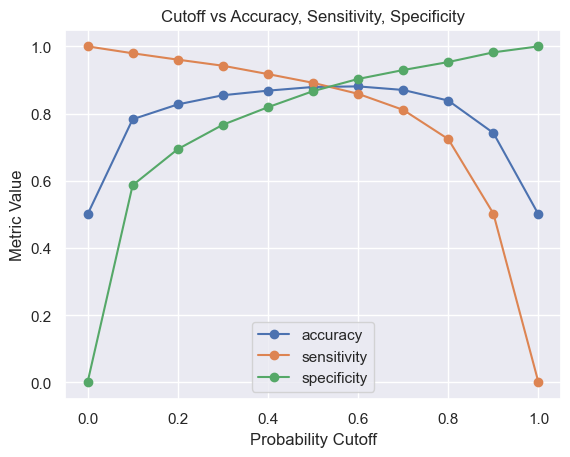

Optimal Cutoff: 0.60
Accuracy: 0.88
Sensitivity: 0.86
Specificity: 0.90


In [213]:
cutoff_df, optimal_cutoff = find_optimal_cutoff2(X_true=X_train_rfe , y_true=y_train , estimator=logreg , data_name="X_train_rfe", dataset_type="Train", start=0.0 , end=1.1 , step=0.1)

### Evaluate Model

In [214]:
# Evaluate Model on Train Set
train_accuracy, train_sensitivity, train_specificity, train_precision, train_recall, train_roc_auc=evaluate_model( X_true=X_train_rfe , y_true=y_train , estimator=logreg , data_name="X_train_rfe", dataset_type="Train" , cut_off=optimal_cutoff)

Evaluating Train Set: data set name - X_train_rfe
Confusion Matrix:
 [[8576  921]
 [1341 8156]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      9497
           1       0.90      0.86      0.88      9497

    accuracy                           0.88     18994
   macro avg       0.88      0.88      0.88     18994
weighted avg       0.88      0.88      0.88     18994

Accuracy: 88.09%
Sensitivity: 85.88%
Specificity: 90.3%
Precision: 89.85%
Recall: 85.88%
ROC AUC Score: 94.49%


### ROC Curve

Evaluating Train Set: data set name - X_train_rfe


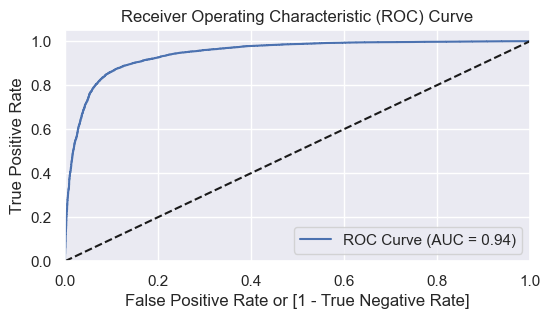

In [215]:
# Calling the function
plot_roc_curve(X_true=X_train_rfe , y_true=y_train , estimator=logreg , data_name="X_train_rfe", dataset_type="Train")

### Evaluate Model

In [216]:
# Evaluate Model on Test Set
test_accuracy, test_sensitivity, test_specificity, test_precision, test_recall, test_roc_auc =evaluate_model(X_true=X_test_rfe , y_true=y_test , estimator=logreg , data_name="X_test_rfe", dataset_type="Test" ,  cut_off=optimal_cutoff)

Evaluating Test Set: data set name - X_test_rfe
Confusion Matrix:
 [[3665  421]
 [ 100  262]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      4086
           1       0.38      0.72      0.50       362

    accuracy                           0.88      4448
   macro avg       0.68      0.81      0.72      4448
weighted avg       0.93      0.88      0.90      4448

Accuracy: 88.29%
Sensitivity: 72.38%
Specificity: 89.7%
Precision: 38.36%
Recall: 72.38%
ROC AUC Score: 88.05%


### Update Evaluation Metrics

In [217]:
# Define the model name and the estimator
model_name = "Logistic Regression with RFE"
estimator = logreg 

# Create a single dictionary to store all metrics
evaluation_metrics = {
    "model_name": model_name,
    "estimator":estimator,
    "train_accuracy": train_accuracy,
    "train_sensitivity": train_sensitivity,
    "train_specificity": train_specificity,
    "train_precision": train_precision,
    "train_recall": train_recall,
    "train_roc_auc": train_roc_auc,
    "test_accuracy": test_accuracy,
    "test_sensitivity": test_sensitivity,
    "test_specificity": test_specificity,
    "test_precision": test_precision,
    "test_recall": test_recall,
    "test_roc_auc": test_roc_auc
}


# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame([evaluation_metrics])

# Concatenate the new DataFrame with the empty model_summary DataFrame
if model_name not in list(model_summary["model_name"]) :
    model_summary = pd.concat([model_summary, metrics_df], axis=0)

# Reset Index
model_summary.reset_index(inplace=True,drop=True)
# Print out the model_summary for verification
model_summary

model_name  train_accuracy  train_sensitivity  \
0  Logistic Regression with RFE         0.88091           0.858798   

   train_specificity  train_precision  train_recall  train_roc_auc  \
0           0.903022         0.898535      0.858798       0.944922   

   test_accuracy  test_sensitivity  test_specificity  test_precision  \
0       0.882869          0.723757          0.896965        0.383602   

   test_recall  test_roc_auc  \
0     0.723757      0.880541   

                                           estimator  
0  LogisticRegression(max_iter=1000, solver='sag'...

### Model with PCA

In [154]:
# Instantiate PCA
pca = PCA(random_state=42)
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [155]:
# Principal components
pca.components_

array([[ 1.01063664e-03,  3.86238890e-02,  7.35151481e-02, ...,
         2.91032208e-04,  2.42579284e-04,  2.29183678e-04],
       [ 2.63464067e-03,  1.16521396e-01,  1.30838170e-01, ...,
        -6.03215721e-04, -8.53962514e-04, -9.51711048e-04],
       [-5.63903147e-03,  7.68723846e-02,  1.54005163e-01, ...,
         1.02455551e-03,  1.05741145e-03,  4.67412912e-04],
       ...,
       [-1.13636897e-07,  1.06124198e-07,  1.79050292e-07, ...,
        -1.10056874e-06, -2.39393644e-07,  9.35834000e-08],
       [ 2.02727708e-07,  2.26543451e-07, -3.63422351e-07, ...,
         6.83036871e-07, -3.10362828e-07, -4.95613098e-08],
       [ 4.59992253e-18, -1.52858837e-16, -9.16489899e-17, ...,
         1.97634802e-16, -3.83217924e-16,  2.49278296e-16]])

In [156]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.1192332  0.22644178 0.28937765 0.32996873 0.36476943 0.39635544
 0.42633843 0.45290755 0.47514701 0.49616509 0.51579648 0.53437795
 0.55234877 0.56952274 0.58580603 0.6015706  0.61627568 0.63065298
 0.64418922 0.65741748 0.66989953 0.68177795 0.69290206 0.70324017
 0.71280856 0.72197442 0.73095003 0.73966835 0.74808265 0.75627256
 0.76401816 0.77148268 0.77892549 0.7861561  0.79313985 0.79983444
 0.80639571 0.81278861 0.8190771  0.82525045 0.83105912 0.83673354
 0.84226682 0.84757074 0.85283405 0.85793634 0.86279056 0.86757144
 0.87217324 0.87668743 0.88092708 0.88507078 0.88908662 0.89306951
 0.89699106 0.90080271 0.90453762 0.90809938 0.91152353 0.91490712
 0.91811657 0.92124767 0.92433628 0.92721825 0.93005498 0.9328314
 0.93556833 0.93826389 0.94086787 0.94338424 0.94586028 0.94827424
 0.95061159 0.95291207 0.95516002 0.95731669 0.95944878 0.9614611
 0.96341985 0.96535251 0.96722776 0.96909789 0.97091605 0.97271709
 0.97444969 0.9760455  0.97760646 0.97904297 0.98041699 0.981744

### Scree Plot

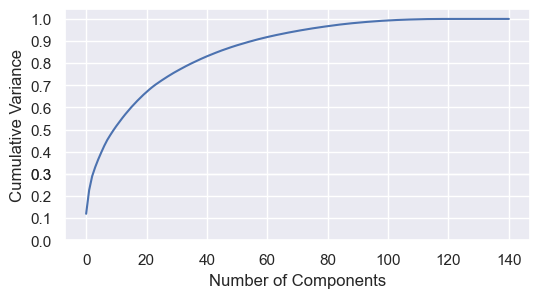

In [157]:
# Plotting scree plot
fig = plt.figure(figsize = (6,3))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.yticks([0,0.1,0.2,0.3,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

In [158]:
# Find the number of components where cumulative variance exceeds 95%
n_components_95 = np.argmax(variance_cumu >= 0.95) + 1

print(f"The number of components that explain at least 95% of the variance is: {n_components_95}")

The number of components that explain at least 95% of the variance is: 73


#### We can see that `73 components` explain amost more than 95% variance of the data. So, we will perform PCA with 60 components.

### So will perform PCA with 95% variance

In [159]:
# Instantiate PCA with 95% variance
pca_final = IncrementalPCA(n_components=n_components_95)
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)
# Applying transformation on the test set
X_test_pca = pca_final.transform(X_test)

# Print the shape of the transformed training and testing datasets
# X_train and X_test are now scaled; their shapes remain unchanged
print(f"Shape of X_train: {X_train_pca.shape}, X_test: {X_test_pca.shape}")
print(f"Shape of y_train: {y_train.shape}, y_test: {y_test.shape}")

Shape of X_train: (18994, 73), X_test: (4448, 73)
Shape of y_train: (18994,), y_test: (4448,)


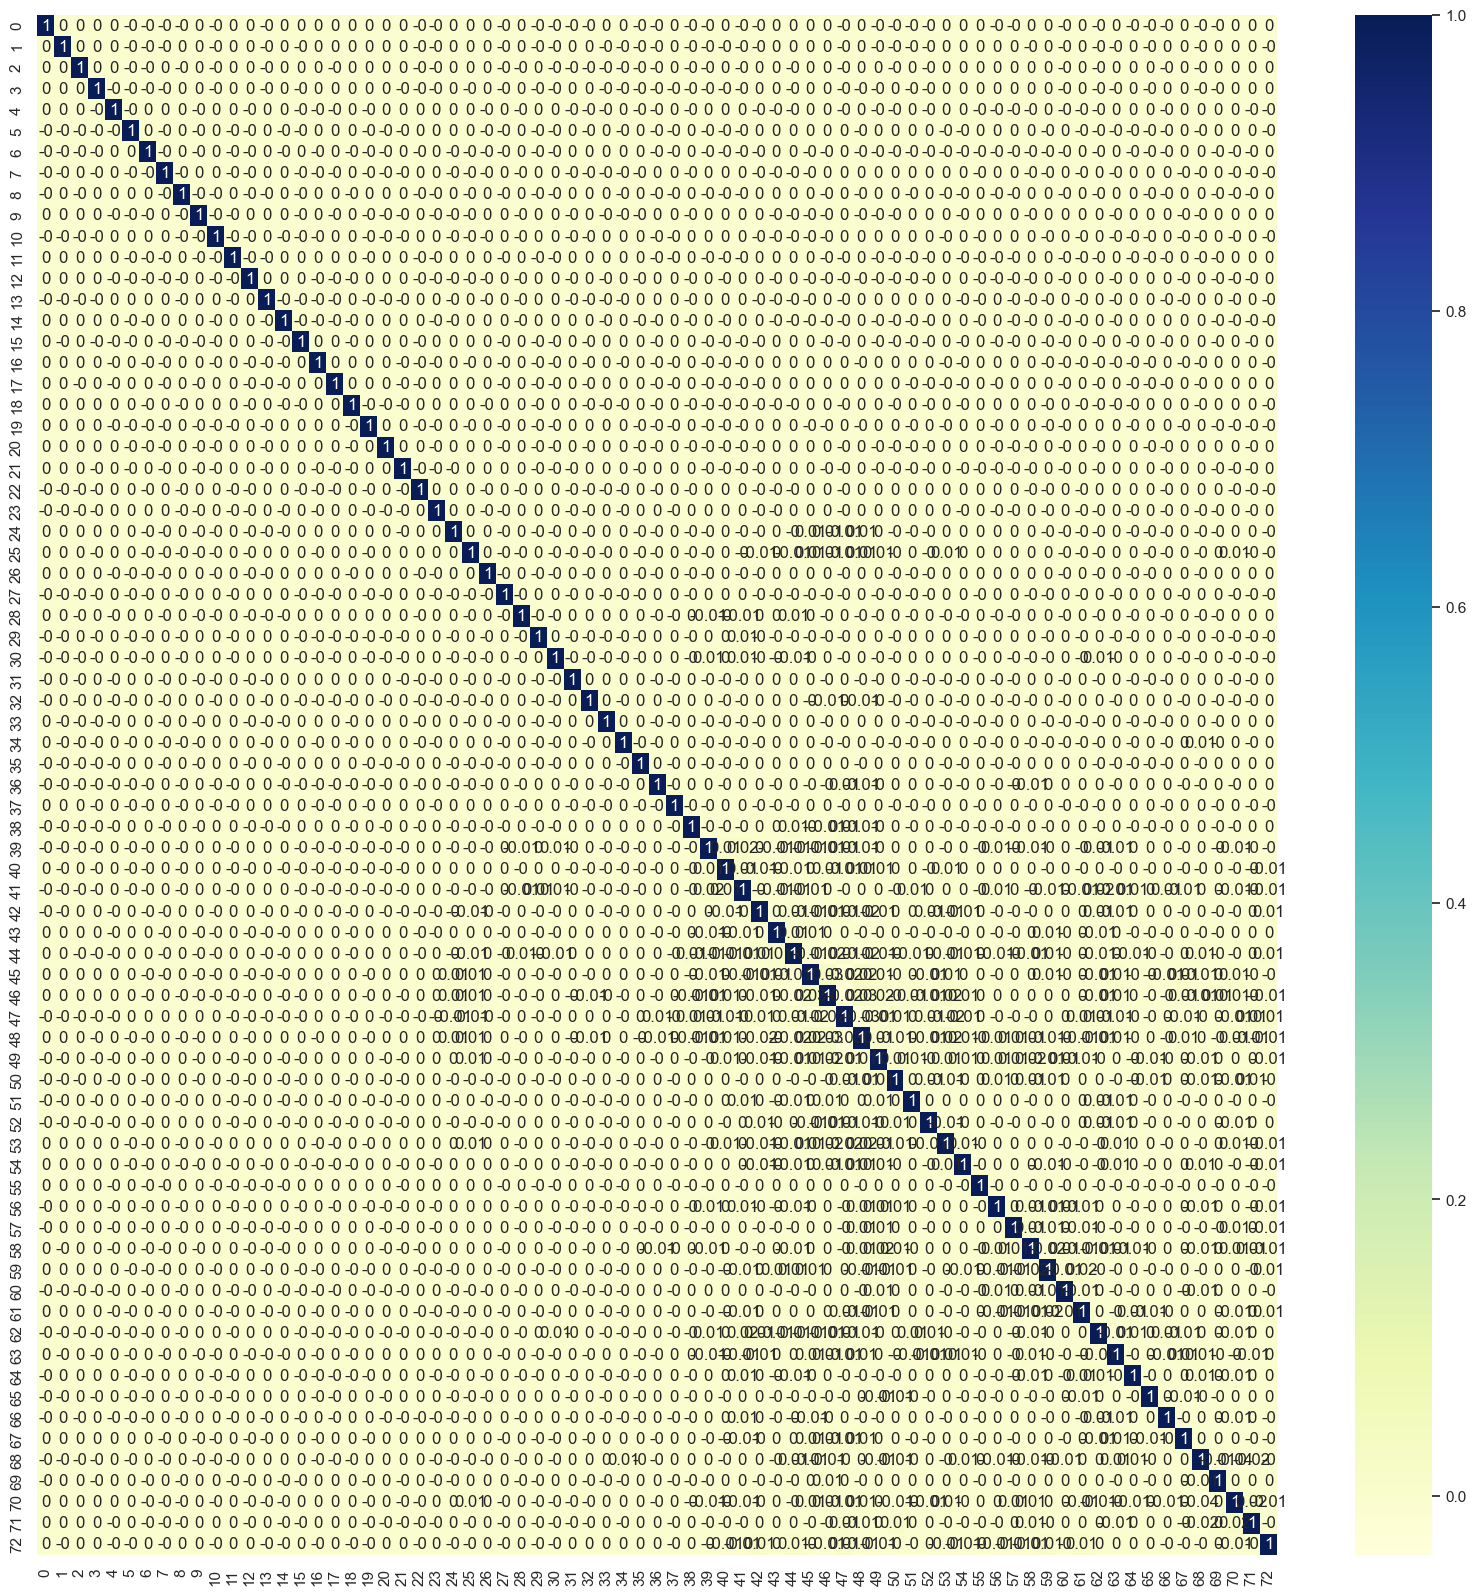

In [160]:
# Validate corr matrix
## Checking for multi-collinearity with HeatMap
corr = np.round(np.corrcoef(X_train_pca.transpose()),2)
plt.figure(figsize = (20,20))
sns.heatmap(corr, annot= True, cmap="YlGnBu")
plt.show()

### Model with TSNE

In [161]:
# Log Start Time
start_time=time.time()
print("Execution Start Time : " , datetime.now())

# Apply t-SNE to the PCA-reduced data
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_pca)

# Optionally, apply t-SNE on the test set (not common)
X_test_tsne = tsne.fit_transform(X_test_pca)

# Log End time
end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution Start Time :  2024-09-11 15:11:56.797027
Execution End Time :  2024-09-11 15:16:49.192361
Execution time: 292.39533400535583 seconds


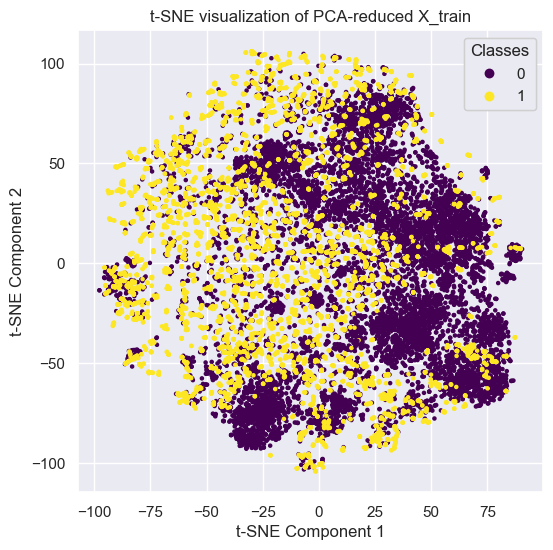

In [162]:
# Plotting the t-SNE results
fig, ax = plt.subplots(figsize=(6, 6))
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', s=5)
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE visualization of PCA-reduced X_train')
plt.show()

## Logistic Regression with PCA

In [163]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Specify parameter grid
params = {
    "C": [0.001,0.01, 0.1, 1, 10, 100, 1000],
    "solver": ['liblinear', 'saga']
}

# Specify multiple scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision',
    'f1': 'f1'
}

# Instantiate Logistic Regression
lr=LogisticRegression(random_state=42)

# Create GridSearchCV object with multiple scoring metrics
lr_model_cv = GridSearchCV(estimator=lr,
                        param_grid=params, 
                        scoring=scoring,  # Multiple scores
                        refit='accuracy', # Choose the main score for refitting
                        cv=folds,
                        n_jobs = -1,
                        verbose=3,
                        return_train_score=True)

In [164]:
# Log Start Time
start_time=time.time()
print("Execution Start Time : " , datetime.now())

# Fit the model
lr_model_cv.fit(X_train_pca, y_train)

# Log End time
end_time = time.time()
print("Execution End Time : " , datetime.now())

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution Start Time :  2024-09-11 15:16:50.865902
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Execution End Time :  2024-09-11 15:17:18.550389
Execution time: 27.684487104415894 seconds


In [165]:
# results of grid search CV
cv_results = pd.DataFrame(lr_model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.231093      0.006427         0.031847        0.000301   0.001   
1        1.069250      0.159893         0.028178        0.006278   0.001   
2        0.315500      0.011562         0.021872        0.007653    0.01   
3        2.553508      0.356487         0.015216        0.000827    0.01   
4        0.332949      0.016405         0.021874        0.007656     0.1   
5        2.860080      0.292232         0.028313        0.011834     0.1   
6        0.344977      0.011028         0.018747        0.006248       1   
7        4.514694      0.193384         0.043411        0.008881       1   
8        0.540871      0.116138         0.030607        0.008905      10   
9        5.766234      0.349080         0.037107        0.008307      10   
10       0.620501      0.071278         0.034670        0.014953     100   
11       5.490460      0.201127         0.033509        0.004527     100   
12       0.633015      0.026020         0.034298        0.006293    1000   
13       4.863938      0.173642         0.028162        0.006271    1000   

   param_solver                               params  split0_test_accuracy  \
0     liblinear  {'C': 0.001, 'solver': 'liblinear'}              0.859437   
1          saga       {'C': 0.001, 'solver': 'saga'}              0.861806   
2     liblinear   {'C': 0.01, 'solver': 'liblinear'}              0.861279   
3          saga        {'C': 0.01, 'solver': 'saga'}              0.861806   
4     liblinear    {'C': 0.1, 'solver': 'liblinear'}              0.863385   
5          saga         {'C': 0.1, 'solver': 'saga'}              0.862859   
6     liblinear      {'C': 1, 'solver': 'liblinear'}              0.863385   
7          saga           {'C': 1, 'solver': 'saga'}              0.863122   
8     liblinear     {'C': 10, 'solver': 'liblinear'}              0.863385   
9          saga          {'C': 10, 'solver': 'saga'}              0.863385   
10    liblinear    {'C': 100, 'solver': 'liblinear'}              0.863385   
11         saga         {'C': 100, 'solver': 'saga'}              0.863385   
12    liblinear   {'C': 1000, 'solver': 'liblinear'}              0.863385   
13         saga        {'C': 1000, 'solver': 'saga'}              0.863385   

    split1_test_accuracy  split2_test_accuracy  ...  mean_test_f1  \
0               0.852330              0.862332  ...      0.863673   
1               0.855752              0.865228  ...      0.864219   
2               0.861016              0.867334  ...      0.867448   
3               0.861543              0.869703  ...      0.867603   
4               0.863385              0.868650  ...      0.867669   
5               0.864175              0.868650  ...      0.867978   
6               0.863648              0.868123  ...      0.867923   
7               0.863912              0.868123  ...      0.867714   
8               0.863912              0.868123  ...      0.867967   
9               0.863912              0.868123  ...      0.867759   
10              0.863912              0.868123  ...      0.867967   
11              0.863912              0.868123  ...      0.867759   
12              0.863912              0.868123  ...      0.867967   
13              0.863912              0.868123  ...      0.867759   

    std_test_f1  rank_test_f1  split0_train_f1  split1_train_f1  \
0      0.002518            14         0.865248         0.865511   
1      0.002267            13         0.865335         0.864500   
2      0.002587            12         0.869453         0.870393   
3      0.002602            11         0.869453         0.870664   
4      0.002159            10         0.869464         0.870333   
5      0.002253             1         0.869447         0.870244   
6      0.001643             5         0.869672         0.869969   
7      0.001874             9         0.869576         0.870059   
8      0.001629             2         0.869672       

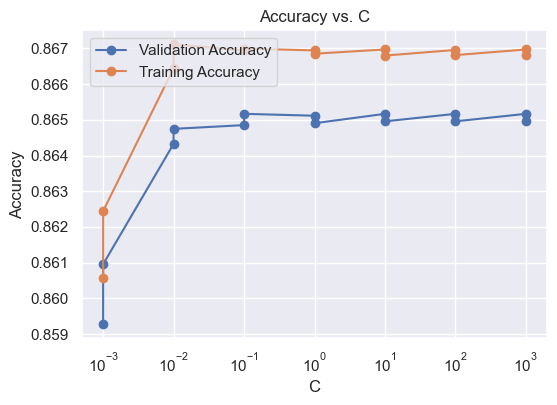

In [166]:
# plot of C versus train and validation scores

plt.figure(figsize=(6, 4))
plt.plot(cv_results['param_C'], cv_results['mean_test_accuracy'], marker='o', label='Validation Accuracy')
plt.plot(cv_results['param_C'], cv_results['mean_train_accuracy'], marker='o', label='Training Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.xscale('log')
plt.title('Accuracy vs. C')
plt.show()

In [167]:
# Best score with best C
best_score = round( lr_model_cv.best_score_ , 2)
best_C = lr_model_cv.best_params_['C']

print(" The highest accuracy is {0} at C = {1}".format(best_score, best_C))

# Get the best model
best_model = lr_model_cv.best_estimator_

 The highest accuracy is 0.87 at C = 0.1


#### Logistic regression with optimal C

In [168]:
lr_model_cv.best_estimator_

LogisticRegression(C=0.1, random_state=42, solver='saga')

In [218]:
# Instantiate the model with best C
# Get the best model
lr_best=lr_model_cv.best_estimator_
# Fit the model on the train set
lr_best_fit = lr_best.fit(X_train_pca, y_train)

### Find a cut off for optimal result

Evaluating Train Set: data set name - X_train_pca
    probability  accuracy  sensitivity  specificity
0           0.0  0.500000     1.000000     0.000000
1           0.1  0.765505     0.983153     0.547857
2           0.2  0.815468     0.965568     0.665368
3           0.3  0.846373     0.945772     0.746973
4           0.4  0.859219     0.919975     0.798463
5           0.5  0.866695     0.887543     0.845846
6           0.6  0.868116     0.850269     0.885964
7           0.7  0.856112     0.793408     0.918816
8           0.8  0.819469     0.693693     0.945246
9           0.9  0.709013     0.444456     0.973571
10          1.0  0.500000     0.000000     1.000000


<Figure size 800x600 with 0 Axes>

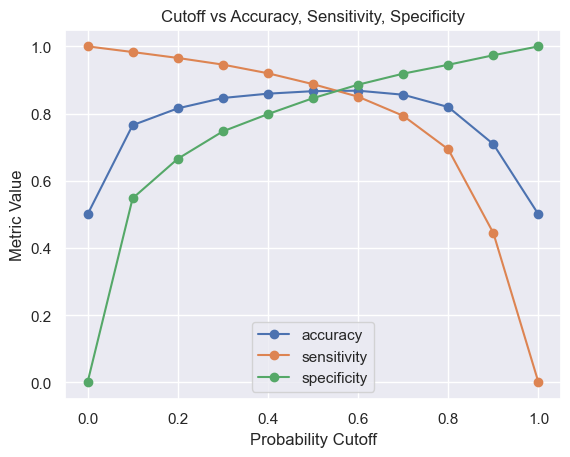

Optimal Cutoff: 0.60
Accuracy: 0.87
Sensitivity: 0.85
Specificity: 0.89


In [219]:
cutoff_df, optimal_cutoff = find_optimal_cutoff2(X_true=X_train_pca , y_true=y_train , estimator=lr_best_fit , data_name="X_train_pca", dataset_type="Train", start=0.0 , end=1.1 , step=0.1)

### Evaluate Model

In [220]:
# Evaluate Model on Train Set
train_accuracy, train_sensitivity, train_specificity, train_precision, train_recall, train_roc_auc=evaluate_model( X_true=X_train_pca , y_true=y_train , estimator=lr_best_fit , data_name="X_train_pca", dataset_type="Train" , cut_off=optimal_cutoff)

Evaluating Train Set: data set name - X_train_pca
Confusion Matrix:
 [[8414 1083]
 [1422 8075]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      9497
           1       0.88      0.85      0.87      9497

    accuracy                           0.87     18994
   macro avg       0.87      0.87      0.87     18994
weighted avg       0.87      0.87      0.87     18994

Accuracy: 86.81%
Sensitivity: 85.03%
Specificity: 88.6%
Precision: 88.17%
Recall: 85.03%
ROC AUC Score: 93.3%


### ROC Curve

Evaluating Train Set: data set name - X_train_pca


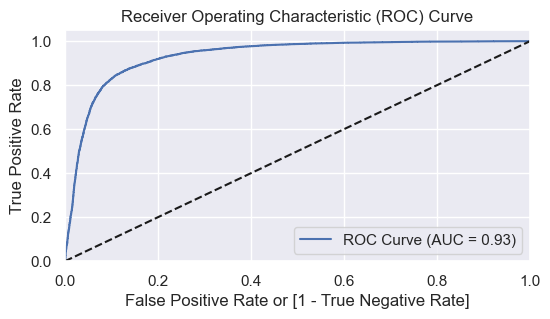

In [221]:
# Calling the function
plot_roc_curve(X_true=X_train_pca , y_true=y_train , estimator=lr_best_fit , data_name="X_train_pca", dataset_type="Train")

### Evaluate Model

In [222]:
# Evaluate Model on Test Set
test_accuracy, test_sensitivity, test_specificity, test_precision, test_recall, test_roc_auc =evaluate_model(X_true=X_test_pca , y_true=y_test , estimator=lr_best_fit , data_name="X_test_pca", dataset_type="Test" ,  cut_off=optimal_cutoff)

Evaluating Test Set: data set name - X_test_pca
Confusion Matrix:
 [[3587  499]
 [  96  266]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      4086
           1       0.35      0.73      0.47       362

    accuracy                           0.87      4448
   macro avg       0.66      0.81      0.70      4448
weighted avg       0.92      0.87      0.89      4448

Accuracy: 86.62%
Sensitivity: 73.48%
Specificity: 87.79%
Precision: 34.77%
Recall: 73.48%
ROC AUC Score: 86.95%


### Update Evaluation Metrics

In [223]:
# Define the model name and the estimator
model_name = "Logistic Regression with PCA"
estimator = lr_best_fit 

# Create a single dictionary to store all metrics
evaluation_metrics = {
    "model_name": model_name,
    "estimator":estimator,
    "train_accuracy": train_accuracy,
    "train_sensitivity": train_sensitivity,
    "train_specificity": train_specificity,
    "train_precision": train_precision,
    "train_recall": train_recall,
    "train_roc_auc": train_roc_auc,
    "test_accuracy": test_accuracy,
    "test_sensitivity": test_sensitivity,
    "test_specificity": test_specificity,
    "test_precision": test_precision,
    "test_recall": test_recall,
    "test_roc_auc": test_roc_auc
}


# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame([evaluation_metrics])

# Concatenate the new DataFrame with the empty model_summary DataFrame
if model_name not in list(model_summary["model_name"]) :
    model_summary = pd.concat([model_summary, metrics_df], axis=0)

# Reset Index
model_summary.reset_index(inplace=True,drop=True)
# Print out the model_summary for verification
model_summary

model_name  train_accuracy  train_sensitivity  \
0  Logistic Regression with RFE        0.880910           0.858798   
1  Logistic Regression with PCA        0.868116           0.850269   

   train_specificity  train_precision  train_recall  train_roc_auc  \
0           0.903022         0.898535      0.858798       0.944922   
1           0.885964         0.881743      0.850269       0.933026   

   test_accuracy  test_sensitivity  test_specificity  test_precision  \
0       0.882869          0.723757          0.896965        0.383602   
1       0.866232          0.734807          0.877876        0.347712   

   test_recall  test_roc_auc  \
0     0.723757      0.880541   
1     0.734807      0.869525   

                                           estimator  
0  LogisticRegression(max_iter=1000, solver='sag'...  
1  LogisticRegression(C=0.1, random_state=42, sol...

## Decision  Tree Classifier

In [175]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}
# Specify multiple scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision',
    'f1': 'f1'
}
# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=42)

dtree_model_cv = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring=scoring,  # Multiple scores
                           refit='accuracy', # Choose the main score for refitting
                           cv = folds,
                           n_jobs = -1,
                           verbose = 2)

In [176]:
# Log Start Time
start_time=time.time()
print("Execution Start Time : " , datetime.now())

# Fit the model
dtree_model_cv.fit(X_train_pca, y_train)

# Log End time
end_time = time.time()
print("Execution End Time : " , datetime.now())

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution Start Time :  2024-09-11 15:17:26.114079
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Execution End Time :  2024-09-11 15:17:48.176458
Execution time: 22.062378406524658 seconds


In [177]:
# results of grid search CV
cv_results = pd.DataFrame(dtree_model_cv.cv_results_)

In [178]:
# Best score with best C
best_score = round( dtree_model_cv.best_score_ , 2)
print("Best accuracy:-", dtree_model_cv.best_score_)

Best accuracy:- 0.821522306873528


In [179]:
dtree_model_cv.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

#### Model with optimal hyperparameters

In [180]:
# Log Start Time
start_time=time.time()
print("Execution Start Time : " , datetime.now())

# Get the best model
dt_best=dtree_model_cv.best_estimator_

# Fit the model on the train set
dt_best.fit(X_train_pca, y_train)

# Log End time
end_time = time.time()
print("Execution End Time : " , datetime.now())

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

# Check class order
print(f'Class order: {dt_best.classes_}')

Execution Start Time :  2024-09-11 15:17:48.229516
Execution End Time :  2024-09-11 15:17:51.673848
Execution time: 3.4443323612213135 seconds
Class order: [0 1]


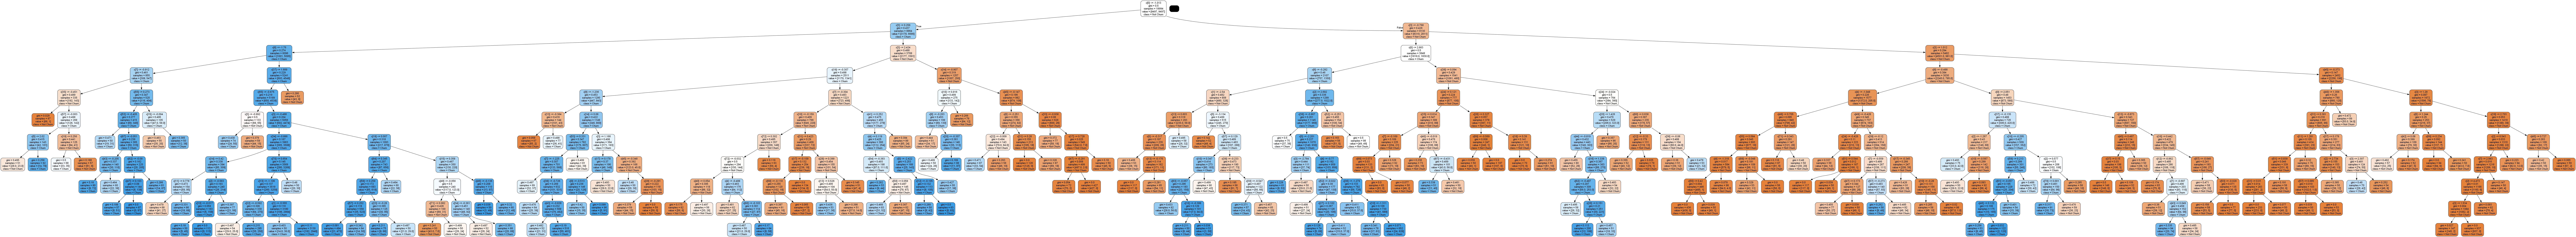

In [181]:
# Plot Decision Tree
gph = get_dt_graph(dt_best)
Image(gph.create_png())

### Find a cut off for optimal result

Evaluating Train Set: data set name - X_train_pca
    probability  accuracy  sensitivity  specificity
0           0.0  0.500000     1.000000     0.000000
1           0.1  0.770191     0.990734     0.549647
2           0.2  0.806939     0.975992     0.637886
3           0.3  0.841582     0.944088     0.739075
4           0.4  0.852585     0.915973     0.789197
5           0.5  0.858482     0.869327     0.847636
6           0.6  0.852796     0.809835     0.895757
7           0.7  0.840055     0.753817     0.926293
8           0.8  0.816837     0.685690     0.947984
9           0.9  0.751764     0.532168     0.971359
10          1.0  0.513846     0.027693     1.000000


<Figure size 800x600 with 0 Axes>

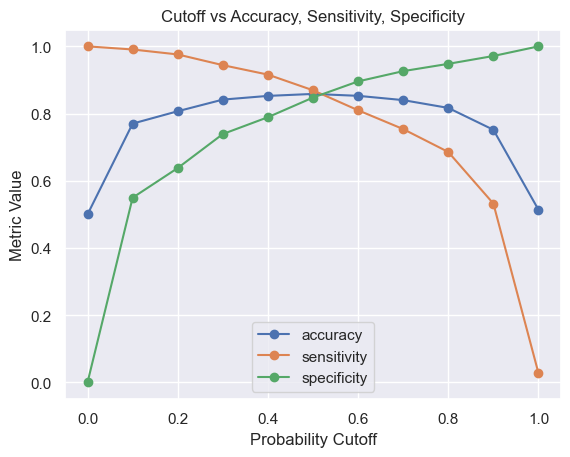

Optimal Cutoff: 0.50
Accuracy: 0.86
Sensitivity: 0.87
Specificity: 0.85


In [224]:
cutoff_df, optimal_cutoff = find_optimal_cutoff2(X_true=X_train_pca , y_true=y_train , estimator=dt_best , data_name="X_train_pca", dataset_type="Train", start=0.0 , end=1.1 , step=0.1)

### Evaluate Model

In [225]:
# Evaluate Model on Train Set
train_accuracy, train_sensitivity, train_specificity, train_precision, train_recall, train_roc_auc=evaluate_model( X_true=X_train_pca , y_true=y_train , estimator=dt_best , data_name="X_train_pca", dataset_type="Train",  cut_off=optimal_cutoff)

Evaluating Train Set: data set name - X_train_pca
Confusion Matrix:
 [[8099 1398]
 [1290 8207]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      9497
           1       0.85      0.86      0.86      9497

    accuracy                           0.86     18994
   macro avg       0.86      0.86      0.86     18994
weighted avg       0.86      0.86      0.86     18994

Accuracy: 85.85%
Sensitivity: 86.42%
Specificity: 85.28%
Precision: 85.45%
Recall: 86.42%
ROC AUC Score: 93.57%


### ROC Curve

Evaluating Train Set: data set name - X_train_pca


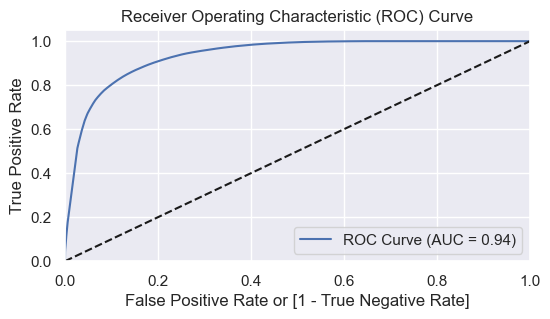

In [226]:
# Calling the function
plot_roc_curve(X_true=X_train_pca , y_true=y_train , estimator=dt_best , data_name="X_train_pca", dataset_type="Train")

### Evaluate Model

In [227]:
# Evaluate Model on Test Set
test_accuracy, test_sensitivity, test_specificity, test_precision, test_recall, test_roc_auc =evaluate_model(X_true=X_test_pca , y_true=y_test , estimator=dt_best , data_name="X_test_pca", dataset_type="Test",  cut_off=optimal_cutoff)

Evaluating Test Set: data set name - X_test_pca
Confusion Matrix:
 [[3296  790]
 [ 133  229]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      4086
           1       0.22      0.63      0.33       362

    accuracy                           0.79      4448
   macro avg       0.59      0.72      0.60      4448
weighted avg       0.90      0.79      0.83      4448

Accuracy: 79.25%
Sensitivity: 63.26%
Specificity: 80.67%
Precision: 22.47%
Recall: 63.26%
ROC AUC Score: 78.47%


In [228]:
# Define the model name and the estimator
model_name = "Decision Tree Classifier with PCA"
estimator = dt_best 

# Create a single dictionary to store all metrics
evaluation_metrics = {
    "model_name": model_name,
    "estimator":estimator,
    "train_accuracy": train_accuracy,
    "train_sensitivity": train_sensitivity,
    "train_specificity": train_specificity,
    "train_precision": train_precision,
    "train_recall": train_recall,
    "train_roc_auc": train_roc_auc,
    "test_accuracy": test_accuracy,
    "test_sensitivity": test_sensitivity,
    "test_specificity": test_specificity,
    "test_precision": test_precision,
    "test_recall": test_recall,
    "test_roc_auc": test_roc_auc
}


# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame([evaluation_metrics])

# Concatenate the new DataFrame with the empty model_summary DataFrame
if model_name not in list(model_summary["model_name"]) :
    model_summary = pd.concat([model_summary, metrics_df], axis=0)

# Reset Index
model_summary.reset_index(inplace=True,drop=True)
# Print out the model_summary for verification
model_summary

model_name  train_accuracy  train_sensitivity  \
0       Logistic Regression with RFE        0.880910           0.858798   
1       Logistic Regression with PCA        0.868116           0.850269   
2  Decision Tree Classifier with PCA        0.858482           0.864168   

   train_specificity  train_precision  train_recall  train_roc_auc  \
0           0.903022         0.898535      0.858798       0.944922   
1           0.885964         0.881743      0.850269       0.933026   
2           0.852796         0.854451      0.864168       0.935660   

   test_accuracy  test_sensitivity  test_specificity  test_precision  \
0       0.882869          0.723757          0.896965        0.383602   
1       0.866232          0.734807          0.877876        0.347712   
2       0.792491          0.632597          0.806657        0.224730   

   test_recall  test_roc_auc  \
0     0.723757      0.880541   
1     0.734807      0.869525   
2     0.632597      0.784712   

                                           estimator  
0  LogisticRegression(max_iter=1000, solver='sag'...  
1  LogisticRegression(C=0.1, random_state=42, sol...  
2  DecisionTreeClassifier(max_depth=10, min_sampl...

## Random Forest Classifier

In [187]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=3, shuffle=True, random_state=42)
# Create the parameter grid 
param_grid = {
    'max_depth': range(5,15,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200], 
    'max_features': [10, 20]
}
### param_grid = {
###     'max_depth': [5, 10, 15],
###     'min_samples_leaf': [50, 100, 150],
###     'min_samples_split': [50, 100, 150],
###     'n_estimators': [100, 200, 300, 400],
###     'max_features': [10, 15, 20]
### }


# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
rf_model_cv = GridSearchCV(estimator = rf, 
                           param_grid = param_grid,
                           scoring=scoring,  # Multiple scores
                           refit='accuracy', # Choose the main score for refitting
                           cv = folds,
                           n_jobs = -1,
                           verbose = 2, 
                           return_train_score=True)

In [188]:
# Log Start Time
start_time=time.time()
print("Execution Start Time : " , datetime.now())

# Fit the model
rf_model_cv.fit(X_train_pca, y_train)

# Log End time
end_time = time.time()
print("Execution End Time : " , datetime.now())

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution Start Time :  2024-09-11 15:18:01.036027
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Execution End Time :  2024-09-11 15:42:45.878266
Execution time: 1484.8422396183014 seconds


In [189]:
# results of grid search CV
cv_results = pd.DataFrame(rf_model_cv.cv_results_)

In [190]:
# Best score with best C
best_score = round( rf_model_cv.best_score_ , 2)
print("Best accuracy :-", rf_model_cv.best_score_)

Best accuracy :- 0.8712751304891097


#### Model with optimal hyperparameters

In [191]:
# Log Start Time
start_time=time.time()
print("Execution Start Time : " , datetime.now())

# Get the best model
rf_best=rf_model_cv.best_estimator_
# Fit the model on the train set
rf_best.fit(X_train_pca, y_train)

# Log End time
end_time = time.time()
print("Execution End Time : " , datetime.now())

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution Start Time :  2024-09-11 15:42:45.923546
Execution End Time :  2024-09-11 15:43:54.376065
Execution time: 68.45251893997192 seconds


In [229]:
rf_best

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200, random_state=42)

In [230]:
# Check class order
print(f'Class order: {rf_best.classes_}')

Class order: [0 1]


### Find a cut off for optimal result

Evaluating Train Set: data set name - X_train_pca
    probability  accuracy  sensitivity  specificity
0           0.0  0.500000     1.000000     0.000000
1           0.1  0.537643     1.000000     0.075287
2           0.2  0.705749     0.999789     0.411709
3           0.3  0.832315     0.992945     0.671686
4           0.4  0.890966     0.968516     0.813415
5           0.5  0.901758     0.911762     0.891755
6           0.6  0.877224     0.813204     0.941245
7           0.7  0.810835     0.650416     0.971254
8           0.8  0.694009     0.398968     0.989049
9           0.9  0.506423     0.012951     0.999895
10          1.0  0.500000     0.000000     1.000000


<Figure size 800x600 with 0 Axes>

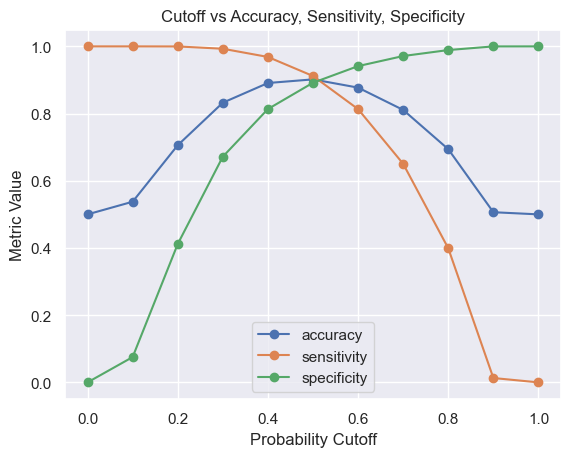

Optimal Cutoff: 0.50
Accuracy: 0.90
Sensitivity: 0.91
Specificity: 0.89


In [231]:
cutoff_df, optimal_cutoff = find_optimal_cutoff2(X_true=X_train_pca , y_true=y_train , estimator=rf_best , data_name="X_train_pca", dataset_type="Train", start=0.0 , end=1.1 , step=0.1)

### Evaluate Model

In [232]:
# Evaluate Model on Train Set
train_accuracy, train_sensitivity, train_specificity, train_precision, train_recall, train_roc_auc=evaluate_model( X_true=X_train_pca , y_true=y_train , estimator=rf_best , data_name="X_train_pca", dataset_type="Train" ,  cut_off=optimal_cutoff)

Evaluating Train Set: data set name - X_train_pca
Confusion Matrix:
 [[8469 1028]
 [ 838 8659]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      9497
           1       0.89      0.91      0.90      9497

    accuracy                           0.90     18994
   macro avg       0.90      0.90      0.90     18994
weighted avg       0.90      0.90      0.90     18994

Accuracy: 90.18%
Sensitivity: 91.18%
Specificity: 89.18%
Precision: 89.39%
Recall: 91.18%
ROC AUC Score: 96.23%


### ROC Curve

Evaluating Train Set: data set name - X_train_pca


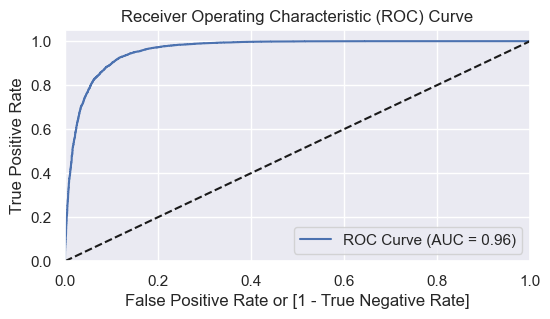

In [233]:
# Calling the function
plot_roc_curve(X_true=X_train_pca , y_true=y_train , estimator=rf_best , data_name="X_train_pca", dataset_type="Train")

### Evaluate Model

In [234]:
# Evaluate Model on Test Set
test_accuracy, test_sensitivity, test_specificity, test_precision, test_recall, test_roc_auc =evaluate_model(X_true=X_test_pca , y_true=y_test , estimator=rf_best , data_name="X_test_pca", dataset_type="Test" ,  cut_off=optimal_cutoff)

Evaluating Test Set: data set name - X_test_pca
Confusion Matrix:
 [[3537  549]
 [ 119  243]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.91      4086
           1       0.31      0.67      0.42       362

    accuracy                           0.85      4448
   macro avg       0.64      0.77      0.67      4448
weighted avg       0.91      0.85      0.87      4448

Accuracy: 84.98%
Sensitivity: 67.13%
Specificity: 86.56%
Precision: 30.68%
Recall: 67.13%
ROC AUC Score: 84.63%


#### Update Evaluation Metrics

In [235]:
# Define the model name and the estimator
model_name = "Random Forest Classifier with PCA"
estimator = rf_best 

# Create a single dictionary to store all metrics
evaluation_metrics = {
    "model_name": model_name,
    "estimator":estimator,
    "train_accuracy": train_accuracy,
    "train_sensitivity": train_sensitivity,
    "train_specificity": train_specificity,
    "train_precision": train_precision,
    "train_recall": train_recall,
    "train_roc_auc": train_roc_auc,
    "test_accuracy": test_accuracy,
    "test_sensitivity": test_sensitivity,
    "test_specificity": test_specificity,
    "test_precision": test_precision,
    "test_recall": test_recall,
    "test_roc_auc": test_roc_auc
}


# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame([evaluation_metrics])

# Concatenate the new DataFrame with the empty model_summary DataFrame
if model_name not in list(model_summary["model_name"]) :
    model_summary = pd.concat([model_summary, metrics_df], axis=0)

# Reset Index
model_summary.reset_index(inplace=True,drop=True)
# Print out the model_summary for verification
model_summary

model_name  train_accuracy  train_sensitivity  \
0       Logistic Regression with RFE        0.880910           0.858798   
1       Logistic Regression with PCA        0.868116           0.850269   
2  Decision Tree Classifier with PCA        0.858482           0.864168   
3  Random Forest Classifier with PCA        0.901758           0.911762   

   train_specificity  train_precision  train_recall  train_roc_auc  \
0           0.903022         0.898535      0.858798       0.944922   
1           0.885964         0.881743      0.850269       0.933026   
2           0.852796         0.854451      0.864168       0.935660   
3           0.891755         0.893878      0.911762       0.962283   

   test_accuracy  test_sensitivity  test_specificity  test_precision  \
0       0.882869          0.723757          0.896965        0.383602   
1       0.866232          0.734807          0.877876        0.347712   
2       0.792491          0.632597          0.806657        0.224730   
3       0.849820          0.671271          0.865639        0.306818   

   test_recall  test_roc_auc  \
0     0.723757      0.880541   
1     0.734807      0.869525   
2     0.632597      0.784712   
3     0.671271      0.846285   

                                           estimator  
0  LogisticRegression(max_iter=1000, solver='sag'...  
1  LogisticRegression(C=0.1, random_state=42, sol...  
2  DecisionTreeClassifier(max_depth=10, min_sampl...  
3  (DecisionTreeClassifier(max_depth=10, max_feat...

### AdaBoost Classifier with PCA

In [246]:
imputer = SimpleImputer(strategy='constant', fill_value=0)

In [247]:
# Create a pipeline
pipe = make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    AdaBoostClassifier(n_estimators=200, random_state=42)
)

In [ ]:
# Log Start Time
start_time=time.time()
print("Execution Start Time : " , datetime.now())

# Get the best model
adaboost_model = pipe.fit(X_train, y_train)

# Log End time
end_time = time.time()
print("Execution End Time : " , datetime.now())

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

In [ ]:
adaboost_model

### Find a cut off for optimal result

Evaluating Train Set: data set name - X_train_pca
    probability  accuracy  sensitivity  specificity
0           0.0  0.500000     1.000000     0.000000
1           0.1  0.548934     1.000000     0.097867
2           0.2  0.714529     0.998442     0.430616
3           0.3  0.830412     0.991528     0.669296
4           0.4  0.884507     0.962703     0.806310
5           0.5  0.894488     0.903399     0.885578
6           0.6  0.874331     0.811861     0.936800
7           0.7  0.815902     0.662090     0.969715
8           0.8  0.697390     0.403934     0.990846
9           0.9  0.514851     0.030188     0.999513
10          1.0  0.500000     0.000000     1.000000


<Figure size 800x600 with 0 Axes>

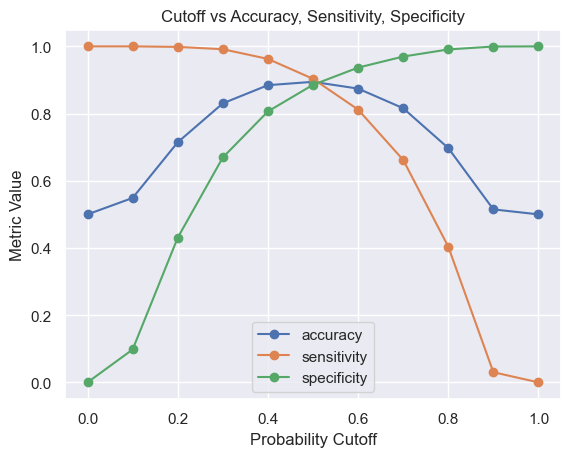

Optimal Cutoff: 0.50
Accuracy: 0.89
Sensitivity: 0.90
Specificity: 0.89


In [278]:
cutoff_df, optimal_cutoff = find_optimal_cutoff2(X_true=X_train , y_true=y_train , estimator=adaboost_model , data_name="X_train", dataset_type="Train", start=0.0 , end=1.1 , step=0.1)

### Evaluate Model

In [279]:
# Evaluate Model on Train Set
train_accuracy, train_sensitivity, train_specificity, train_precision, train_recall, train_roc_auc=evaluate_model( X_true=X_train , y_true=y_train , estimator=adaboost_model , data_name="X_train", dataset_type="Train" ,  cut_off=optimal_cutoff)

Evaluating Train Set: data set name - X_train_pca
Confusion Matrix:
 [[9094 1175]
 [ 992 9277]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89     10269
           1       0.89      0.90      0.90     10269

    accuracy                           0.89     20538
   macro avg       0.89      0.89      0.89     20538
weighted avg       0.89      0.89      0.89     20538

Accuracy: 89.45%
Sensitivity: 90.34%
Specificity: 88.56%
Precision: 88.76%
Recall: 90.34%
ROC AUC Score: 96.01%


### ROC Curve

Evaluating Train Set: data set name - X_train_pca


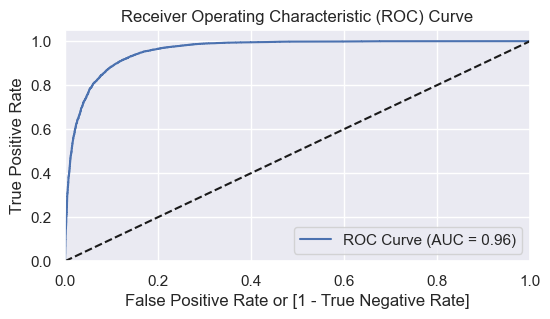

In [280]:
# Calling the function
plot_roc_curve(X_true=X_train , y_true=y_train , estimator=adaboost_model , data_name="X_train", dataset_type="Train")

### Evaluate Model

In [281]:
# Evaluate Model on Test Set
test_accuracy, test_sensitivity, test_specificity, test_precision, test_recall, test_roc_auc =evaluate_model(X_true=X_test , y_true=y_test , estimator=adaboost_model , data_name="X_test", dataset_type="Test" ,  cut_off=optimal_cutoff)

Evaluating Test Set: data set name - X_test_pca
Confusion Matrix:
 [[3843  587]
 [ 138  240]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.91      4430
           1       0.29      0.63      0.40       378

    accuracy                           0.85      4808
   macro avg       0.63      0.75      0.66      4808
weighted avg       0.91      0.85      0.87      4808

Accuracy: 84.92%
Sensitivity: 63.49%
Specificity: 86.75%
Precision: 29.02%
Recall: 63.49%
ROC AUC Score: 84.99%


#### Update Evaluation Metrics

In [271]:
# Define the model name and the estimator
model_name = "Adaboost Classifier with PCA"
estimator = adaboost_model 

# Create a single dictionary to store all metrics
evaluation_metrics = {
    "model_name": model_name,
    "estimator":estimator,
    "train_accuracy": train_accuracy,
    "train_sensitivity": train_sensitivity,
    "train_specificity": train_specificity,
    "train_precision": train_precision,
    "train_recall": train_recall,
    "train_roc_auc": train_roc_auc,
    "test_accuracy": test_accuracy,
    "test_sensitivity": test_sensitivity,
    "test_specificity": test_specificity,
    "test_precision": test_precision,
    "test_recall": test_recall,
    "test_roc_auc": test_roc_auc
}


# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame([evaluation_metrics])

# Concatenate the new DataFrame with the empty model_summary DataFrame
if model_name not in list(model_summary["model_name"]) :
    model_summary = pd.concat([model_summary, metrics_df], axis=0)

# Reset Index
model_summary.reset_index(inplace=True,drop=True)
# Print out the model_summary for verification
model_summary

model_name  train_accuracy  train_sensitivity  \
0       Logistic Regression RFE        0.907927           0.878274   
1  Logistic Regression with PCA        0.865712           0.889863   
2      Decision Tree Classifier        0.859967           0.872139   

   train_specificity  train_precision  train_recall  train_roc_auc  \
0           0.937579         0.933644      0.878274       0.969024   
1           0.841562         0.848862      0.889863       0.926851   
2           0.847794         0.851412      0.872139       0.931855   

   test_accuracy  test_sensitivity  test_specificity  test_precision  \
0       0.904326          0.560847          0.933634        0.418972   
1       0.831739          0.769841          0.837020        0.287266   
2       0.798253          0.619048          0.813544        0.220755   

   test_recall  test_roc_auc  \
0     0.560847      0.858266   
1     0.769841      0.866917   
2     0.619048      0.782597   

                                           estimator  
0  LogisticRegression(max_iter=1000, solver='sag'...  
1  LogisticRegression(C=10, random_state=42, solv...  
2  DecisionTreeClassifier(max_depth=10, min_sampl...

## XGBoost Classifier with PCA

In [ ]:
# Create a pipeline
pipe = make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    XGBClassifier(random_state=42)
)

In [ ]:
# Define hyperparameters for grid search
param_grid = {
    'xgbclassifier__n_estimators': [100, 200, 300],  
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.3]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [ ]:
# Log Start Time
start_time=time.time()
print("Execution Start Time : " , datetime.now())

# Train the model
grid_search.fit(X_train, y_train)

# Log End time
end_time = time.time()
print("Execution End Time : " , datetime.now())

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
xgboost_model = grid_search.best_estimator_

### Find a cut off for optimal result

Evaluating Train Set: data set name - X_train_pca
    probability  accuracy  sensitivity  specificity
0           0.0  0.500000     1.000000     0.000000
1           0.1  0.548934     1.000000     0.097867
2           0.2  0.714529     0.998442     0.430616
3           0.3  0.830412     0.991528     0.669296
4           0.4  0.884507     0.962703     0.806310
5           0.5  0.894488     0.903399     0.885578
6           0.6  0.874331     0.811861     0.936800
7           0.7  0.815902     0.662090     0.969715
8           0.8  0.697390     0.403934     0.990846
9           0.9  0.514851     0.030188     0.999513
10          1.0  0.500000     0.000000     1.000000


<Figure size 800x600 with 0 Axes>

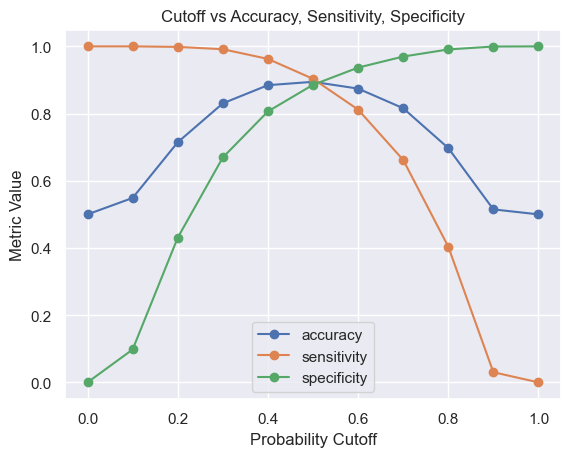

Optimal Cutoff: 0.50
Accuracy: 0.89
Sensitivity: 0.90
Specificity: 0.89


In [278]:
cutoff_df, optimal_cutoff = find_optimal_cutoff2(X_true=X_train , y_true=y_train , estimator=xgboost_model , data_name="X_train", dataset_type="Train", start=0.0 , end=1.1 , step=0.1)

### Evaluate Model

In [279]:
# Evaluate Model on Train Set
train_accuracy, train_sensitivity, train_specificity, train_precision, train_recall, train_roc_auc=evaluate_model( X_true=X_train , y_true=y_train , estimator=xgboost_model , data_name="X_train", dataset_type="Train" ,  cut_off=optimal_cutoff)

Evaluating Train Set: data set name - X_train_pca
Confusion Matrix:
 [[9094 1175]
 [ 992 9277]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89     10269
           1       0.89      0.90      0.90     10269

    accuracy                           0.89     20538
   macro avg       0.89      0.89      0.89     20538
weighted avg       0.89      0.89      0.89     20538

Accuracy: 89.45%
Sensitivity: 90.34%
Specificity: 88.56%
Precision: 88.76%
Recall: 90.34%
ROC AUC Score: 96.01%


### ROC Curve

Evaluating Train Set: data set name - X_train_pca


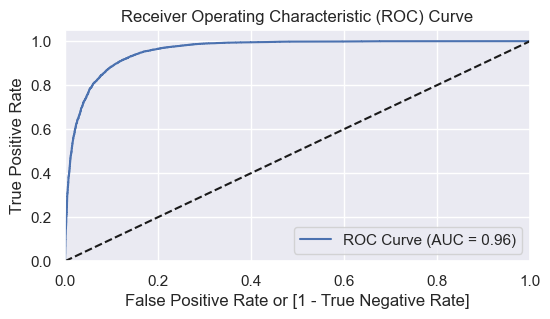

In [280]:
# Calling the function
plot_roc_curve(X_true=X_train , y_true=y_train , estimator=xgboost_model , data_name="X_train", dataset_type="Train")

### Evaluate Model

In [281]:
# Evaluate Model on Test Set
test_accuracy, test_sensitivity, test_specificity, test_precision, test_recall, test_roc_auc =evaluate_model(X_true=X_test , y_true=y_test , estimator=xgboost_model , data_name="X_test", dataset_type="Test" ,  cut_off=optimal_cutoff)

Evaluating Test Set: data set name - X_test_pca
Confusion Matrix:
 [[3843  587]
 [ 138  240]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.91      4430
           1       0.29      0.63      0.40       378

    accuracy                           0.85      4808
   macro avg       0.63      0.75      0.66      4808
weighted avg       0.91      0.85      0.87      4808

Accuracy: 84.92%
Sensitivity: 63.49%
Specificity: 86.75%
Precision: 29.02%
Recall: 63.49%
ROC AUC Score: 84.99%


#### Update Evaluation Metrics

In [271]:
# Define the model name and the estimator
model_name = "Xgboost Classifier with PCA"
estimator = xgboost_model 

# Create a single dictionary to store all metrics
evaluation_metrics = {
    "model_name": model_name,
    "estimator":estimator,
    "train_accuracy": train_accuracy,
    "train_sensitivity": train_sensitivity,
    "train_specificity": train_specificity,
    "train_precision": train_precision,
    "train_recall": train_recall,
    "train_roc_auc": train_roc_auc,
    "test_accuracy": test_accuracy,
    "test_sensitivity": test_sensitivity,
    "test_specificity": test_specificity,
    "test_precision": test_precision,
    "test_recall": test_recall,
    "test_roc_auc": test_roc_auc
}


# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame([evaluation_metrics])

# Concatenate the new DataFrame with the empty model_summary DataFrame
if model_name not in list(model_summary["model_name"]) :
    model_summary = pd.concat([model_summary, metrics_df], axis=0)

# Reset Index
model_summary.reset_index(inplace=True,drop=True)
# Print out the model_summary for verification
model_summary

model_name  train_accuracy  train_sensitivity  \
0       Logistic Regression RFE        0.907927           0.878274   
1  Logistic Regression with PCA        0.865712           0.889863   
2      Decision Tree Classifier        0.859967           0.872139   

   train_specificity  train_precision  train_recall  train_roc_auc  \
0           0.937579         0.933644      0.878274       0.969024   
1           0.841562         0.848862      0.889863       0.926851   
2           0.847794         0.851412      0.872139       0.931855   

   test_accuracy  test_sensitivity  test_specificity  test_precision  \
0       0.904326          0.560847          0.933634        0.418972   
1       0.831739          0.769841          0.837020        0.287266   
2       0.798253          0.619048          0.813544        0.220755   

   test_recall  test_roc_auc  \
0     0.560847      0.858266   
1     0.769841      0.866917   
2     0.619048      0.782597   

                                           estimator  
0  LogisticRegression(max_iter=1000, solver='sag'...  
1  LogisticRegression(C=10, random_state=42, solv...  
2  DecisionTreeClassifier(max_depth=10, min_sampl...

## Build the Best Model

### Multi-Criteria Selection (Weighted Approach)

In [248]:
# Define weights for each metric 
weights = {
    "test_accuracy": 0.2,   # Prioritize accuracy (60% weight)
    "test_specificity": 0.1, # Lower weight for specificity
    "test_precision": 0.1,   # Lower weight for precision
    "test_recall": 0.1,      # Lower weight for recall
    "test_roc_auc": 0.1      # Lower weight for ROC AUC
}

# Calculate a weighted score for each model
model_summary["weighted_score"] = (
    model_summary["test_accuracy"] * weights["test_accuracy"] +
    model_summary["test_specificity"] * weights["test_specificity"] +
    model_summary["test_precision"] * weights["test_precision"] +
    model_summary["test_recall"] * weights["test_recall"] +
    model_summary["test_roc_auc"] * weights["test_roc_auc"]
)


# Display the DataFrame
model_summary

model_name  train_accuracy  train_sensitivity  \
0       Logistic Regression with RFE        0.880910           0.858798   
1       Logistic Regression with PCA        0.868116           0.850269   
2  Decision Tree Classifier with PCA        0.858482           0.864168   
3  Random Forest Classifier with PCA        0.901758           0.911762   

   train_specificity  train_precision  train_recall  train_roc_auc  \
0           0.903022         0.898535      0.858798       0.944922   
1           0.885964         0.881743      0.850269       0.933026   
2           0.852796         0.854451      0.864168       0.935660   
3           0.891755         0.893878      0.911762       0.962283   

   test_accuracy  test_sensitivity  test_specificity  test_precision  \
0       0.882869          0.723757          0.896965        0.383602   
1       0.866232          0.734807          0.877876        0.347712   
2       0.792491          0.632597          0.806657        0.224730   
3       0.849820          0.671271          0.865639        0.306818   

   test_recall  test_roc_auc  \
0     0.723757      0.880541   
1     0.734807      0.869525   
2     0.632597      0.784712   
3     0.671271      0.846285   

                                           estimator  weighted_score  
0  LogisticRegression(max_iter=1000, solver='sag'...        0.465060  
1  LogisticRegression(C=0.1, random_state=42, sol...        0.456238  
2  DecisionTreeClassifier(max_depth=10, min_sampl...        0.403368  
3  (DecisionTreeClassifier(max_depth=10, max_feat...        0.438965

In [249]:
### Create Pipeline for Best Fit Classifier
model_best_fit=model_summary.loc[model_summary['weighted_score'].idxmax()]
model_best_fit

model_name                                Logistic Regression with RFE
train_accuracy                                                 0.88091
train_sensitivity                                             0.858798
train_specificity                                             0.903022
train_precision                                               0.898535
train_recall                                                  0.858798
train_roc_auc                                                 0.944922
test_accuracy                                                 0.882869
test_sensitivity                                              0.723757
test_specificity                                              0.896965
test_precision                                                0.383602
test_recall                                                   0.723757
test_roc_auc                                                  0.880541
estimator            LogisticRegression(max_iter=1000, solver='sag'...
weight

In [250]:
pipe=model_best_fit.estimator
pipe

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [251]:
### # Set up the pipeline
### pipe = Pipeline(steps=[
###     ('smote', smote),          # Step 1: Apply SMOTE for balancing
###     ('scaling', scaler),              # Step 2: Standard scaling
###     ('pca', pca_final),              # Step 3: Dimensionality reduction with PCA
###     ('model', model_best_fit )  # Step 4: Model fitting
### ])

In [253]:
# Set pipe train and test
X_train_pipe=X_train_rfe # X_train_pca or X_train_rfe
X_test_pipe=X_test_rfe  # X_test_pca or X_test_rfe

In [254]:
### # Log Start Time
### start_time = time.time()
### print("Execution Start Time : " , datetime.now())
### 
### # Fit the Pipeline
### pipe.fit(X_train, y_train)
### 
### # Log End time
### end_time = time.time()
### print("Execution End Time : " , datetime.now())
### 
### # Calculate the elapsed time
### execution_time = end_time - start_time
### print(f"Execution time: {execution_time} seconds")

### Find optimal cutoff

Evaluating Train Set Set: data set name - X_train_pipe
    probability  accuracy  sensitivity  specificity
0           0.0  0.500000     1.000000     0.000000
1           0.1  0.783089     0.979467     0.586712
2           0.2  0.827261     0.960514     0.694009
3           0.3  0.854533     0.942403     0.766663
4           0.4  0.868222     0.917553     0.818890
5           0.5  0.879120     0.891545     0.866695
6           0.6  0.880910     0.858798     0.903022
7           0.7  0.870275     0.810993     0.929557
8           0.8  0.838686     0.724018     0.953354
9           0.9  0.742340     0.502474     0.982205
10          1.0  0.500000     0.000000     1.000000


<Figure size 800x600 with 0 Axes>

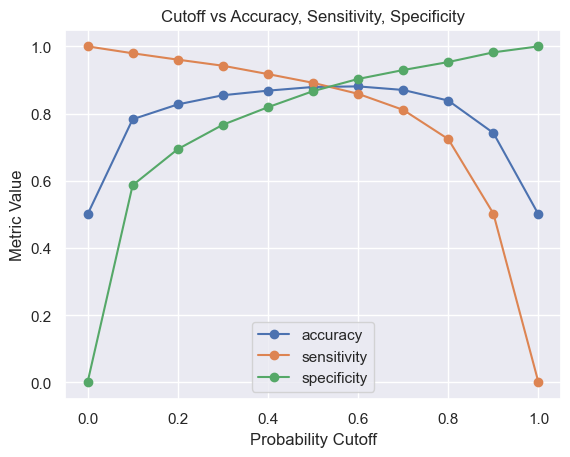

Optimal Cutoff: 0.60
Accuracy: 0.88
Sensitivity: 0.86
Specificity: 0.90


In [255]:
cutoff_df, optimal_cutoff = find_optimal_cutoff2(X_true=X_train_pipe , y_true=y_train , estimator=pipe , data_name="X_train_pipe", dataset_type="Train Set", start=0.0 , end=1.1 , step=0.1)

### Evaluate Model

In [256]:
# Evaluate Model on Entire X and Y Sets
train_accuracy, train_sensitivity, train_specificity, train_precision, train_recall, train_roc_auc=evaluate_model( X_true=X_train_pipe , y_true=y_train , estimator=pipe , data_name="X_train_pipe", dataset_type="Train Set", cut_off=optimal_cutoff)

Evaluating Train Set Set: data set name - X_train_pipe
Confusion Matrix:
 [[8576  921]
 [1341 8156]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      9497
           1       0.90      0.86      0.88      9497

    accuracy                           0.88     18994
   macro avg       0.88      0.88      0.88     18994
weighted avg       0.88      0.88      0.88     18994

Accuracy: 88.09%
Sensitivity: 85.88%
Specificity: 90.3%
Precision: 89.85%
Recall: 85.88%
ROC AUC Score: 94.49%


### ROC Curve

Evaluating Train Set: data set name - X_train_pipe


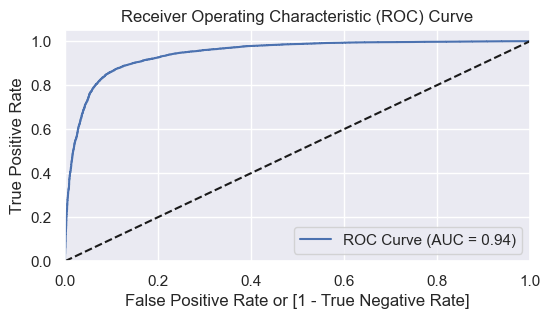

In [257]:
# Calling the function
plot_roc_curve(X_true=X_train_pipe , y_true=y_train , estimator=pipe , data_name="X_train_pipe", dataset_type="Train")

### Evaluate Model

In [258]:
# Evaluate Model on Entire X and Y Sets
test_accuracy, test_sensitivity, test_specificity, test_precision, test_recall, test_roc_auc =evaluate_model( X_true=X_test_pipe , y_true=y_test , estimator=pipe , data_name="X_test_pipe", dataset_type="Test Set", cut_off=optimal_cutoff)

Evaluating Test Set Set: data set name - X_test_pipe
Confusion Matrix:
 [[3665  421]
 [ 100  262]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      4086
           1       0.38      0.72      0.50       362

    accuracy                           0.88      4448
   macro avg       0.68      0.81      0.72      4448
weighted avg       0.93      0.88      0.90      4448

Accuracy: 88.29%
Sensitivity: 72.38%
Specificity: 89.7%
Precision: 38.36%
Recall: 72.38%
ROC AUC Score: 88.05%


# 7. Creating submission file

For submission, we need to make sure that the format is exactly the same as the sample.csv file. It contains 2 columns, id and churn_probability

In [259]:
sample.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

The submission file should contain churn_probability values that have to be predicted for the unseen data provided (test.csv)

In [260]:
churn_data_unseen.head()

id  arpu_jun  arpu_jul  arpu_aug  onnet_mou_jun  onnet_mou_jul  \
0  69999    91.882    65.330    64.445          31.78          20.23   
1  70000   414.168   515.568   360.868          75.51          41.21   
2  70001   329.844   434.884   746.239           7.54           7.86   
3  70002    43.550   171.390    24.400           5.31           2.16   
6  70005    41.890    20.120   129.610          13.13          12.34   

   onnet_mou_aug  offnet_mou_jun  offnet_mou_jul  offnet_mou_aug  ...  \
0          23.11           60.16           32.16           34.83  ...   
1          19.84          474.34          621.84          394.94  ...   
2           8.40           16.98           45.81           45.04  ...   
3           0.00           40.04          205.01           24.01  ...   
6          33.33           22.54            8.34           32.13  ...   

   total_all_rech_amt_jun  total_all_rech_amt_jul  total_all_rech_amt_aug  \
0                   103.0                    90.0                    60.0   
1                   500.0                   500.0                   500.0   
2                   500.0                  1000.0                  1000.0   
3                   110.0                   260.0                     0.0   
6                     0.0                     0.0                   150.0   

   AVG_amt_jun_jul  fb_user_aug_1.0  fb_user_jul_1.0  fb_user_jun_1.0  \
0             96.5                0                0                0   
1            500.0                0                0                0   
2            750.0                0                0                0   
3            185.0                0                0                0   
6              0.0                0                0                0   

   night_pck_user_aug_1.0  night_pck_user_jul_1.0  night_pck_user_jun_1.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
3                       0                       0                       0  
6                       0                       0                       0  

[5 rows x 141 columns]

Lets first select the columns that we want to work with (or create them, if you have done any feature engineering)

In [264]:
submission_data = churn_data_unseen[X_train_pipe.columns]
submission_data.shape

(18866, 20)

In [265]:
submission_data.head()

onnet_mou_aug  std_og_t2m_mou_aug  std_og_t2f_mou_aug  total_og_mou_aug  \
0          23.11               26.43                 0.0             57.94   
1          19.84               17.68                 0.0            415.59   
2           8.40                0.00                 0.0              0.00   
3           0.00                0.00                 0.0             24.01   
6          33.33                0.00                 0.0             46.01   

   loc_ic_mou_aug  total_ic_mou_jun  total_ic_mou_jul  total_ic_mou_aug  \
0           31.51             41.73             43.56             36.26   
1          187.43            296.33            339.64            281.66   
2            0.00              0.00              0.00              0.00   
3          531.64            555.69            522.44            549.13   
6           41.54             11.73             45.78             43.23   

   total_rech_num_aug  last_day_rch_amt_aug  max_rech_data_aug  arpu_2g_jun  \
0                   4                     0                0.0          0.0   
1                   5                     0                0.0          0.0   
2                   5                     0                0.0          0.0   
3                   2                     0                0.0          0.0   
6                   3                     0                0.0          0.0   

   arpu_2g_jul  monthly_2g_jun  monthly_3g_jun  monthly_3g_jul  \
0          0.0               0               0               0   
1          0.0               0               0               0   
2          0.0               0               0               0   
3          0.0               0               0               0   
6          0.0               0               0               0   

   fb_user_aug_1.0  fb_user_jul_1.0  night_pck_user_jul_1.0  \
0                0                0                       0   
1                0                0                       0   
2                0                0                       0   
3                0                0                       0   
6                0                0                       0   

   night_pck_user_jun_1.0  
0                       0  
1                       0  
2                       0  
3                       0  
6                       0

Next, lets create a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data

In [266]:
submission_data_pred=pipe.predict(submission_data)
submission_data_pred_proba = pipe.predict_proba(submission_data)[:, 1]

if optimal_cutoff==0.5 :
    submission_data_pred_final = submission_data_pred
else :
    # Binarize predictions based on the cutoff
    submission_data_pred_final = [1 if prob >= optimal_cutoff else 0 for prob in submission_data_pred_proba]

churn_data_unseen['churn_probability']=submission_data_pred_final

In [267]:
output = churn_data_unseen[['id','churn_probability']]
output.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
6  70005                  0

In [268]:
output["churn_probability"].value_counts()

churn_probability
0    15766
1     3100
Name: count, dtype: int64

Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv.

In [269]:
output.to_csv('submission_arnab_bera.csv',index=False)

In [270]:
# Log End time
notebook_end_time = time.time()
print("Execution End Time : " , datetime.now())
# Calculate the elapsed time
execution_time = notebook_end_time - notebook_start_time
print(f"Execution time: {execution_time} seconds")

Execution End Time :  2024-09-11 16:29:55.804199
Execution time: 6325.395838499069 seconds


<div align="center"> <b>-----     End of Notebook     -----</b>